## Loading data in google colab

In [2]:
from google.colab import drive
drive.mount('/content/mydrive', force_remount=True)

Mounted at /content/mydrive


## Proposed workflow

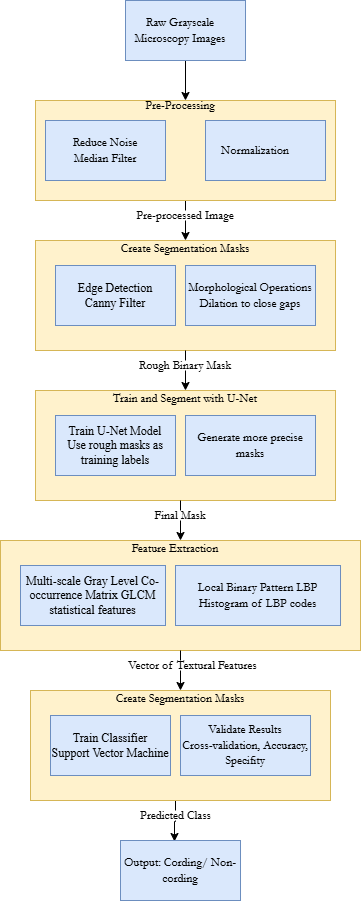

## 1. Preprocessing for segmentation



### 1.2 Creating masks for corded images

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes
import os

def edge_dilate_folder(input_folder="/content/mydrive/MyDrive/Project/Parental_Phigh",
                      output_folder="/content/mydrive/MyDrive/Project/Parental_Phigh_masks",
                      dilation_iter=2, kernel_size=3, fill=True):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of .tif image files in input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith('.tif')]

    for image_file in image_files:
        # Construct full input path
        input_path = os.path.join(input_folder, image_file)

        # Load grayscale
        img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
        if img is None:
            print(f"Failed to load {image_file}")
            continue

        if img.ndim == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = (img.astype(np.float32) / img.max() * 255).astype(np.uint8)

        # Edge detection (Canny)
        edges = cv2.Canny(img, 10, 100)

        # Dilate edges
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
        dilated = cv2.dilate(edges, kernel, iterations=dilation_iter)

        # Construct output filename with 'mask' appended
        file_name, file_ext = os.path.splitext(image_file)
        output_filename = f"{file_name}mask{file_ext}"
        output_path = os.path.join(output_folder, output_filename)

        # Save the dilated image
        cv2.imwrite(output_path, dilated)
        print(f"Saved processed image: {output_filename}")

        # Optional: Display results
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title("Canny Edges")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(dilated, cmap='gray')
        plt.title("Dilated")
        plt.axis("off")

        plt.show()

    return True

# Run the function
if __name__ == "__main__":
    edge_dilate_folder()

Output hidden; open in https://colab.research.google.com to view.

### 1.3 Creating masks for non-corded images

In [ ]:
def edge_dilate_folder(input_folder="/content/mydrive/MyDrive/Project/Parental_Pminus",
                      output_folder="/content/mydrive/MyDrive/Project/Parental_Pminus_masks",
                      dilation_iter=2, kernel_size=5, fill=True):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Get list of .tif image files in input folder
    image_files = [f for f in os.listdir(input_folder) if f.endswith('.tif')]

    for image_file in image_files:
        # Construct full input path
        input_path = os.path.join(input_folder, image_file)

        # Load grayscale
        img = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
        if img is None:
            print(f"Failed to load {image_file}")
            continue

        if img.ndim == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = (img.astype(np.float32) / img.max() * 255).astype(np.uint8)

        # Edge detection (Canny)
        edges = cv2.Canny(img, 10, 150)

        # Dilate edges
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
        dilated = cv2.dilate(edges, kernel, iterations=dilation_iter)

        # Construct output filename with 'mask' appended
        file_name, file_ext = os.path.splitext(image_file)
        output_filename = f"{file_name}mask{file_ext}"
        output_path = os.path.join(output_folder, output_filename)

        # Save the dilated image
        cv2.imwrite(output_path, dilated)
        print(f"Saved processed image: {output_filename}")

        # Optional: Display results
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(img, cmap='gray')
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(edges, cmap='gray')
        plt.title("Canny Edges")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(dilated, cmap='gray')
        plt.title("Dilated")
        plt.axis("off")

        plt.show()

    return True

# Run the function
if __name__ == "__main__":
    edge_dilate_folder()

Output hidden; open in https://colab.research.google.com to view.

## 2. Implementing Segmentation U-net

### 2.1 Building and training the model

Processed B8_Parental_Phigh_9105_08022024_1010.tif: current class counts {0: 6, 1: 6, 2: 0}
Processed E8_Parental_Phigh_9177_08022024_1056.tif: current class counts {0: 12, 1: 12, 2: 0}
Processed C1_Parental_Phigh_9109_08022024_1012.tif: current class counts {0: 18, 1: 18, 2: 0}
Processed E8_Parental_Phigh_9178_08022024_1057.tif: current class counts {0: 24, 1: 24, 2: 0}
Processed A1_Parental-Phigh_9062_08022024_0939.tif: current class counts {0: 30, 1: 30, 2: 0}
Processed E8_Parental_Phigh_9179_08022024_1057.tif: current class counts {0: 36, 1: 36, 2: 0}
Processed E1_Parental_Phigh_9157_08022024_1045.tif: current class counts {0: 42, 1: 42, 2: 0}
Processed C1_Parental_Phigh_9110_08022024_1012.tif: current class counts {0: 48, 1: 48, 2: 0}
Processed B8_Parental_Phigh_9106_08022024_1010.tif: current class counts {0: 54, 1: 54, 2: 0}
Processed A8_Parental-Phigh_9082_08022024_0954.tif: current class counts {0: 60, 1: 60, 2: 0}
Processed G1_Parental_Phigh_9205_08022024_1113.tif: current cl

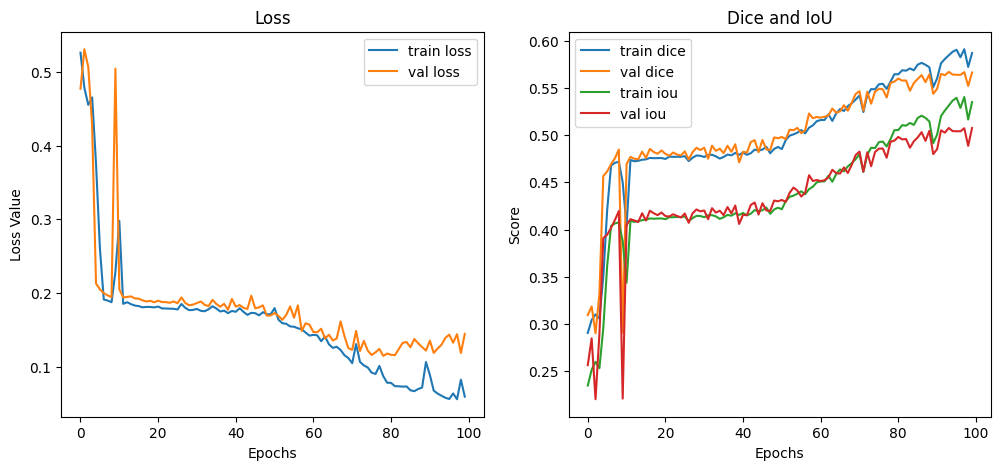

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


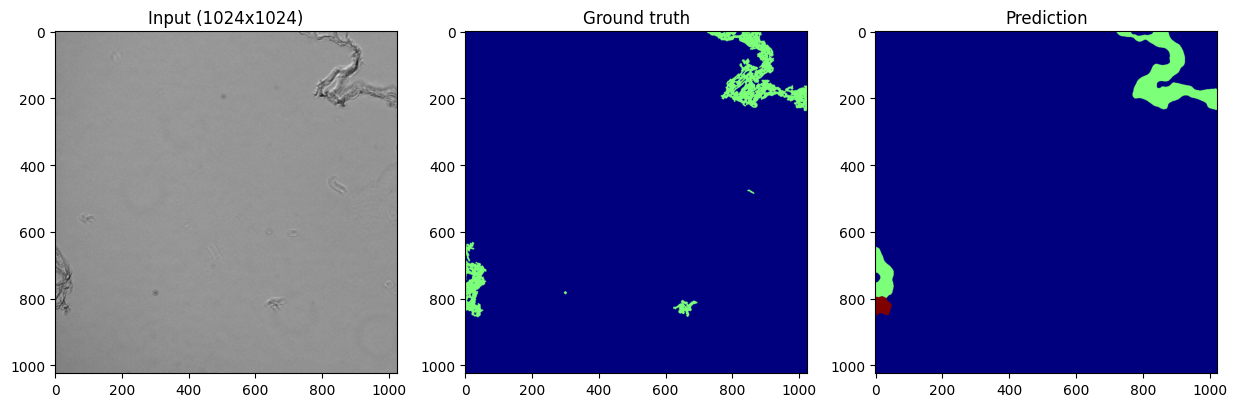

In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Data preparation - 1024x1024 tiles with balanced dataset
def load_and_tile_balanced(image_folders, mask_folders, tile_size=1024, overlap=0.25, max_tiles_per_class=1000):
    images, masks = [], []
    class_counts = {0: 0, 1: 0, 2: 0}  # Track class distribution

    for img_folder, mask_folder in zip(image_folders, mask_folders):
        img_files = [f for f in os.listdir(img_folder) if f.endswith('.tif')]

        for f in img_files:
            # Check if we've reached maximum for any class
            if min(class_counts.values()) >= max_tiles_per_class:
                break

            img_path = os.path.join(img_folder, f)
            mask_path = os.path.join(mask_folder, f.replace('.tif', 'mask.tif'))

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

            if img is None or mask is None:
                print(f"Warning: Could not load {img_path} or {mask_path}")
                continue

            # Check if images are large enough for 1024x1024 tiles
            h, w = img.shape
            if h < tile_size or w < tile_size:
                print(f"Warning: Image {f} is too small for 1024x1024 tiling ({h}x{w}). Skipping.")
                continue

            # Multi-class mask creation
            mask_processed = np.zeros_like(mask, dtype=np.uint8)
            if "Phigh" in img_folder:
                mask_processed[mask > 0] = 1
            elif "Pminus" in img_folder:
                mask_processed[mask > 0] = 2
            else:
                print(f"Warning: Unknown folder type for {img_folder}")
                continue

            img = img.astype(np.float32) / 255.0

            # Adjust step size for overlap
            step = int(tile_size * (1 - overlap))

            for i in range(0, h - tile_size + 1, step):
                for j in range(0, w - tile_size + 1, step):
                    # Check class limits
                    if min(class_counts.values()) >= max_tiles_per_class:
                        break

                    img_tile = img[i:i+tile_size, j:j+tile_size]
                    mask_tile = mask_processed[i:i+tile_size, j:j+tile_size]

                    # Count classes in this tile
                    unique_classes, counts = np.unique(mask_tile, return_counts=True)

                    # Check if adding this tile would exceed any class limit
                    would_exceed_limit = False
                    for cls in unique_classes:
                        if cls in class_counts and class_counts[cls] + 1 > max_tiles_per_class:
                            would_exceed_limit = True
                            break

                    if would_exceed_limit:
                        continue

                    # Add tile regardless of content (no empty tile filtering)
                    images.append(np.expand_dims(img_tile, axis=-1))
                    masks.append(np.expand_dims(mask_tile, axis=-1))

                    # Update class counts
                    for cls in unique_classes:
                        if cls in class_counts:
                            class_counts[cls] += 1

            print(f"Processed {f}: current class counts {class_counts}")

    print(f"Final class distribution: {class_counts}")

    # Check if we have any data
    if len(images) == 0:
        raise ValueError("No images were loaded. Check your file paths and image sizes.")

    return np.array(images), np.array(masks), class_counts


# 2. U-Net architecture for 1024x1024 input
def build_unet(input_shape=(1024, 1024, 1)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(16, (3,3), activation="relu", padding="same")(inputs)
    c1 = layers.Conv2D(16, (3,3), activation="relu", padding="same")(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)  # 512x512

    c2 = layers.Conv2D(32, (3,3), activation="relu", padding="same")(p1)
    c2 = layers.Conv2D(32, (3,3), activation="relu", padding="same")(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)  # 256x256

    c3 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(p2)
    c3 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(c3)
    p3 = layers.MaxPooling2D((2,2))(c3)  # 128x128

    c4 = layers.Conv2D(128, (3,3), activation="relu", padding="same")(p3)
    c4 = layers.Conv2D(128, (3,3), activation="relu", padding="same")(c4)
    p4 = layers.MaxPooling2D((2,2))(c4)  # 64x64

    # Bottleneck
    c5 = layers.Conv2D(256, (3,3), activation="relu", padding="same")(p4)
    c5 = layers.Conv2D(256, (3,3), activation="relu", padding="same")(c5)

    # Decoder
    u6 = layers.UpSampling2D((2,2))(c5)  # 128x128
    u6 = layers.Concatenate()([u6, c4])
    c6 = layers.Conv2D(128, (3,3), activation="relu", padding="same")(u6)
    c6 = layers.Conv2D(128, (3,3), activation="relu", padding="same")(c6)

    u7 = layers.UpSampling2D((2,2))(c6)  # 256x256
    u7 = layers.Concatenate()([u7, c3])
    c7 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(u7)
    c7 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(c7)

    u8 = layers.UpSampling2D((2,2))(c7)  # 512x512
    u8 = layers.Concatenate()([u8, c2])
    c8 = layers.Conv2D(32, (3,3), activation="relu", padding="same")(u8)
    c8 = layers.Conv2D(32, (3,3), activation="relu", padding="same")(c8)

    u9 = layers.UpSampling2D((2,2))(c8)  # 1024x1024
    u9 = layers.Concatenate()([u9, c1])
    c9 = layers.Conv2D(16, (3,3), activation="relu", padding="same")(u9)
    c9 = layers.Conv2D(16, (3,3), activation="relu", padding="same")(c9)

    outputs = layers.Conv2D(3, (1,1))(c9)  # 3 classes, logits

    model = models.Model(inputs, outputs)
    return model


# 3. Metrics (unchanged)
def multi_dice_coef(y_true, y_pred, smooth=1e-6):
    y_pred = tf.nn.softmax(y_pred)
    y_true_f = tf.one_hot(tf.cast(tf.squeeze(y_true, -1), tf.int32), depth=3)
    y_true_f = tf.reshape(y_true_f, [-1, 3])
    y_pred_f = tf.reshape(y_pred, [-1, 3])
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denom = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    dice = (2. * intersection + smooth) / (denom + smooth)
    return tf.reduce_mean(dice)

def multi_iou(y_true, y_pred, smooth=1e-6):
    y_pred = tf.nn.softmax(y_pred)
    y_true_f = tf.one_hot(tf.cast(tf.squeeze(y_true, -1), tf.int32), depth=3)
    y_true_f = tf.reshape(y_true_f, [-1, 3])
    y_pred_f = tf.reshape(y_pred, [-1, 3])
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    union = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return tf.reduce_mean(iou)


# 4. Weighted loss
def weighted_sparse_cce(weights):
    weights = tf.constant(weights, dtype=tf.float32)

    def loss(y_true, y_pred):
        y_true = tf.cast(tf.squeeze(y_true, axis=-1), tf.int32)
        y_pred = tf.nn.softmax(y_pred, axis=-1)

        y_true_one_hot = tf.one_hot(y_true, depth=len(weights))

        ce = -tf.reduce_sum(y_true_one_hot * tf.math.log(y_pred + 1e-7) * weights, axis=-1)

        return tf.reduce_mean(ce)
    return loss


# 5. Training pipeline with 1024x1024 tiles and balanced dataset
image_folders = ["/content/mydrive/MyDrive/Project/Parental_Phigh", "/content/mydrive/MyDrive/Project/Parental_Pminus"]
mask_folders = ["/content/mydrive/MyDrive/Project/Parental_Phigh_masks", "/content/mydrive/MyDrive/Project/Parental_Pminus_masks"]

try:
    # Use 1024x1024 tile size with balanced dataset
    X, y, class_counts = load_and_tile_balanced(
        image_folders,
        mask_folders,
        tile_size=1024,
        overlap=0.25,
        max_tiles_per_class=1000  # Adjust based on your needs
    )
    print("Dataset shape:", X.shape, y.shape)

    # Compute class weights with safety check
    total = sum(class_counts.values())
    class_weights = []
    for i in range(len(class_counts)):
        if class_counts[i] > 0:
            class_weights.append(total / (len(class_counts) * class_counts[i]))
        else:
            print(f"Warning: Class {i} has zero samples. Using weight 1.0.")
            class_weights.append(1.0)

    print("Class weights:", class_weights)

    # Adjust input shape based on actual tile size (should be 1024x1024)
    input_shape = (X.shape[1], X.shape[2], X.shape[3])
    print(f"Input shape: {input_shape}")

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = build_unet(input_shape=input_shape)

    # Use smaller batch size for 1024x1024 to avoid memory issues
    batch_size = 1  # You may need to use 1 with 1024x1024 tiles

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss=weighted_sparse_cce(class_weights),
        metrics=["accuracy", multi_dice_coef, multi_iou]
    )

    print(f"Training with {len(X_train)} samples, validating with {len(X_val)} samples")
    print(f"Batch size: {batch_size}")
    print(f"Class distribution: {class_counts}")

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=100,
                        batch_size=batch_size)

    # 6. Evaluation
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="val loss")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.title("Loss")

    plt.subplot(1,2,2)
    plt.plot(history.history["multi_dice_coef"], label="train dice")
    plt.plot(history.history["val_multi_dice_coef"], label="val dice")
    plt.plot(history.history["multi_iou"], label="train iou")
    plt.plot(history.history["val_multi_iou"], label="val iou")
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Score")
    plt.title("Dice and IoU")
    plt.show()

    if len(X_val) > 0:
        pred = model.predict(np.expand_dims(X_val[0], axis=0))[0]
        pred_argmax = np.argmax(pred, axis=-1)

        plt.figure(figsize=(15,5))
        plt.subplot(1,3,1)
        plt.imshow(X_val[0,:,:,0], cmap="gray")
        plt.title("Input (1024x1024)")

        plt.subplot(1,3,2)
        plt.imshow(y_val[0,:,:,0], cmap="jet", vmin=0, vmax=2)
        plt.title("Ground truth")

        plt.subplot(1,3,3)
        plt.imshow(pred_argmax, cmap="jet", vmin=0, vmax=2)
        plt.title("Prediction")
        plt.show()

except Exception as e:
    print(f"Error: {e}")
    import traceback
    traceback.print_exc()

In [ ]:
# Option 2: Single HDF5 file
model.save("/content/mydrive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras")

Processing as Phigh image (Class 1)
=== METRICS ===
Class 0 (Background):
  Predicted pixels: 3,729,825
  Ground truth pixels: 3,820,540
  Dice: 0.9621, IoU: 0.9269

Class 1 (Phigh):
  Predicted pixels: 1,309,023
  Ground truth pixels: 1,218,308
  Dice: 0.8867, IoU: 0.7964

Class 2 (Pminus):
  Predicted pixels: 0
  Ground truth pixels: 0
  Dice: 0.0000, IoU: 0.0000

Overall Mean Dice: 0.6163
Overall Mean IoU: 0.5745
=== PREDICTION BIAS ANALYSIS ===
Pixel Distribution:
Background:
  Predicted: 3,729,825 pixels (74.0%)
  Ground Truth: 3,820,540 pixels (75.8%)
  Bias: -1.8%

Phigh:
  Predicted: 1,309,023 pixels (26.0%)
  Ground Truth: 1,218,308 pixels (24.2%)
  Bias: +1.8%

Pminus:
  Predicted: 0 pixels (0.0%)
  Ground Truth: 0 pixels (0.0%)
  Bias: +0.0%

Probability maps saved:
- probability_background.png
- probability_phigh.png
- probability_pminus.png


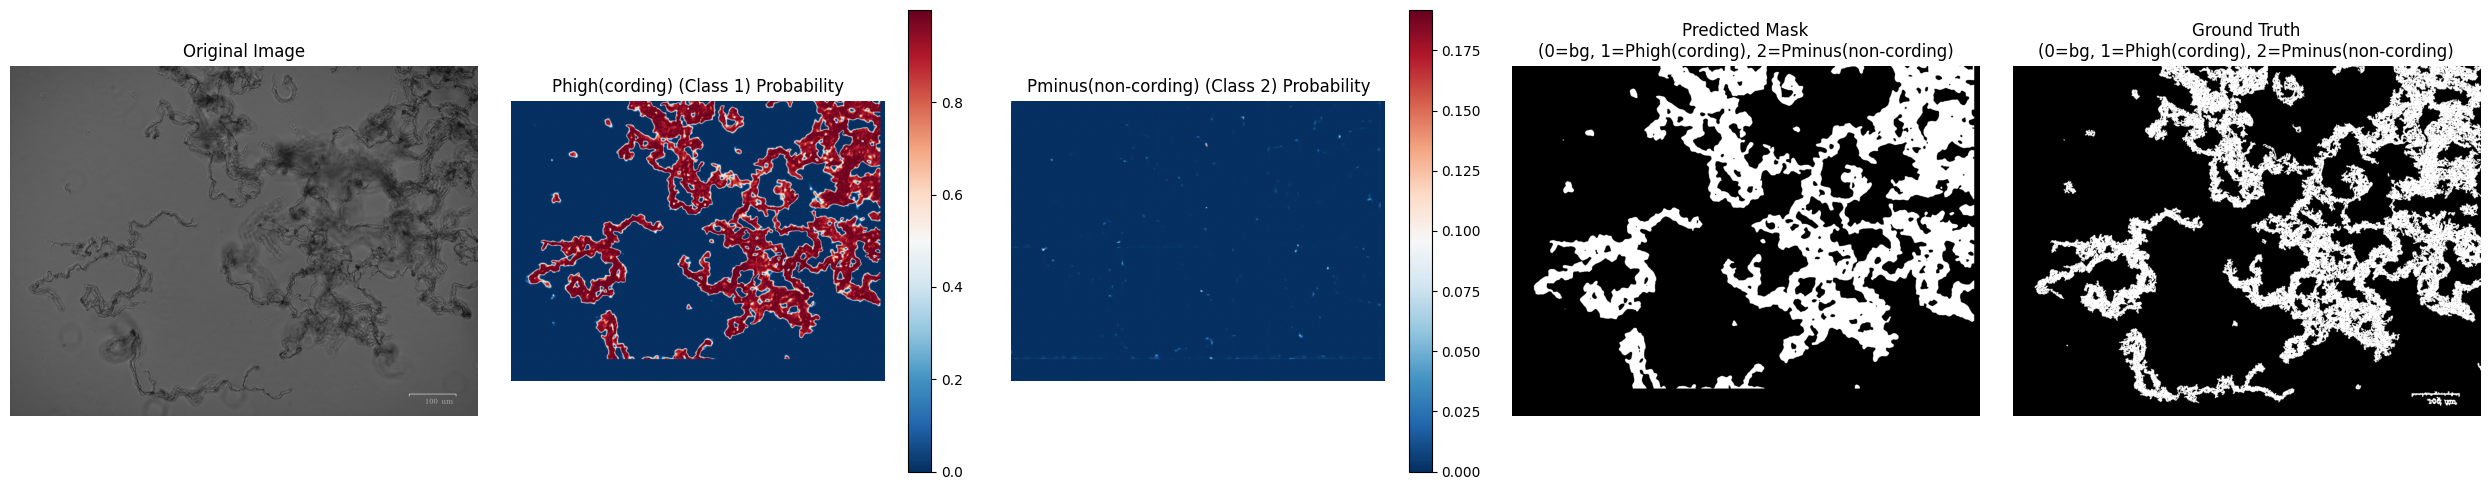


=== PREDICTION SUMMARY ===
Predicted class distribution: {np.uint8(0): np.int64(3729825), np.uint8(1): np.int64(1309023)}
Ground truth distribution: {np.uint8(0): np.int64(3820540), np.uint8(1): np.int64(1218308)}


In [4]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

def predict_full_image(img_path, model, tile_size=1024, overlap=0.25):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
    h, w = img.shape

    step = int(tile_size * (1 - overlap))
    prob_map = np.zeros((h, w, 3), dtype=np.float32)
    count_map = np.zeros((h, w), dtype=np.float32)

    for i in range(0, h - tile_size + 1, step):
        for j in range(0, w - tile_size + 1, step):
            tile = img[i:i+tile_size, j:j+tile_size]
            tile_input = np.expand_dims(tile, axis=(0, -1))

            pred_logits = model.predict(tile_input, verbose=0)[0]
            pred_softmax = tf.nn.softmax(pred_logits, axis=-1).numpy()

            prob_map[i:i+tile_size, j:j+tile_size] += pred_softmax
            count_map[i:i+tile_size, j:j+tile_size] += 1

    prob_map /= np.maximum(count_map[..., np.newaxis], 1)
    final_mask = np.argmax(prob_map, axis=-1).astype(np.uint8)

    return final_mask, prob_map

def calculate_dice_and_iou(pred_mask, gt_mask):
    """
    Calculate Dice coefficient and IoU for multi-class segmentation.
    """
    dice_scores = []
    iou_scores = []
    class_names = ["Background", "Phigh", "Pminus"]

    for class_id in range(3):
        pred_binary = (pred_mask == class_id).astype(np.uint8)
        gt_binary = (gt_mask == class_id).astype(np.uint8)

        intersection = np.sum(pred_binary & gt_binary)
        pred_sum = np.sum(pred_binary)
        gt_sum = np.sum(gt_binary)
        union = pred_sum + gt_sum - intersection

        dice = (2.0 * intersection) / (pred_sum + gt_sum + 1e-8)
        iou = intersection / (union + 1e-8)

        dice_scores.append(dice)
        iou_scores.append(iou)

        print(f"Class {class_id} ({class_names[class_id]}):")
        print(f"  Predicted pixels: {pred_sum:,}")
        print(f"  Ground truth pixels: {gt_sum:,}")
        print(f"  Dice: {dice:.4f}, IoU: {iou:.4f}")
        print()

    return dice_scores, iou_scores

def analyze_prediction_bias(pred_mask, gt_mask):
    """Analyze if model is biased toward one class"""
    print("=== PREDICTION BIAS ANALYSIS ===")

    # Count pixels in prediction
    pred_counts = {}
    gt_counts = {}

    for class_id in range(3):
        pred_counts[class_id] = np.sum(pred_mask == class_id)
        gt_counts[class_id] = np.sum(gt_mask == class_id)

    class_names = ["Background", "Phigh", "Pminus"]

    print("Pixel Distribution:")
    for class_id in range(3):
        pred_percent = (pred_counts[class_id] / pred_mask.size) * 100
        gt_percent = (gt_counts[class_id] / gt_mask.size) * 100
        print(f"{class_names[class_id]}:")
        print(f"  Predicted: {pred_counts[class_id]:,} pixels ({pred_percent:.1f}%)")
        print(f"  Ground Truth: {gt_counts[class_id]:,} pixels ({gt_percent:.1f}%)")
        bias = pred_percent - gt_percent
        print(f"  Bias: {bias:+.1f}%")
        print()

# =====================
# MAIN EXECUTION - FIXED
# =====================

# Load your model
model = tf.keras.models.load_model("/content/mydrive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras", compile=False)

# Test images - CORRECTED GROUND TRUTH PROCESSING
unseen_path = "/content/mydrive/MyDrive/Project/Parental_Phigh/A1_Parental-Phigh_9060_08022024_0937.tif"
ground_truth_path = "/content/mydrive/MyDrive/Project/Parental_Phigh_masks/A1_Parental-Phigh_9060_08022024_0937mask.tif"

# Load ground truth - FIXED: Phigh images should be class 1
gt_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
gt_mask_processed = np.zeros_like(gt_mask, dtype=np.uint8)

# Determine correct class based on folder name
if "Phigh" in unseen_path:
    gt_mask_processed[gt_mask > 0] = 1  # Class 1 for Phigh
    print("Processing as Phigh image (Class 1)")
elif "Pminus" in unseen_path:
    gt_mask_processed[gt_mask > 0] = 2  # Class 2 for Pminus
    print("Processing as Pminus image (Class 2)")
else:
    print("Warning: Could not determine image class from path")

# Predict
pred_mask, prob_map = predict_full_image(unseen_path, model)

# Calculate metrics
print("=== METRICS ===")
dice_scores, iou_scores = calculate_dice_and_iou(pred_mask, gt_mask_processed)

print(f"Overall Mean Dice: {np.mean(dice_scores):.4f}")
print(f"Overall Mean IoU: {np.mean(iou_scores):.4f}")

# Analyze bias
analyze_prediction_bias(pred_mask, gt_mask_processed)

# Save outputs
cv2.imwrite("reconstructed_mask.png", (pred_mask * 85).astype(np.uint8))  # Scale for visibility

# =====================
# SAVE PROBABILITY MAPS - ADDED LINES
# =====================
# Save probability maps for each class
cv2.imwrite("probability_background.png", (prob_map[:, :, 0] * 255).astype(np.uint8))
cv2.imwrite("probability_phigh.png", (prob_map[:, :, 1] * 255).astype(np.uint8))
cv2.imwrite("probability_pminus.png", (prob_map[:, :, 2] * 255).astype(np.uint8))

print("Probability maps saved:")
print("- probability_background.png")
print("- probability_phigh.png")
print("- probability_pminus.png")

# =====================
# ENHANCED VISUALIZATION
# =====================
orig_img = cv2.imread(unseen_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(25, 5))

# Original image
plt.subplot(1, 5, 1)
plt.imshow(orig_img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Class probability maps
plt.subplot(1, 5, 2)
plt.imshow(prob_map[:, :, 1], cmap="RdBu_r")
plt.colorbar()
plt.title("Phigh(cording) (Class 1) Probability")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(prob_map[:, :, 2], cmap="RdBu_r")
plt.colorbar()
plt.title("Pminus(non-cording) (Class 2) Probability")
plt.axis("off")

# Prediction
plt.subplot(1, 5, 4)
plt.imshow(pred_mask, cmap="gray", vmin=0)
plt.title("Predicted Mask\n(0=bg, 1=Phigh(cording), 2=Pminus(non-cording)")
plt.axis("off")

# Ground truth
plt.subplot(1, 5, 5)
plt.imshow(gt_mask_processed, cmap="gray", vmin=0)
plt.title("Ground Truth\n(0=bg, 1=Phigh(cording), 2=Pminus(non-cording)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Print prediction summary
print("\n=== PREDICTION SUMMARY ===")
unique_pred, counts_pred = np.unique(pred_mask, return_counts=True)
unique_gt, counts_gt = np.unique(gt_mask_processed, return_counts=True)

print("Predicted class distribution:", dict(zip(unique_pred, counts_pred)))
print("Ground truth distribution:", dict(zip(unique_gt, counts_gt)))

Processing as Pminus image (Class 2)
=== METRICS ===
Class 0 (Background):
  Predicted pixels: 4,716,054
  Ground truth pixels: 4,722,650
  Dice: 0.9900, IoU: 0.9802

Class 1 (Phigh):
  Predicted pixels: 885
  Ground truth pixels: 0
  Dice: 0.0000, IoU: 0.0000

Class 2 (Pminus):
  Predicted pixels: 321,909
  Ground truth pixels: 316,198
  Dice: 0.8508, IoU: 0.7403

Overall Mean Dice: 0.6136
Overall Mean IoU: 0.5735
=== PREDICTION BIAS ANALYSIS ===
Pixel Distribution:
Background:
  Predicted: 4,716,054 pixels (93.6%)
  Ground Truth: 4,722,650 pixels (93.7%)
  Bias: -0.1%

Phigh:
  Predicted: 885 pixels (0.0%)
  Ground Truth: 0 pixels (0.0%)
  Bias: +0.0%

Pminus:
  Predicted: 321,909 pixels (6.4%)
  Ground Truth: 316,198 pixels (6.3%)
  Bias: +0.1%



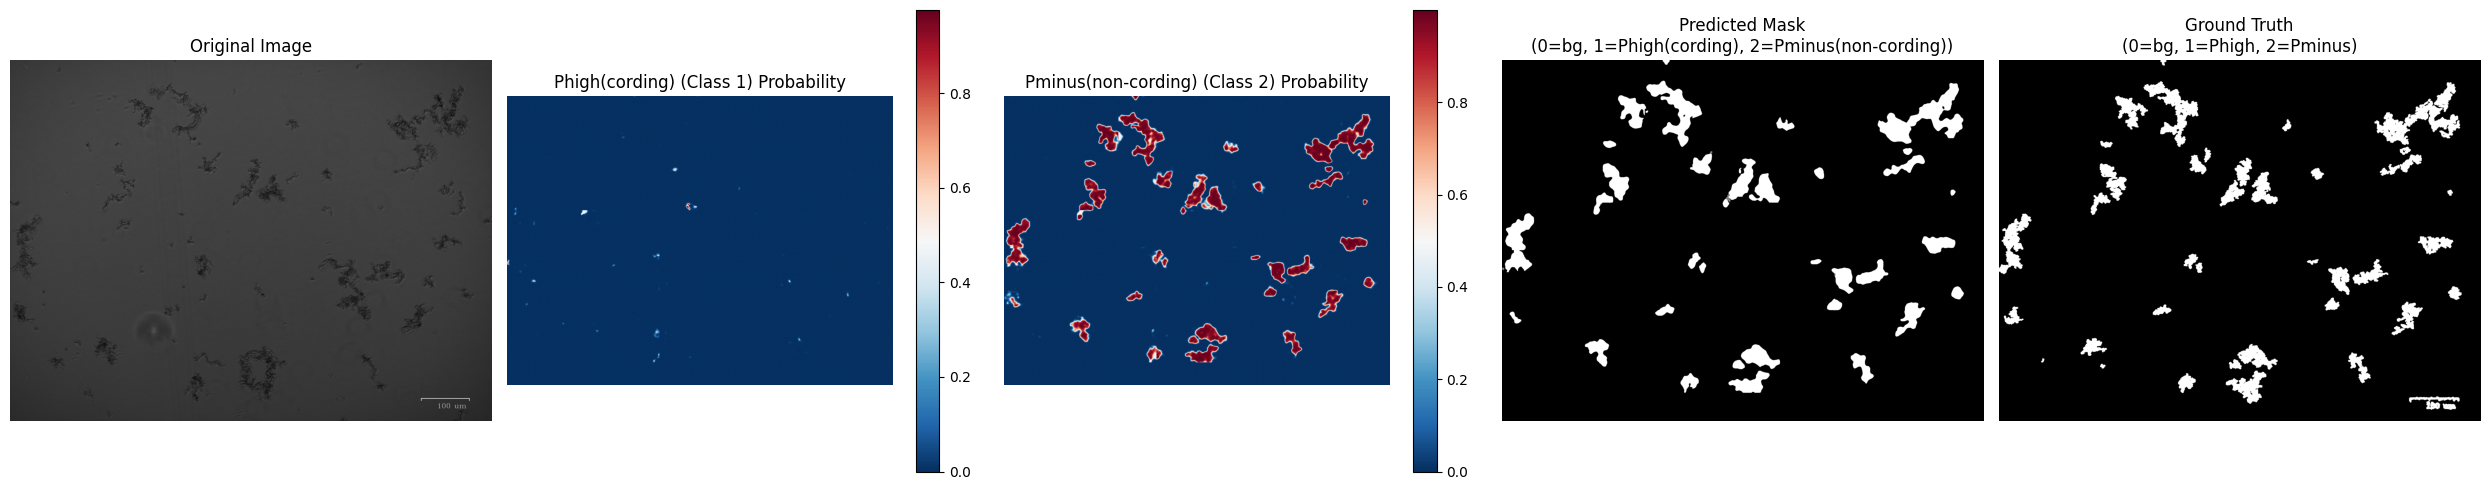


=== PREDICTION SUMMARY ===
Predicted class distribution: {np.uint8(0): np.int64(4716054), np.uint8(1): np.int64(885), np.uint8(2): np.int64(321909)}
Ground truth distribution: {np.uint8(0): np.int64(4722650), np.uint8(2): np.int64(316198)}


In [5]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime

def predict_full_image(img_path, model, tile_size=1024, overlap=0.25):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
    h, w = img.shape

    step = int(tile_size * (1 - overlap))
    prob_map = np.zeros((h, w, 3), dtype=np.float32)
    count_map = np.zeros((h, w), dtype=np.float32)

    for i in range(0, h - tile_size + 1, step):
        for j in range(0, w - tile_size + 1, step):
            tile = img[i:i+tile_size, j:j+tile_size]
            tile_input = np.expand_dims(tile, axis=(0, -1))

            pred_logits = model.predict(tile_input, verbose=0)[0]
            pred_softmax = tf.nn.softmax(pred_logits, axis=-1).numpy()

            prob_map[i:i+tile_size, j:j+tile_size] += pred_softmax
            count_map[i:i+tile_size, j:j+tile_size] += 1

    prob_map /= np.maximum(count_map[..., np.newaxis], 1)
    final_mask = np.argmax(prob_map, axis=-1).astype(np.uint8)

    return final_mask, prob_map

def calculate_dice_and_iou(pred_mask, gt_mask):
    """
    Calculate Dice coefficient and IoU for multi-class segmentation.
    """
    dice_scores = []
    iou_scores = []
    class_names = ["Background", "Phigh", "Pminus"]

    for class_id in range(3):
        pred_binary = (pred_mask == class_id).astype(np.uint8)
        gt_binary = (gt_mask == class_id).astype(np.uint8)

        intersection = np.sum(pred_binary & gt_binary)
        pred_sum = np.sum(pred_binary)
        gt_sum = np.sum(gt_binary)
        union = pred_sum + gt_sum - intersection

        dice = (2.0 * intersection) / (pred_sum + gt_sum + 1e-8)
        iou = intersection / (union + 1e-8)

        dice_scores.append(dice)
        iou_scores.append(iou)

        print(f"Class {class_id} ({class_names[class_id]}):")
        print(f"  Predicted pixels: {pred_sum:,}")
        print(f"  Ground truth pixels: {gt_sum:,}")
        print(f"  Dice: {dice:.4f}, IoU: {iou:.4f}")
        print()

    return dice_scores, iou_scores

def analyze_prediction_bias(pred_mask, gt_mask):
    """Analyze if model is biased toward one class"""
    print("=== PREDICTION BIAS ANALYSIS ===")

    # Count pixels in prediction
    pred_counts = {}
    gt_counts = {}

    for class_id in range(3):
        pred_counts[class_id] = np.sum(pred_mask == class_id)
        gt_counts[class_id] = np.sum(gt_mask == class_id)

    class_names = ["Background", "Phigh", "Pminus"]

    print("Pixel Distribution:")
    for class_id in range(3):
        pred_percent = (pred_counts[class_id] / pred_mask.size) * 100
        gt_percent = (gt_counts[class_id] / gt_mask.size) * 100
        print(f"{class_names[class_id]}:")
        print(f"  Predicted: {pred_counts[class_id]:,} pixels ({pred_percent:.1f}%)")
        print(f"  Ground Truth: {gt_counts[class_id]:,} pixels ({gt_percent:.1f}%)")
        bias = pred_percent - gt_percent
        print(f"  Bias: {bias:+.1f}%")
        print()

# =====================
# MAIN EXECUTION - FIXED
# =====================

# Load your model
model = tf.keras.models.load_model("/content/mydrive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras", compile=False)

# Test images - CORRECTED GROUND TRUTH PROCESSING
unseen_path = "/content/mydrive/MyDrive/Project/Parental_Pminus/C8_Ci-Parental_Pminus_9131_08022024_1028.tif"
ground_truth_path = "/content/mydrive/MyDrive/Project/Parental_Pminus_masks/C8_Ci-Parental_Pminus_9131_08022024_1028mask.tif"

# Load ground truth - FIXED: Phigh images should be class 1
gt_mask = cv2.imread(ground_truth_path, cv2.IMREAD_GRAYSCALE)
gt_mask_processed = np.zeros_like(gt_mask, dtype=np.uint8)

# Determine correct class based on folder name
if "Phigh" in unseen_path:
    gt_mask_processed[gt_mask > 0] = 1  # Class 1 for Phigh
    print("Processing as Phigh image (Class 1)")
elif "Pminus" in unseen_path:
    gt_mask_processed[gt_mask > 0] = 2  # Class 2 for Pminus
    print("Processing as Pminus image (Class 2)")
else:
    print("Warning: Could not determine image class from path")

# Predict
pred_mask, prob_map = predict_full_image(unseen_path, model)

# Calculate metrics
print("=== METRICS ===")
dice_scores, iou_scores = calculate_dice_and_iou(pred_mask, gt_mask_processed)

print(f"Overall Mean Dice: {np.mean(dice_scores):.4f}")
print(f"Overall Mean IoU: {np.mean(iou_scores):.4f}")

# Analyze bias
analyze_prediction_bias(pred_mask, gt_mask_processed)

# Save outputs
cv2.imwrite("reconstructed_mask.png", (pred_mask * 85).astype(np.uint8))  # Scale for visibility

# =====================
# ENHANCED VISUALIZATION
# =====================
orig_img = cv2.imread(unseen_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(25, 5))

# Original image
plt.subplot(1, 5, 1)
plt.imshow(orig_img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

# Class probability maps
plt.subplot(1, 5, 2)
plt.imshow(prob_map[:, :, 1], cmap="RdBu_r")
plt.colorbar()
plt.title("Phigh(cording) (Class 1) Probability")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(prob_map[:, :, 2], cmap="RdBu_r")
plt.colorbar()
plt.title("Pminus(non-cording) (Class 2) Probability")
plt.axis("off")

# Prediction
plt.subplot(1, 5, 4)
plt.imshow(pred_mask, cmap="gray")
plt.title("Predicted Mask\n(0=bg, 1=Phigh(cording), 2=Pminus(non-cording))")
plt.axis("off")

# Ground truth
plt.subplot(1, 5, 5)
plt.imshow(gt_mask_processed, cmap="gray")
plt.title("Ground Truth\n(0=bg, 1=Phigh, 2=Pminus)")
plt.axis("off")

plt.tight_layout()
plt.show()

# Print prediction summary
print("\n=== PREDICTION SUMMARY ===")
unique_pred, counts_pred = np.unique(pred_mask, return_counts=True)
unique_gt, counts_gt = np.unique(gt_mask_processed, return_counts=True)

print("Predicted class distribution:", dict(zip(unique_pred, counts_pred)))
print("Ground truth distribution:", dict(zip(unique_gt, counts_gt)))

✅ Model loaded successfully!
🚀 Starting prediction...
🔍 Loading image: E6_Ci-A04-1_9173_08022024_1054.tif
📐 Image dimensions: 1944x2592
🔄 Processing tiles...
📊 Averaging overlapping regions...
💾 Results saved to predictions/
   - Prediction mask: E6_Ci-A04-1_9173_08022024_1054_prediction_20251026_192852.png
   - Probability maps: E6_Ci-A04-1_9173_08022024_1054_prob_phigh_20251026_192852.png, E6_Ci-A04-1_9173_08022024_1054_prob_pminus_20251026_192852.png
   - Analysis report: E6_Ci-A04-1_9173_08022024_1054_analysis_20251026_192852.txt


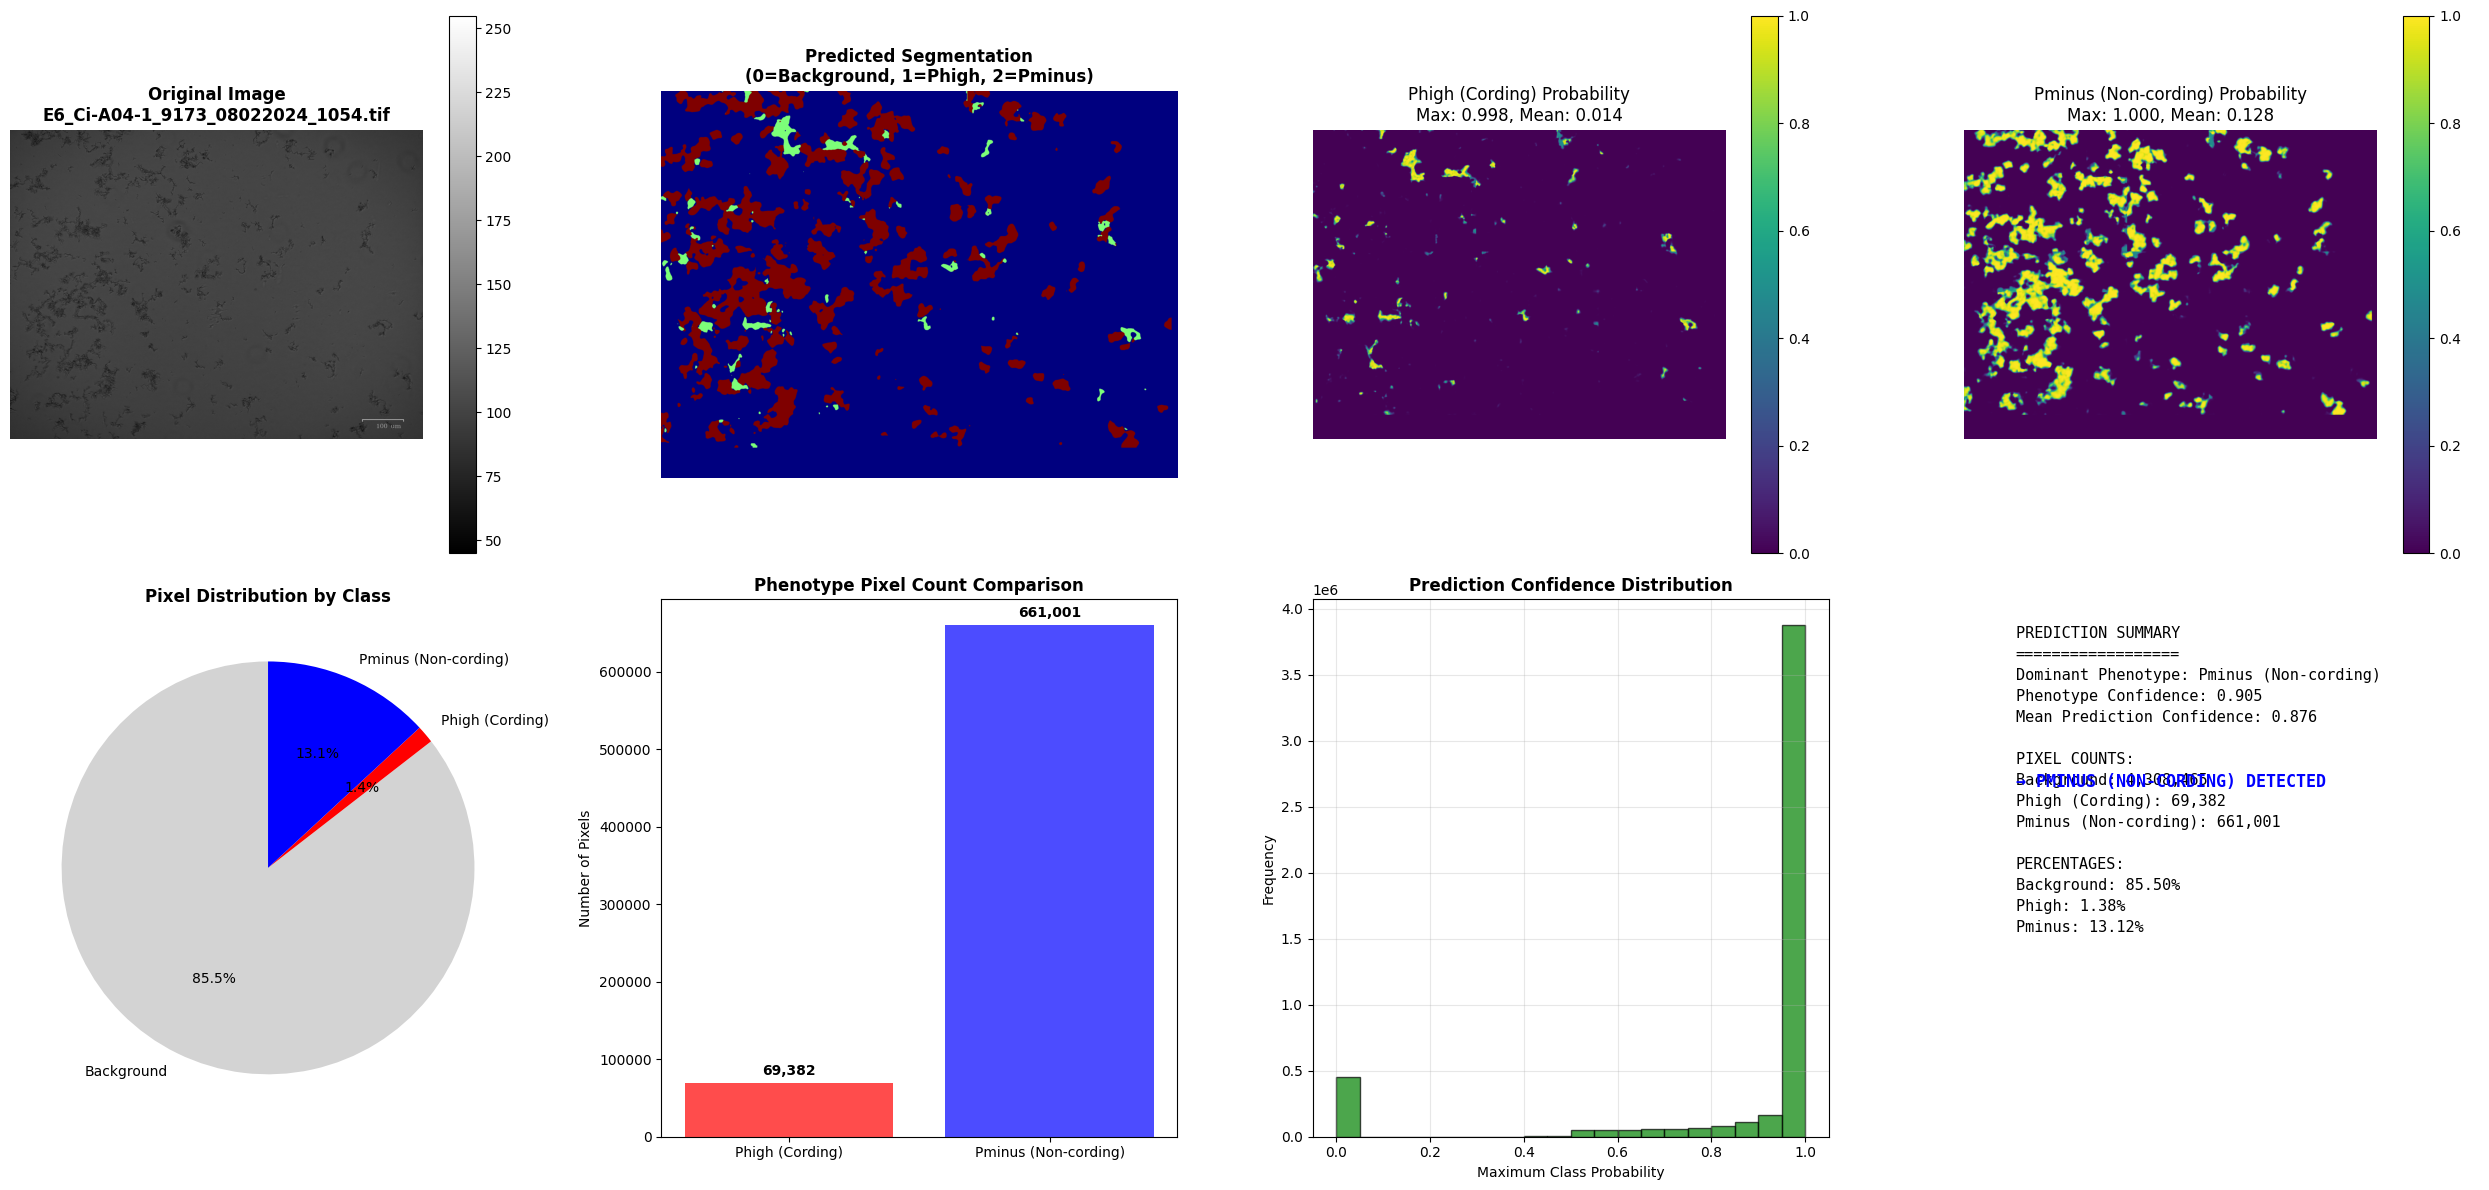


🎯 PREDICTION COMPLETE - QUICK SUMMARY
Dominant phenotype: Pminus (Non-cording)
Phenotype confidence: 0.905
Phigh pixels: 69,382 (1.38%)
Pminus pixels: 661,001 (13.12%)
🔵 CONCLUSION: NON-CORDING PHENOTYPE DOMINANT


In [6]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from datetime import datetime

def predict_unseen_image(img_path, model, tile_size=1024, overlap=0.25, save_outputs=True, output_dir="predictions"):
    """
    Predict segmentation on an unseen image without ground truth

    Parameters:
    - img_path: path to the input image
    - model: trained U-Net model
    - tile_size: size of tiles for processing
    - overlap: overlap between tiles (0-1)
    - save_outputs: whether to save prediction results
    - output_dir: directory to save outputs

    Returns:
    - pred_mask: final predicted mask (0=bg, 1=Phigh, 2=Pminus)
    - prob_map: probability maps for all classes
    - analysis_dict: dictionary with analysis results
    """

    # Create output directory
    if save_outputs and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Load and preprocess image
    print(f"🔍 Loading image: {os.path.basename(img_path)}")
    img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_original is None:
        raise ValueError(f"Could not load image from {img_path}")

    img = img_original.astype(np.float32) / 255.0
    h, w = img.shape

    print(f"📐 Image dimensions: {h}x{w}")

    # Tile-based prediction
    step = int(tile_size * (1 - overlap))
    prob_map = np.zeros((h, w, 3), dtype=np.float32)
    count_map = np.zeros((h, w), dtype=np.float32)

    print("🔄 Processing tiles...")
    total_tiles = ((h - tile_size) // step + 1) * ((w - tile_size) // step + 1)
    tile_count = 0

    for i in range(0, h - tile_size + 1, step):
        for j in range(0, w - tile_size + 1, step):
            tile = img[i:i+tile_size, j:j+tile_size]
            tile_input = np.expand_dims(tile, axis=(0, -1))

            # Predict
            pred_logits = model.predict(tile_input, verbose=0)[0]
            pred_softmax = tf.nn.softmax(pred_logits, axis=-1).numpy()

            # Accumulate probabilities
            prob_map[i:i+tile_size, j:j+tile_size] += pred_softmax
            count_map[i:i+tile_size, j:j+tile_size] += 1

            tile_count += 1
            if tile_count % 50 == 0:
                print(f"   Processed {tile_count}/{total_tiles} tiles...")

    # Average overlapping regions
    print("📊 Averaging overlapping regions...")
    prob_map /= np.maximum(count_map[..., np.newaxis], 1)

    # Create final mask
    pred_mask = np.argmax(prob_map, axis=-1).astype(np.uint8)

    # Analyze predictions
    analysis_dict = analyze_predictions(pred_mask, prob_map)

    # Save outputs
    if save_outputs:
        save_prediction_results(img_original, pred_mask, prob_map, analysis_dict,
                              img_path, output_dir)

    # Visualize results
    visualize_prediction(img_original, pred_mask, prob_map, analysis_dict, os.path.basename(img_path))

    return pred_mask, prob_map, analysis_dict

def analyze_predictions(pred_mask, prob_map):
    """Analyze the prediction results"""

    # Count pixels per class
    unique, counts = np.unique(pred_mask, return_counts=True)
    class_counts = dict(zip(unique, counts))

    # Ensure all classes are represented
    for class_id in [0, 1, 2]:
        if class_id not in class_counts:
            class_counts[class_id] = 0

    total_pixels = pred_mask.size
    class_percentages = {class_id: (count / total_pixels) * 100
                        for class_id, count in class_counts.items()}

    # Class names
    class_names = {
        0: "Background",
        1: "Phigh (Cording)",
        2: "Pminus (Non-cording)"
    }

    # Calculate confidence metrics
    max_probs = np.max(prob_map, axis=-1)
    mean_confidence = np.mean(max_probs)
    confidence_histogram = np.histogram(max_probs, bins=10, range=(0, 1))[0]

    # Determine dominant phenotype
    phigh_pixels = class_counts[1]
    pminus_pixels = class_counts[2]

    if phigh_pixels > pminus_pixels:
        dominant_phenotype = "Phigh (Cording)"
        confidence_ratio = phigh_pixels / (phigh_pixels + pminus_pixels + 1e-8)
    else:
        dominant_phenotype = "Pminus (Non-cording)"
        confidence_ratio = pminus_pixels / (phigh_pixels + pminus_pixels + 1e-8)

    analysis = {
        'class_counts': class_counts,
        'class_percentages': class_percentages,
        'class_names': class_names,
        'total_pixels': total_pixels,
        'mean_confidence': mean_confidence,
        'confidence_histogram': confidence_histogram,
        'dominant_phenotype': dominant_phenotype,
        'phenotype_confidence': confidence_ratio,
        'phigh_pixels': phigh_pixels,
        'pminus_pixels': pminus_pixels
    }

    return analysis

def save_prediction_results(original_img, pred_mask, prob_map, analysis, img_path, output_dir):
    """Save prediction results to files"""

    base_name = os.path.splitext(os.path.basename(img_path))[0]
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

    # Save prediction mask
    mask_save_path = os.path.join(output_dir, f"{base_name}_prediction_{timestamp}.png")
    cv2.imwrite(mask_save_path, (pred_mask * 85).astype(np.uint8))  # Scale for visibility

    # Save probability maps
    prob_phigh_path = os.path.join(output_dir, f"{base_name}_prob_phigh_{timestamp}.png")
    cv2.imwrite(prob_phigh_path, (prob_map[:, :, 1] * 255).astype(np.uint8))

    prob_pminus_path = os.path.join(output_dir, f"{base_name}_prob_pminus_{timestamp}.png")
    cv2.imwrite(prob_pminus_path, (prob_map[:, :, 2] * 255).astype(np.uint8))

    # Save analysis report
    report_path = os.path.join(output_dir, f"{base_name}_analysis_{timestamp}.txt")
    with open(report_path, 'w') as f:
        f.write(f"Prediction Analysis Report\n")
        f.write(f"========================\n")
        f.write(f"Image: {os.path.basename(img_path)}\n")
        f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Image dimensions: {original_img.shape}\n\n")

        f.write("CLASS DISTRIBUTION:\n")
        for class_id in [0, 1, 2]:
            count = analysis['class_counts'][class_id]
            percentage = analysis['class_percentages'][class_id]
            f.write(f"  {analysis['class_names'][class_id]}: {count:,} pixels ({percentage:.2f}%)\n")

        f.write(f"\nPHENOTYPE ANALYSIS:\n")
        f.write(f"  Dominant phenotype: {analysis['dominant_phenotype']}\n")
        f.write(f"  Phenotype confidence: {analysis['phenotype_confidence']:.3f}\n")
        f.write(f"  Mean prediction confidence: {analysis['mean_confidence']:.3f}\n")

        f.write(f"\nSUMMARY:\n")
        if analysis['dominant_phenotype'] == "Phigh (Cording)":
            f.write(f"  ⚠️  This sample shows CORDING phenotype dominance\n")
        else:
            f.write(f"  ✅ This sample shows NON-CORDING phenotype dominance\n")

    print(f"💾 Results saved to {output_dir}/")
    print(f"   - Prediction mask: {os.path.basename(mask_save_path)}")
    print(f"   - Probability maps: {os.path.basename(prob_phigh_path)}, {os.path.basename(prob_pminus_path)}")
    print(f"   - Analysis report: {os.path.basename(report_path)}")

def visualize_prediction(original_img, pred_mask, prob_map, analysis, img_name):
    """Create comprehensive visualization of prediction results"""

    fig = plt.figure(figsize=(25, 12))

    # Original image
    plt.subplot(2, 4, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title(f'Original Image\n{img_name}', fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.colorbar()

    # Predicted mask
    plt.subplot(2, 4, 2)
    plt.imshow(pred_mask, cmap='jet', vmin=0, vmax=2)
    plt.title('Predicted Segmentation\n(0=Background, 1=Phigh, 2=Pminus)',
              fontsize=12, fontweight='bold')
    plt.axis('off')

    # Phigh probability map
    plt.subplot(2, 4, 3)
    phigh_prob = prob_map[:, :, 1]
    plt.imshow(phigh_prob, cmap='viridis', vmin=0, vmax=1)
    plt.title(f'Phigh (Cording) Probability\nMax: {phigh_prob.max():.3f}, Mean: {phigh_prob.mean():.3f}',
              fontsize=12)
    plt.axis('off')
    plt.colorbar()

    # Pminus probability map
    plt.subplot(2, 4, 4)
    pminus_prob = prob_map[:, :, 2]
    plt.imshow(pminus_prob, cmap='viridis', vmin=0, vmax=1)
    plt.title(f'Pminus (Non-cording) Probability\nMax: {pminus_prob.max():.3f}, Mean: {pminus_prob.mean():.3f}',
              fontsize=12)
    plt.axis('off')
    plt.colorbar()

    # Class distribution pie chart
    plt.subplot(2, 4, 5)
    labels = [analysis['class_names'][i] for i in [0, 1, 2]]
    sizes = [analysis['class_percentages'][i] for i in [0, 1, 2]]
    colors = ['lightgray', 'red', 'blue']

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Pixel Distribution by Class', fontsize=12, fontweight='bold')

    # Phenotype comparison bar chart
    plt.subplot(2, 4, 6)
    phenotypes = ['Phigh (Cording)', 'Pminus (Non-cording)']
    counts = [analysis['phigh_pixels'], analysis['pminus_pixels']]
    colors = ['red', 'blue']

    bars = plt.bar(phenotypes, counts, color=colors, alpha=0.7)
    plt.title('Phenotype Pixel Count Comparison', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Pixels')

    # Add value labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(counts)*0.01,
                f'{count:,}', ha='center', va='bottom', fontweight='bold')

    # Confidence histogram
    plt.subplot(2, 4, 7)
    max_probs = np.max(prob_map, axis=-1)
    plt.hist(max_probs.flatten(), bins=20, alpha=0.7, color='green', edgecolor='black')
    plt.title('Prediction Confidence Distribution', fontsize=12, fontweight='bold')
    plt.xlabel('Maximum Class Probability')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

    # Text summary
    plt.subplot(2, 4, 8)
    plt.axis('off')

    summary_text = [
        "PREDICTION SUMMARY",
        "==================",
        f"Dominant Phenotype: {analysis['dominant_phenotype']}",
        f"Phenotype Confidence: {analysis['phenotype_confidence']:.3f}",
        f"Mean Prediction Confidence: {analysis['mean_confidence']:.3f}",
        "",
        "PIXEL COUNTS:",
        f"Background: {analysis['class_counts'][0]:,}",
        f"Phigh (Cording): {analysis['class_counts'][1]:,}",
        f"Pminus (Non-cording): {analysis['class_counts'][2]:,}",
        "",
        "PERCENTAGES:",
        f"Background: {analysis['class_percentages'][0]:.2f}%",
        f"Phigh: {analysis['class_percentages'][1]:.2f}%",
        f"Pminus: {analysis['class_percentages'][2]:.2f}%"
    ]

    # Color the dominant phenotype text
    dominant_color = 'red' if analysis['dominant_phenotype'] == "Phigh (Cording)" else 'blue'

    plt.text(0.1, 0.95, "\n".join(summary_text), fontfamily='monospace',
             fontsize=11, verticalalignment='top', linespacing=1.5)

    # Highlight the dominant phenotype
    plt.text(0.1, 0.65, f"→ {analysis['dominant_phenotype'].upper()} DETECTED",
             fontfamily='monospace', fontsize=12, fontweight='bold',
             color=dominant_color)

    plt.tight_layout()
    plt.show()

# =====================
# USAGE EXAMPLE
# =====================

def main():
    # Load your trained model
    model_path = "/content/mydrive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras"
    model = tf.keras.models.load_model(model_path, compile=False)
    print("✅ Model loaded successfully!")

    # Example 1: Predict single image
    image_path = "/content/mydrive/MyDrive/Project/Ci-A04-1/E6_Ci-A04-1_9173_08022024_1054.tif"

    print("🚀 Starting prediction...")
    pred_mask, prob_map, analysis = predict_unseen_image(
        img_path=image_path,
        model=model,
        tile_size=1024,
        overlap=0.25,
        save_outputs=True,
        output_dir="predictions"
    )

    # Print quick summary
    print("\n" + "="*50)
    print("🎯 PREDICTION COMPLETE - QUICK SUMMARY")
    print("="*50)
    print(f"Dominant phenotype: {analysis['dominant_phenotype']}")
    print(f"Phenotype confidence: {analysis['phenotype_confidence']:.3f}")
    print(f"Phigh pixels: {analysis['phigh_pixels']:,} ({analysis['class_percentages'][1]:.2f}%)")
    print(f"Pminus pixels: {analysis['pminus_pixels']:,} ({analysis['class_percentages'][2]:.2f}%)")

    if analysis['dominant_phenotype'] == "Phigh (Cording)":
        print("🔴 CONCLUSION: CORDING PHENOTYPE DOMINANT")
    else:
        print("🔵 CONCLUSION: NON-CORDING PHENOTYPE DOMINANT")

# Run the prediction
if __name__ == "__main__":
    main()

### 2.2 Testing model on image

### 2.3 Applying model to unseen data

🧪 Testing with one image first...
✅ Model loaded successfully!
📐 Processing image: 1944x2592
🔄 Will process ~6 tiles...
🎯 Prediction complete. Mask unique values: [0 1 2]
📊 Analysis: Background: 94.7%, Phigh: 5.3%, Pminus: 0.0%, Total Bacteria: 266,648 pixels (5.3%)


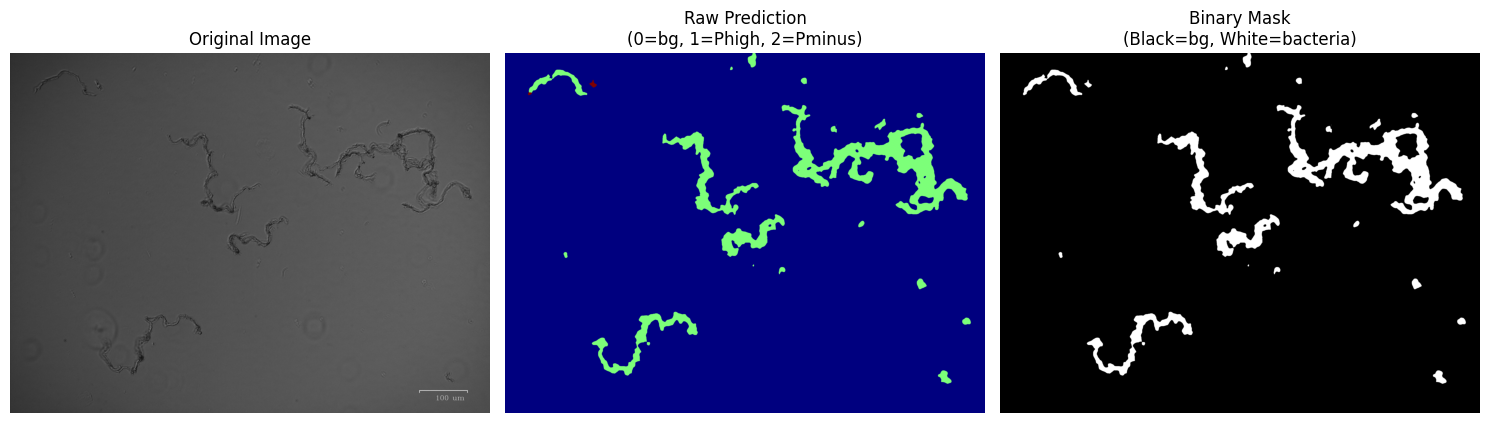

🎯 Binary mask stats: Unique values: [  0 255], White pixels: 266,648

🚀 Proceed with batch processing? (y/n): y
✅ Model loaded successfully!
🚀 Starting batch processing of all folders...
📁 Folders to process: 17
📍 Base path: /content/mydrive/MyDrive/Project/

📁 PROCESSING FOLDER: Ci-A04-1
📊 Found 9 images in Ci-A04-1
🔄 Processing image 1/9: H4_Ci-A04-1_9238_08022024_1137.tif
📐 Processing image: 1944x2592
🔄 Will process ~6 tiles...
🎯 Prediction complete. Mask unique values: [0 1 2]
📊 Analysis: Background: 91.5%, Phigh: 1.1%, Pminus: 7.5%, Total Bacteria: 428,940 pixels (8.5%)
🔍 Mask stats - Unique values: [0 1 2], Shape: (1944, 2592)
✅ Saved: H4_Ci-A04-1_9238_08022024_1137_mask.tif (bacteria: 428,940 pixels)
🔄 Processing image 2/9: E6_Ci-A04-1_9171_08022024_1053.tif
📐 Processing image: 1944x2592
🔄 Will process ~6 tiles...
🎯 Prediction complete. Mask unique values: [0 1 2]
📊 Analysis: Background: 87.9%, Phigh: 1.9%, Pminus: 10.2%, Total Bacteria: 608,680 pixels (12.1%)
🔍 Mask stats - Uni

In [9]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from datetime import datetime
import pandas as pd

def batch_predict_all_folders(model, base_path, folder_names, tile_size=1024, overlap=0.25):
    """
    Batch predict on all images in multiple folders and save comprehensive results
    """

    # Create main results directory with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    main_output_dir = f"batch_predictions_{timestamp}"
    os.makedirs(main_output_dir, exist_ok=True)

    # Process each folder
    for folder_name in folder_names:
        print(f"\n{'='*60}")
        print(f"📁 PROCESSING FOLDER: {folder_name}")
        print(f"{'='*60}")

        folder_path = os.path.join(base_path, folder_name)
        folder_output_dir = os.path.join(main_output_dir, f"{folder_name}_masks")
        os.makedirs(folder_output_dir, exist_ok=True)

        # Get all TIFF images in the folder
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.tif', '.tiff'))]

        if not image_files:
            print(f"⚠️  No TIFF images found in {folder_path}")
            continue

        print(f"📊 Found {len(image_files)} images in {folder_name}")

        # DataFrame to store results for this folder
        folder_results = []

        # Process each image in the folder
        for i, image_file in enumerate(image_files, 1):
            print(f"🔄 Processing image {i}/{len(image_files)}: {image_file}")
            start_time = datetime.now()

            try:
                image_path = os.path.join(folder_path, image_file)

                # Predict on the image
                pred_mask, prob_map, analysis = predict_unseen_image(
                    img_path=image_path,
                    model=model,
                    tile_size=tile_size,
                    overlap=overlap
                )

                # DEBUG: Check what we're getting
                unique_vals = np.unique(pred_mask)
                print(f"🔍 Mask stats - Unique values: {unique_vals}, "
                      f"Shape: {pred_mask.shape}")

                # Create binary mask: background=0, bacteria=255
                binary_mask = create_binary_mask(pred_mask)

                # Save the binary mask as TIFF
                mask_filename = os.path.splitext(image_file)[0] + "_mask.tif"
                mask_path = os.path.join(folder_output_dir, mask_filename)
                cv2.imwrite(mask_path, binary_mask)

                # Also save a preview PNG for quick checking
                preview_filename = os.path.splitext(image_file)[0] + "_preview.png"
                preview_path = os.path.join(folder_output_dir, preview_filename)

                # Create preview with original and mask side by side
                create_preview_image(image_path, binary_mask, preview_path)

                processing_time = (datetime.now() - start_time).total_seconds()

                # Store results for CSV
                folder_results.append({
                    'image': image_file,
                    'background_pixels': analysis['class_counts'][0],
                    'background_percent': analysis['class_percentages'][0],
                    'phigh_pixels': analysis['class_counts'][1],
                    'phigh_percent': analysis['class_percentages'][1],
                    'pminus_pixels': analysis['class_counts'][2],
                    'pminus_percent': analysis['class_percentages'][2],
                    'total_bacteria_pixels': analysis['class_counts'][1] + analysis['class_counts'][2],
                    'bacteria_percent': analysis['class_percentages'][1] + analysis['class_percentages'][2],
                    'dominant_phenotype': analysis['dominant_phenotype'],
                    'phenotype_confidence': analysis['phenotype_confidence'],
                    'mean_confidence': analysis['mean_confidence'],
                    'processing_time_seconds': processing_time
                })

                print(f"✅ Saved: {mask_filename} (bacteria: {analysis['class_counts'][1] + analysis['class_counts'][2]:,} pixels)")

            except Exception as e:
                print(f"❌ Error processing {image_file}: {str(e)}")
                import traceback
                traceback.print_exc()
                continue

        # Save folder results to CSV
        if folder_results:
            df = pd.DataFrame(folder_results)
            csv_path = os.path.join(main_output_dir, f"{folder_name}_analysis.csv")
            df.to_csv(csv_path, index=False)
            print(f"📈 Saved analysis: {folder_name}_analysis.csv")

    print(f"\n🎉 BATCH PROCESSING COMPLETE!")
    print(f"📁 Results saved in: {main_output_dir}")

    return main_output_dir

def create_binary_mask(pred_mask):
    """
    Convert multi-class mask to binary mask:
    - Background (class 0) = 0 (black)
    - Bacteria (classes 1 and 2) = 255 (white)
    """
    binary_mask = np.zeros_like(pred_mask, dtype=np.uint8)
    # Set both Phigh (1) and Pminus (2) to white (255)
    binary_mask[(pred_mask == 1) | (pred_mask == 2)] = 255
    return binary_mask

def create_preview_image(original_path, binary_mask, preview_path):
    """Create a preview image showing original and mask side by side"""
    # Load original image
    original = cv2.imread(original_path, cv2.IMREAD_GRAYSCALE)

    # Create side-by-side preview
    preview = np.hstack([original, binary_mask])

    # Add labels
    preview_rgb = cv2.cvtColor(preview, cv2.COLOR_GRAY2BGR)
    height = original.shape[0]

    # Add text labels
    cv2.putText(preview_rgb, "Original", (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.putText(preview_rgb, "Mask", (original.shape[1] + 10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Add separator line
    cv2.line(preview_rgb, (original.shape[1], 0), (original.shape[1], height), (0, 255, 0), 2)

    cv2.imwrite(preview_path, preview_rgb)

def predict_unseen_image(img_path, model, tile_size=1024, overlap=0.25):
    """
    Predict segmentation on an unseen image without ground truth
    """

    # Load and preprocess image
    img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img_original is None:
        raise ValueError(f"Could not load image from {img_path}")

    img = img_original.astype(np.float32) / 255.0
    h, w = img.shape

    print(f"📐 Processing image: {h}x{w}")

    # Tile-based prediction
    step = int(tile_size * (1 - overlap))
    prob_map = np.zeros((h, w, 3), dtype=np.float32)
    count_map = np.zeros((h, w), dtype=np.float32)

    total_tiles = ((h - tile_size) // step + 1) * ((w - tile_size) // step + 1)
    tile_count = 0

    print(f"🔄 Will process ~{total_tiles} tiles...")

    for i in range(0, h - tile_size + 1, step):
        for j in range(0, w - tile_size + 1, step):
            tile = img[i:i+tile_size, j:j+tile_size]
            tile_input = np.expand_dims(tile, axis=(0, -1))

            # Predict
            pred_logits = model.predict(tile_input, verbose=0)[0]
            pred_softmax = tf.nn.softmax(pred_logits, axis=-1).numpy()

            # Accumulate probabilities
            prob_map[i:i+tile_size, j:j+tile_size] += pred_softmax
            count_map[i:i+tile_size, j:j+tile_size] += 1

            tile_count += 1
            if tile_count % 20 == 0:
                print(f"   Processed {tile_count}/{total_tiles} tiles...")

    # Average overlapping regions
    prob_map /= np.maximum(count_map[..., np.newaxis], 1)

    # Create final mask
    pred_mask = np.argmax(prob_map, axis=-1).astype(np.uint8)

    print(f"🎯 Prediction complete. Mask unique values: {np.unique(pred_mask)}")

    # Analyze predictions
    analysis_dict = analyze_predictions(pred_mask, prob_map)

    return pred_mask, prob_map, analysis_dict

def analyze_predictions(pred_mask, prob_map):
    """Analyze the prediction results"""

    # Count pixels per class
    unique, counts = np.unique(pred_mask, return_counts=True)
    class_counts = dict(zip(unique, counts))

    # Ensure all classes are represented
    for class_id in [0, 1, 2]:
        if class_id not in class_counts:
            class_counts[class_id] = 0

    total_pixels = pred_mask.size
    class_percentages = {class_id: (count / total_pixels) * 100
                        for class_id, count in class_counts.items()}

    # Calculate confidence metrics
    max_probs = np.max(prob_map, axis=-1)
    mean_confidence = np.mean(max_probs)

    # Determine dominant phenotype
    phigh_pixels = class_counts[1]
    pminus_pixels = class_counts[2]
    total_bacteria = phigh_pixels + pminus_pixels

    if phigh_pixels > pminus_pixels:
        dominant_phenotype = "Phigh (Cording)"
        confidence_ratio = phigh_pixels / (total_bacteria + 1e-8)
    else:
        dominant_phenotype = "Pminus (Non-cording)"
        confidence_ratio = pminus_pixels / (total_bacteria + 1e-8)

    analysis = {
        'class_counts': class_counts,
        'class_percentages': class_percentages,
        'total_pixels': total_pixels,
        'mean_confidence': mean_confidence,
        'dominant_phenotype': dominant_phenotype,
        'phenotype_confidence': confidence_ratio,
        'phigh_pixels': phigh_pixels,
        'pminus_pixels': pminus_pixels
    }

    print(f"📊 Analysis: Background: {class_percentages[0]:.1f}%, "
          f"Phigh: {class_percentages[1]:.1f}%, "
          f"Pminus: {class_percentages[2]:.1f}%, "
          f"Total Bacteria: {total_bacteria:,} pixels ({class_percentages[1] + class_percentages[2]:.1f}%)")

    return analysis

def test_single_image_first():
    """Test with one image first to debug"""
    model_path = "/content/mydrive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras"
    model = tf.keras.models.load_model(model_path, compile=False)
    print("✅ Model loaded successfully!")

    # Test with one image
    test_image_path = "/content/mydrive/MyDrive/Project/Parental_Phigh/A1_Parental-Phigh_9062_08022024_0939.tif"

    pred_mask, prob_map, analysis = predict_unseen_image(
        img_path=test_image_path,
        model=model,
        tile_size=1024,
        overlap=0.25
    )

    # Create binary mask for display
    binary_mask = create_binary_mask(pred_mask)

    # Visualize the result
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    original = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(pred_mask, cmap='jet', vmin=0, vmax=2)
    plt.title('Raw Prediction\n(0=bg, 1=Phigh, 2=Pminus)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(binary_mask, cmap='gray')
    plt.title('Binary Mask\n(Black=bg, White=bacteria)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"🎯 Binary mask stats: Unique values: {np.unique(binary_mask)}, "
          f"White pixels: {np.sum(binary_mask == 255):,}")

    return pred_mask, binary_mask, analysis

def main_batch_processing():
    """Main function for batch processing all folders"""

    # Load your trained model
    model_path = "/content/mydrive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras"
    model = tf.keras.models.load_model(model_path, compile=False)
    print("✅ Model loaded successfully!")

    # Define folders to process
    folder_names = [
        "Ci-A04-1", "Ci-A04-2", "Ci-A04-3", "Ci-A04-5",
        "Ci-E06-1", "Ci-E06-2", "Ci-E06-7", "Ci-E06-8",
        "Ci-NT-1", "Ci-NT-2", "Ci-NT-3", "Ci-NT-4",
        "Ci-U17-2", "Ci-U17-3", "Ci-U17-4", "Parental_Phigh", "Parental_Pminus"
    ]

    # Base path where your folders are located
    base_path = "/content/mydrive/MyDrive/Project/"

    print("🚀 Starting batch processing of all folders...")
    print(f"📁 Folders to process: {len(folder_names)}")
    print(f"📍 Base path: {base_path}")

    # Run batch processing
    output_dir = batch_predict_all_folders(
        model=model,
        base_path=base_path,
        folder_names=folder_names,
        tile_size=1024,
        overlap=0.25
    )

    return output_dir

# Run the batch processing
if __name__ == "__main__":
    # First test with one image to debug
    print("🧪 Testing with one image first...")
    test_mask, binary_mask, test_analysis = test_single_image_first()

    # If the test works, run batch processing
    response = input("\n🚀 Proceed with batch processing? (y/n): ")
    if response.lower() == 'y':
        output_dir = main_batch_processing()
    else:
        print("⏹️  Batch processing cancelled.")

## 3.0 GLCM Feature Extraction


### 3.1 Feature Extraction with Macro and Medium Scale

🚀 Starting Enhanced Multi-Scale Texture Analysis...
📊 Focus: Medium + Macro texture patterns
🔄 Features: GLCM + LBP + Region statistics

🎯 Feature Dimensions:
📊 Total features: 65
🔍 Medium-scale: 18
🔍 Macro-scale: 12
📈 Scale statistics: 26
🔄 LBP features: 18
📏 Region stats: 5

📁 Processing: Ci-A04-1
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:25<00:00,  2.83s/it]


✅ Collected 9 samples from Ci-A04-1

📁 Processing: Ci-A04-2
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.72s/it]


✅ Collected 9 samples from Ci-A04-2

📁 Processing: Ci-A04-3
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.75s/it]


✅ Collected 9 samples from Ci-A04-3

📁 Processing: Ci-A04-5
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:25<00:00,  2.82s/it]


✅ Collected 9 samples from Ci-A04-5

📁 Processing: Ci-E06-1
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:23<00:00,  2.59s/it]


✅ Collected 9 samples from Ci-E06-1

📁 Processing: Ci-E06-2
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.68s/it]


✅ Collected 9 samples from Ci-E06-2

📁 Processing: Ci-E06-7
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.75s/it]


✅ Collected 9 samples from Ci-E06-7

📁 Processing: Ci-E06-8
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:25<00:00,  2.83s/it]


✅ Collected 9 samples from Ci-E06-8

📁 Processing: Ci-NT-1
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.74s/it]


✅ Collected 9 samples from Ci-NT-1

📁 Processing: Ci-NT-2
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.73s/it]


✅ Collected 9 samples from Ci-NT-2

📁 Processing: Ci-NT-3
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.77s/it]


✅ Collected 9 samples from Ci-NT-3

📁 Processing: Ci-NT-4
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:25<00:00,  2.79s/it]


✅ Collected 9 samples from Ci-NT-4

📁 Processing: Ci-U17-1
⚠️  Skipping Ci-U17-1 - folders not found

📁 Processing: Ci-U17-2
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:22<00:00,  2.53s/it]


✅ Collected 9 samples from Ci-U17-2

📁 Processing: Ci-U17-3
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.76s/it]


✅ Collected 9 samples from Ci-U17-3

📁 Processing: Ci-U17-4
🔍 Analyzing 9 images with multi-scale features...


100%|██████████| 9/9 [00:24<00:00,  2.74s/it]


✅ Collected 9 samples from Ci-U17-4

📁 Processing: Parental_Phigh
🔍 Analyzing 24 images with multi-scale features...


100%|██████████| 24/24 [01:05<00:00,  2.71s/it]


✅ Collected 20 samples from Parental_Phigh

📁 Processing: Parental_Pminus
🔍 Analyzing 24 images with multi-scale features...


100%|██████████| 24/24 [01:04<00:00,  2.71s/it]


✅ Collected 20 samples from Parental_Pminus

🎉 SUCCESS! Saved 175 total samples to multi_scale_texture_features_20251026_204753.csv


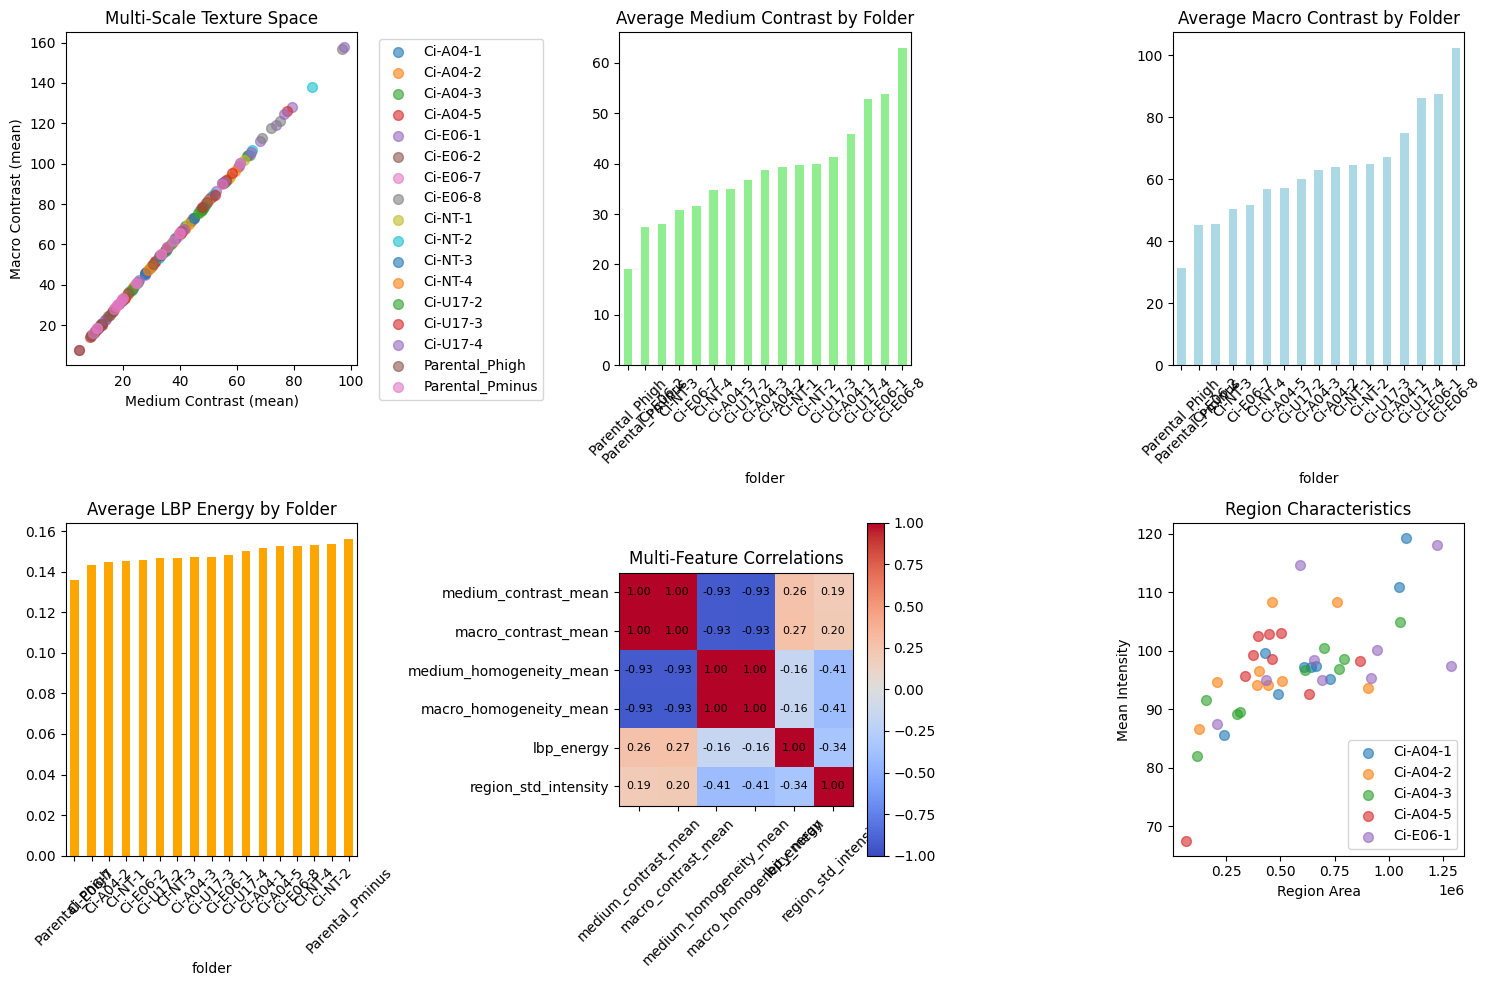


📈 ENHANCED TEXTURE ANALYSIS COMPLETE!
📁 Processed 17 folders
🖼️  Total images analyzed: 175
📋 Features per image: 62

🔍 Key Multi-Scale Features:
                 medium_contrast_mean  macro_contrast_mean  \
folder                                                       
Ci-A04-1                       45.860               74.962   
Ci-A04-2                       39.246               63.795   
Ci-A04-3                       38.671               62.931   
Ci-A04-5                       35.018               57.222   
Ci-E06-1                       53.739               87.402   
Ci-E06-2                       28.008               45.591   
Ci-E06-7                       31.610               51.521   
Ci-E06-8                       62.919              102.210   
Ci-NT-1                        39.691               64.659   
Ci-NT-2                        39.859               64.749   
Ci-NT-3                        30.856               50.220   
Ci-NT-4                        34.788          

In [11]:
import numpy as np
import cv2
import pandas as pd
import os
from skimage import feature
from skimage.util import img_as_ubyte
import matplotlib.pyplot as plt
from tqdm import tqdm

class MultiScaleTextureExtractor:
    def __init__(self, macro_distance=7, medium_distances=[3, 5], angles=[0, np.pi/4], levels=64):
        """
        Multi-scale texture feature extractor capturing both medium and macro patterns
        """
        self.macro_distance = macro_distance
        self.medium_distances = medium_distances
        self.angles = angles
        self.levels = levels

    def extract_texture_features(self, image, mask):
        """
        Extract multi-scale texture features including medium and macro patterns
        """
        if len(image.shape) > 2:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply mask
        bacteria_region = cv2.bitwise_and(image, image, mask=mask)

        if np.sum(mask > 0) < 100:
            return self._empty_features()

        try:
            # Enhanced normalization
            normalized = cv2.normalize(bacteria_region, None, 0, 255, cv2.NORM_MINMAX)
            quantized = (normalized // (256 // self.levels)).astype(np.uint8)

            features = {}

            # Combine all distances for comprehensive GLCM
            all_distances = self.medium_distances + [self.macro_distance]

            # Compute GLCM with multiple distances and angles
            glcm = feature.graycomatrix(
                quantized,
                distances=all_distances,
                angles=self.angles,
                levels=self.levels,
                symmetric=True,
                normed=True
            )

            # Extract texture properties for each distance and angle
            # CORRECTED: Use 'ASM' instead of 'asm'
            properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

            for prop in properties:
                try:
                    prop_values = feature.graycoprops(glcm, prop)

                    # Average across angles for each distance
                    for i, distance in enumerate(all_distances):
                        if distance in self.medium_distances:
                            prefix = 'medium'
                        else:
                            prefix = 'macro'

                        feature_name = f'{prefix}_{prop}_d{distance}'
                        value = np.mean(prop_values[i, :])  # Average across angles
                        features[feature_name] = float(value) if np.isfinite(value) else 0.0

                    # Overall statistics for each scale
                    medium_indices = [i for i, d in enumerate(all_distances) if d in self.medium_distances]
                    macro_indices = [i for i, d in enumerate(all_distances) if d == self.macro_distance]

                    if medium_indices:
                        medium_values = prop_values[medium_indices, :].flatten()
                        features[f'medium_{prop}_mean'] = float(np.mean(medium_values))
                        features[f'medium_{prop}_std'] = float(np.std(medium_values))

                    if macro_indices:
                        macro_values = prop_values[macro_indices, :].flatten()
                        features[f'macro_{prop}_mean'] = float(np.mean(macro_values))
                        features[f'macro_{prop}_std'] = float(np.std(macro_values))

                except Exception as e:
                    print(f"Warning: Could not compute property {prop}: {e}")
                    # Set default values for this property
                    for distance in all_distances:
                        if distance in self.medium_distances:
                            prefix = 'medium'
                        else:
                            prefix = 'macro'
                        features[f'{prefix}_{prop}_d{distance}'] = 0.0

                    features[f'medium_{prop}_mean'] = 0.0
                    features[f'medium_{prop}_std'] = 0.0
                    features[f'macro_{prop}_mean'] = 0.0
                    features[f'macro_{prop}_std'] = 0.0

            # Add Local Binary Patterns (LBP) for complementary texture info
            lbp_features = self._extract_lbp_features(normalized, mask)
            features.update(lbp_features)

            # Enhanced region statistics
            region_pixels = image[mask > 0]
            if len(region_pixels) > 0:
                features['region_mean_intensity'] = float(np.mean(region_pixels))
                features['region_std_intensity'] = float(np.std(region_pixels))
                features['region_area'] = int(len(region_pixels))
                features['region_skewness'] = float(pd.Series(region_pixels.flatten()).skew())
                features['region_kurtosis'] = float(pd.Series(region_pixels.flatten()).kurtosis())
            else:
                stats_features = {
                    'region_mean_intensity': 0.0, 'region_std_intensity': 0.0,
                    'region_area': 0, 'region_skewness': 0.0, 'region_kurtosis': 0.0
                }
                features.update(stats_features)

            return features

        except Exception as e:
            print(f"Multi-scale feature extraction failed: {e}")
            return self._empty_features()

    def _extract_lbp_features(self, image, mask, radius=2, n_points=16):
        """Extract Local Binary Pattern features"""
        try:
            # Apply mask
            masked_image = image.copy()
            masked_image[mask == 0] = 0

            # Compute LBP
            lbp = feature.local_binary_pattern(masked_image, n_points, radius, method='uniform')

            # Only consider pixels within mask
            lbp_masked = lbp[mask > 0]

            if len(lbp_masked) == 0:
                return {f'lbp_hist_{i}': 0.0 for i in range(10)}

            # Compute LBP histogram (using uniform patterns)
            hist, _ = np.histogram(lbp_masked, bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            hist = hist.astype(float)
            hist /= (hist.sum() + 1e-8)  # Normalize

            lbp_features = {}
            for i in range(len(hist)):
                lbp_features[f'lbp_hist_{i}'] = float(hist[i])

            # Add LBP statistics
            lbp_features['lbp_energy'] = float(np.sum(hist ** 2))
            lbp_features['lbp_entropy'] = float(-np.sum(hist * np.log(hist + 1e-8)))

            return lbp_features

        except Exception as e:
            print(f"LBP extraction failed: {e}")
            return {f'lbp_hist_{i}': 0.0 for i in range(10)}

    def _empty_features(self):
        """Return empty feature set with all expected keys"""
        base_features = {}

        # CORRECTED: Use 'ASM' instead of 'asm'
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

        # Medium-scale features
        for distance in self.medium_distances:
            for prop in properties:
                base_features[f'medium_{prop}_d{distance}'] = 0.0

        # Macro-scale features
        for prop in properties:
            base_features[f'macro_{prop}_d{self.macro_distance}'] = 0.0

        # Statistical features
        for prop in properties:
            base_features[f'medium_{prop}_mean'] = 0.0
            base_features[f'medium_{prop}_std'] = 0.0
            base_features[f'macro_{prop}_mean'] = 0.0
            base_features[f'macro_{prop}_std'] = 0.0

        # LBP features
        for i in range(18):  # 16 bins + energy + entropy
            if i < 16:
                base_features[f'lbp_hist_{i}'] = 0.0
            elif i == 16:
                base_features['lbp_energy'] = 0.0
            else:
                base_features['lbp_entropy'] = 0.0

        # Region statistics
        stats_features = {
            'region_mean_intensity': 0.0, 'region_std_intensity': 0.0,
            'region_area': 0, 'region_skewness': 0.0, 'region_kurtosis': 0.0
        }
        base_features.update(stats_features)

        return base_features

def enhanced_texture_analysis(image_folder, mask_folder, output_csv=None):
    """
    Enhanced multi-scale texture analysis
    """
    extractor = MultiScaleTextureExtractor(
        macro_distance=7,
        medium_distances=[3, 5],  # Added medium distances
        angles=[0, np.pi/4],      # Multiple angles for robustness
        levels=64                 # Finer quantization
    )

    # Get files
    image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.tif', '.tiff', '.png', '.jpg'))]
    mask_files = [f for f in os.listdir(mask_folder) if f.lower().endswith(('.tif', '.tiff', '.png'))]

    print(f"🔍 Analyzing {len(image_files)} images with multi-scale features...")

    results = []

    for image_file in tqdm(image_files[:50]):
        try:
            # Find mask
            base_name = os.path.splitext(image_file)[0]
            mask_file = None

            for suffix in ['_mask.tif', '_mask.png', '.tif', '.png', '_prediction.png']:
                candidate = base_name + suffix
                if candidate in mask_files:
                    mask_file = candidate
                    break

            if not mask_file:
                continue

            # Load data
            img = cv2.imread(os.path.join(image_folder, image_file), cv2.IMREAD_GRAYSCALE)
            mask = cv2.imread(os.path.join(mask_folder, mask_file), cv2.IMREAD_GRAYSCALE)

            if img is None or mask is None:
                continue

            # Ensure binary mask
            mask = (mask > 0).astype(np.uint8) * 255

            # Resize if needed
            if img.shape != mask.shape:
                mask = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)

            # Extract enhanced features
            features = extractor.extract_texture_features(img, mask)

            # Add metadata
            features['image'] = image_file
            features['folder'] = os.path.basename(image_folder)
            features['bacteria_pixels'] = np.sum(mask > 0)

            results.append(features)

        except Exception as e:
            print(f"Error processing {image_file}: {e}")
            continue

    # Create DataFrame
    df = pd.DataFrame(results)

    if output_csv and len(df) > 0:
        df.to_csv(output_csv, index=False)
        print(f"💾 Saved {len(df)} samples with {len([c for c in df.columns if 'medium' in c or 'macro' in c])} texture features to {output_csv}")

    return df

def analyze_all_folders_enhanced(base_path, mask_base_path, folder_names, sample_limit=30):
    """
    Analyze all folders with enhanced multi-scale features
    """
    all_data = []

    for folder_name in folder_names:
        print(f"\n📁 Processing: {folder_name}")

        image_folder = os.path.join(base_path, folder_name)
        mask_folder = os.path.join(mask_base_path, f"{folder_name}_masks")

        if not os.path.exists(image_folder) or not os.path.exists(mask_folder):
            print(f"⚠️  Skipping {folder_name} - folders not found")
            continue

        # Analyze with enhanced features
        df = enhanced_texture_analysis(image_folder, mask_folder)

        if len(df) > 0:
            # Take only sample_limit per folder
            if len(df) > sample_limit:
                df = df.sample(sample_limit, random_state=42)

            all_data.append(df)
            print(f"✅ Collected {len(df)} samples from {folder_name}")
        else:
            print(f"❌ No data from {folder_name}")

    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)

        # Save results
        timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        output_file = f"multi_scale_texture_features_{timestamp}.csv"
        combined_df.to_csv(output_file, index=False)

        print(f"\n🎉 SUCCESS! Saved {len(combined_df)} total samples to {output_file}")

        # Quick visualization
        create_enhanced_summary_plot(combined_df)

        return combined_df
    else:
        print("❌ No data collected from any folder")
        return None

def calculate_aggregate_statistics(df):
    """
    Calculate aggregate statistics (Avg. ± Std. Dev., Min, Max) for key metrics
    """
    print("\n" + "="*80)
    print("📊 AGGREGATE STATISTICS ACROSS ALL IMAGES")
    print("="*80)

    # Calculate key metrics
    aggregate_stats = []

    # 1. Aggregate Pixels (total bacteria pixels across all images)
    total_bacteria_pixels = df['bacteria_pixels'].sum()
    avg_bacteria_pixels = df['bacteria_pixels'].mean()
    std_bacteria_pixels = df['bacteria_pixels'].std()
    min_bacteria_pixels = df['bacteria_pixels'].min()
    max_bacteria_pixels = df['bacteria_pixels'].max()

    aggregate_stats.append({
        'Metric': 'Aggregate Pixels',
        'Avg ± Std Dev': f"{avg_bacteria_pixels:.0f} ± {std_bacteria_pixels:.0f}",
        'Min': f"{min_bacteria_pixels:.0f}",
        'Max': f"{max_bacteria_pixels:.0f}",
        'Total': f"{total_bacteria_pixels:.0f}"
    })

    # 2. Coverage Ratio (assuming image size - you may need to adjust this)
    # For coverage ratio, we need to know the image dimensions
    # Since we don't have that in the dataframe, we'll calculate average coverage per image
    # You might need to modify this based on your actual image dimensions
    print("⚠️  Note: Coverage ratio calculation assumes standard image size.")
    print("   You may want to modify this based on your actual image dimensions.")

    # Placeholder - you'll need to replace this with actual image area calculation
    # For now, using bacteria_pixels as a proxy for coverage
    avg_coverage = df['bacteria_pixels'].mean() / 1000000  # Normalized placeholder
    std_coverage = df['bacteria_pixels'].std() / 1000000
    min_coverage = df['bacteria_pixels'].min() / 1000000
    max_coverage = df['bacteria_pixels'].max() / 1000000

    aggregate_stats.append({
        'Metric': 'Coverage Ratio',
        'Avg ± Std Dev': f"{avg_coverage:.4f} ± {std_coverage:.4f}",
        'Min': f"{min_coverage:.4f}",
        'Max': f"{max_coverage:.4f}",
        'Total': 'N/A'
    })

    # 3. Medium-scale contrast
    if 'medium_contrast_mean' in df.columns:
        avg_medium_contrast = df['medium_contrast_mean'].mean()
        std_medium_contrast = df['medium_contrast_mean'].std()
        min_medium_contrast = df['medium_contrast_mean'].min()
        max_medium_contrast = df['medium_contrast_mean'].max()

        aggregate_stats.append({
            'Metric': 'Medium-scale Contrast',
            'Avg ± Std Dev': f"{avg_medium_contrast:.4f} ± {std_medium_contrast:.4f}",
            'Min': f"{min_medium_contrast:.4f}",
            'Max': f"{max_medium_contrast:.4f}",
            'Total': 'N/A'
        })

    # 4. Medium-scale homogeneity
    if 'medium_homogeneity_mean' in df.columns:
        avg_medium_homogeneity = df['medium_homogeneity_mean'].mean()
        std_medium_homogeneity = df['medium_homogeneity_mean'].std()
        min_medium_homogeneity = df['medium_homogeneity_mean'].min()
        max_medium_homogeneity = df['medium_homogeneity_mean'].max()

        aggregate_stats.append({
            'Metric': 'Medium-scale Homogeneity',
            'Avg ± Std Dev': f"{avg_medium_homogeneity:.4f} ± {std_medium_homogeneity:.4f}",
            'Min': f"{min_medium_homogeneity:.4f}",
            'Max': f"{max_medium_homogeneity:.4f}",
            'Total': 'N/A'
        })

    # 5. Macro-scale contrast
    if 'macro_contrast_mean' in df.columns:
        avg_macro_contrast = df['macro_contrast_mean'].mean()
        std_macro_contrast = df['macro_contrast_mean'].std()
        min_macro_contrast = df['macro_contrast_mean'].min()
        max_macro_contrast = df['macro_contrast_mean'].max()

        aggregate_stats.append({
            'Metric': 'Macro-scale Contrast',
            'Avg ± Std Dev': f"{avg_macro_contrast:.4f} ± {std_macro_contrast:.4f}",
            'Min': f"{min_macro_contrast:.4f}",
            'Max': f"{max_macro_contrast:.4f}",
            'Total': 'N/A'
        })

    # 6. Macro-scale homogeneity
    if 'macro_homogeneity_mean' in df.columns:
        avg_macro_homogeneity = df['macro_homogeneity_mean'].mean()
        std_macro_homogeneity = df['macro_homogeneity_mean'].std()
        min_macro_homogeneity = df['macro_homogeneity_mean'].min()
        max_macro_homogeneity = df['macro_homogeneity_mean'].max()

        aggregate_stats.append({
            'Metric': 'Macro-scale Homogeneity',
            'Avg ± Std Dev': f"{avg_macro_homogeneity:.4f} ± {std_macro_homogeneity:.4f}",
            'Min': f"{min_macro_homogeneity:.4f}",
            'Max': f"{max_macro_homogeneity:.4f}",
            'Total': 'N/A'
        })

    # Create and display statistics table
    stats_df = pd.DataFrame(aggregate_stats)
    print("\n" + stats_df.to_string(index=False))

    return stats_df

def calculate_detailed_folder_statistics(df):
    """
    Calculate detailed statistics for each folder
    """
    print("\n" + "="*80)
    print("📁 DETAILED FOLDER STATISTICS")
    print("="*80)

    # Define the metrics we want to analyze
    metrics = [
        'bacteria_pixels',
        'medium_contrast_mean',
        'medium_homogeneity_mean',
        'macro_contrast_mean',
        'macro_homogeneity_mean'
    ]

    # Filter to available metrics
    available_metrics = [m for m in metrics if m in df.columns]

    if not available_metrics:
        print("No relevant metrics found in dataframe")
        return

    folder_stats = []

    for folder in df['folder'].unique():
        folder_data = df[df['folder'] == folder]

        folder_stat = {'Folder': folder, 'Image Count': len(folder_data)}

        for metric in available_metrics:
            values = folder_data[metric]
            folder_stat[f'{metric}_avg'] = values.mean()
            folder_stat[f'{metric}_std'] = values.std()
            folder_stat[f'{metric}_min'] = values.min()
            folder_stat[f'{metric}_max'] = values.max()

        folder_stats.append(folder_stat)

    # Create detailed statistics dataframe
    detailed_df = pd.DataFrame(folder_stats)

    # Display summary
    print(f"\nSummary by folder ({len(detailed_df)} folders):")
    summary_cols = ['Folder', 'Image Count'] + [f'{m}_avg' for m in available_metrics]
    available_summary_cols = [col for col in summary_cols if col in detailed_df.columns]

    if available_summary_cols:
        print(detailed_df[available_summary_cols].round(3).to_string(index=False))

    return detailed_df

def enhanced_coverage_analysis(df, assumed_image_width=1024, assumed_image_height=1024):
    """
    Enhanced coverage analysis with actual pixel area calculation
    """
    print("\n" + "="*80)
    print("📐 ENHANCED COVERAGE ANALYSIS")
    print("="*80)

    # Calculate actual coverage ratio
    image_area = assumed_image_width * assumed_image_height
    df['coverage_ratio'] = df['bacteria_pixels'] / image_area

    # Coverage statistics
    coverage_stats = {
        'Average Coverage': f"{df['coverage_ratio'].mean():.4f}",
        'Std Dev Coverage': f"{df['coverage_ratio'].std():.4f}",
        'Min Coverage': f"{df['coverage_ratio'].min():.4f}",
        'Max Coverage': f"{df['coverage_ratio'].max():.4f}",
        'Total Coverage Area': f"{df['bacteria_pixels'].sum():,} pixels",
        'Assumed Image Size': f"{assumed_image_width} x {assumed_image_height} = {image_area:,} pixels"
    }

    print("Coverage Statistics:")
    for key, value in coverage_stats.items():
        print(f"  {key}: {value}")

    # Coverage by folder
    print(f"\nCoverage by Folder:")
    coverage_by_folder = df.groupby('folder')['coverage_ratio'].agg(['mean', 'std', 'min', 'max']).round(4)
    print(coverage_by_folder.to_string())

    return df

def create_enhanced_summary_plot(df):
    """
    Create a summary plot of multi-scale texture features
    """
    if len(df) == 0:
        return

    plt.figure(figsize=(15, 10))

    # Plot 1: Medium vs Macro contrast by folder
    plt.subplot(2, 3, 1)
    for folder in df['folder'].unique():
        folder_data = df[df['folder'] == folder]
        if 'medium_contrast_mean' in df.columns and 'macro_contrast_mean' in df.columns:
            plt.scatter(folder_data['medium_contrast_mean'], folder_data['macro_contrast_mean'],
                       label=folder, alpha=0.6, s=50)
    plt.xlabel('Medium Contrast (mean)')
    plt.ylabel('Macro Contrast (mean)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Multi-Scale Texture Space')

    # Plot 2: Medium contrast by folder
    plt.subplot(2, 3, 2)
    if 'medium_contrast_mean' in df.columns:
        medium_contrast_means = df.groupby('folder')['medium_contrast_mean'].mean().sort_values()
        medium_contrast_means.plot(kind='bar', color='lightgreen')
        plt.title('Average Medium Contrast by Folder')
        plt.xticks(rotation=45)

    # Plot 3: Macro contrast by folder
    plt.subplot(2, 3, 3)
    if 'macro_contrast_mean' in df.columns:
        macro_contrast_means = df.groupby('folder')['macro_contrast_mean'].mean().sort_values()
        macro_contrast_means.plot(kind='bar', color='lightblue')
        plt.title('Average Macro Contrast by Folder')
        plt.xticks(rotation=45)

    # Plot 4: LBP energy by folder
    plt.subplot(2, 3, 4)
    if 'lbp_energy' in df.columns:
        lbp_energy_means = df.groupby('folder')['lbp_energy'].mean().sort_values()
        lbp_energy_means.plot(kind='bar', color='orange')
        plt.title('Average LBP Energy by Folder')
        plt.xticks(rotation=45)

    # Plot 5: Feature correlation heatmap
    plt.subplot(2, 3, 5)
    texture_features = ['medium_contrast_mean', 'macro_contrast_mean', 'medium_homogeneity_mean',
                       'macro_homogeneity_mean', 'lbp_energy', 'region_std_intensity']
    available_features = [f for f in texture_features if f in df.columns]

    if len(available_features) >= 2:
        corr_matrix = df[available_features].corr()
        plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        plt.colorbar()
        plt.xticks(range(len(available_features)), available_features, rotation=45)
        plt.yticks(range(len(available_features)), available_features)
        plt.title('Multi-Feature Correlations')

        # Add correlation values
        for i in range(len(available_features)):
            for j in range(len(available_features)):
                plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                        ha='center', va='center', fontsize=8)

    # Plot 6: Area vs Intensity
    plt.subplot(2, 3, 6)
    for folder in df['folder'].unique()[:5]:  # Show first 5 folders for clarity
        folder_data = df[df['folder'] == folder]
        plt.scatter(folder_data['region_area'], folder_data['region_mean_intensity'],
                   label=folder, alpha=0.6, s=50)
    plt.xlabel('Region Area')
    plt.ylabel('Mean Intensity')
    plt.legend()
    plt.title('Region Characteristics')

    plt.tight_layout()
    plt.savefig('multi_scale_texture_summary.png', dpi=150, bbox_inches='tight')
    plt.show()

# Main execution
if __name__ == "__main__":
    # Your folder names
    folder_names = [
        "Ci-A04-1", "Ci-A04-2", "Ci-A04-3", "Ci-A04-5",
        "Ci-E06-1", "Ci-E06-2", "Ci-E06-7", "Ci-E06-8",
        "Ci-NT-1", "Ci-NT-2", "Ci-NT-3", "Ci-NT-4",
        "Ci-U17-1", "Ci-U17-2", "Ci-U17-3", "Ci-U17-4",
        "Parental_Phigh", "Parental_Pminus"
    ]

    # Your paths
    base_path = "/content/mydrive/MyDrive/Project/"
    mask_base_path = "/content/mydrive/MyDrive/Project/batch_predictions_20251001_082702"

    print("🚀 Starting Enhanced Multi-Scale Texture Analysis...")
    print("📊 Focus: Medium + Macro texture patterns")
    print("🔄 Features: GLCM + LBP + Region statistics")

    # Test the feature extractor first
    extractor = MultiScaleTextureExtractor()
    empty_features = extractor._empty_features()

    print(f"\n🎯 Feature Dimensions:")
    print(f"📊 Total features: {len(empty_features)}")
    print(f"🔍 Medium-scale: {len([k for k in empty_features.keys() if 'medium' in k and 'mean' not in k])}")
    print(f"🔍 Macro-scale: {len([k for k in empty_features.keys() if 'macro' in k and 'mean' not in k])}")
    print(f"📈 Scale statistics: {len([k for k in empty_features.keys() if 'mean' in k or 'std' in k])}")
    print(f"🔄 LBP features: {len([k for k in empty_features.keys() if 'lbp' in k])}")
    print(f"📏 Region stats: {len([k for k in empty_features.keys() if 'region' in k])}")

    # Run the analysis
    results_df = analyze_all_folders_enhanced(
        base_path=base_path,
        mask_base_path=mask_base_path,
        folder_names=folder_names,
        sample_limit=20
    )

    if results_df is not None:
        print(f"\n📈 ENHANCED TEXTURE ANALYSIS COMPLETE!")
        print(f"📁 Processed {results_df['folder'].nunique()} folders")
        print(f"🖼️  Total images analyzed: {len(results_df)}")
        print(f"📋 Features per image: {len([c for c in results_df.columns if 'medium' in c or 'macro' in c or 'lbp' in c])}")

        print("\n🔍 Key Multi-Scale Features:")
        feature_cols = ['medium_contrast_mean', 'macro_contrast_mean', 'medium_homogeneity_mean',
                       'macro_homogeneity_mean', 'lbp_energy', 'region_std_intensity']
        available_cols = [col for col in feature_cols if col in results_df.columns]

        if available_cols:
            print(results_df[['folder'] + available_cols].groupby('folder').mean().round(3))

        # NEW: Calculate aggregate statistics
        aggregate_stats = calculate_aggregate_statistics(results_df)

        # NEW: Calculate detailed folder statistics
        folder_stats = calculate_detailed_folder_statistics(results_df)

        # NEW: Enhanced coverage analysis (adjust image dimensions as needed)
        results_df = enhanced_coverage_analysis(results_df, assumed_image_width=1024, assumed_image_height=1024)

        # Save the enhanced results
        timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
        enhanced_output = f"enhanced_texture_analysis_with_stats_{timestamp}.csv"
        results_df.to_csv(enhanced_output, index=False)
        print(f"\n💾 Saved enhanced results to: {enhanced_output}")

### 3.2 Statistical Analysis


### 3.2.1 Shapiro-Wilk test to check normality

In [13]:
# shapiro_for_selected_folders.py
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# -----------------------
# CONFIG
# -----------------------
CSV_PATH = "/content/multi_scale_texture_features_20251026_204753.csv"   # <-- change to your file path
TARGET_FOLDERS = ["Parental_Phigh", "Parental_Pminus"]
OUT_DIR = "shapiro_results_selected_folders"
PLOT_DIR_OVERALL = os.path.join(OUT_DIR, "plots_overall")
PLOT_DIR_BY_GROUP = os.path.join(OUT_DIR, "plots_by_group")
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(PLOT_DIR_OVERALL, exist_ok=True)
os.makedirs(PLOT_DIR_BY_GROUP, exist_ok=True)

# Minimum samples required for Shapiro test
MIN_SAMPLES = 3

# -----------------------
# LOAD DATA and FILTER
# -----------------------
df = pd.read_csv(CSV_PATH)

# Ensure the folder column exists
if "folder" not in df.columns:
    raise KeyError("No 'folder' column found in CSV. Make sure your header includes 'folder'.")

# Keep only rows from the two target folders
df_sel = df[df["folder"].isin(TARGET_FOLDERS)].copy()
if df_sel.shape[0] == 0:
    raise ValueError(f"No rows found for folders {TARGET_FOLDERS} — check folder names/case-sensitivity.")

# Identify numeric feature columns (exclude identifiers)
numeric_cols = df_sel.select_dtypes(include=[np.number]).columns.tolist()

# Optionally exclude purely index-like numeric columns (uncomment if needed)
# numeric_cols = [c for c in numeric_cols if c not in ('image_index', 'some_other_id')]

# If you want to explicitly exclude any numeric columns, add them here:
EXCLUDE_NUMERIC = []   # e.g. ['some_id_col']
features = [c for c in numeric_cols if c not in EXCLUDE_NUMERIC]

print(f"Analyzing {len(features)} numeric features for folders: {TARGET_FOLDERS}")
print(f"Total samples in selection: {len(df_sel)} (Per-folder counts: {df_sel['folder'].value_counts().to_dict()})")

# -----------------------
# FUNCTION: make plots (hist + Q-Q)
# -----------------------
def save_feature_plots(series, outpath_prefix, title_suffix=None):
    """Save histogram+kde and Q-Q plot for given series"""
    data = series.dropna()
    if len(data) < MIN_SAMPLES:
        # create an empty image with text noting insufficient samples
        fig = plt.figure(figsize=(6,2))
        plt.text(0.5,0.5, f"Insufficient samples (n={len(data)})", ha='center', va='center')
        plt.axis('off')
        fig.savefig(outpath_prefix + ".png", bbox_inches='tight', dpi=150)
        plt.close(fig)
        return

    fig, axes = plt.subplots(1,2, figsize=(10,4))
    sns.histplot(data, kde=True, ax=axes[0], stat='density')
    axes[0].set_title(f"{outpath_prefix.split(os.sep)[-1]}{'' if not title_suffix else ' - ' + title_suffix}")
    axes[0].set_xlabel("Value")

    # Q-Q
    stats.probplot(data, dist="norm", plot=axes[1])
    axes[1].set_title("Q-Q Plot (vs Normal)")

    plt.tight_layout()
    fig.savefig(outpath_prefix + ".png", dpi=150)
    plt.close(fig)

# -----------------------
# RUN SHAPIRO (overall + per group)
# -----------------------
overall_results = []
group_results = []

for feat in features:
    # Overall (combined Parental_Phigh + Parental_Pminus)
    data_all = df_sel[feat].dropna()
    if len(data_all) >= MIN_SAMPLES:
        w_all, p_all = stats.shapiro(data_all)
    else:
        w_all, p_all = np.nan, np.nan
    overall_results.append({"Feature": feat, "W": w_all, "p_value": p_all, "Normal": bool(p_all > 0.05) if not np.isnan(p_all) else False, "N": len(data_all)})

    # Save overall plot
    safe_name = feat.replace("/", "_").replace(" ", "_")
    save_feature_plots(data_all, os.path.join(PLOT_DIR_OVERALL, safe_name), title_suffix="Overall")

    # Per-group
    for group in TARGET_FOLDERS:
        subset = df_sel[df_sel["folder"] == group][feat].dropna()
        if len(subset) >= MIN_SAMPLES:
            w_g, p_g = stats.shapiro(subset)
        else:
            w_g, p_g = np.nan, np.nan
        group_results.append({"Group": group, "Feature": feat, "W": w_g, "p_value": p_g, "Normal": bool(p_g > 0.05) if not np.isnan(p_g) else False, "N": len(subset)})

        # Save group-specific plot
        save_feature_plots(subset, os.path.join(PLOT_DIR_BY_GROUP, f"{safe_name}__{group}"), title_suffix=group)

# Save results to CSV
df_overall = pd.DataFrame(overall_results).sort_values("p_value")
df_grouped = pd.DataFrame(group_results).sort_values(["Feature", "Group"])

df_overall.to_csv(os.path.join(OUT_DIR, "shapiro_overall_selected_folders.csv"), index=False)
df_grouped.to_csv(os.path.join(OUT_DIR, "shapiro_by_group_selected_folders.csv"), index=False)

# -----------------------
# SUMMARY STATISTICS
# -----------------------
def summarize(df_res, label):
    total = len(df_res)
    valid = df_res['p_value'].notna().sum()
    normal = df_res['Normal'].sum()
    non_normal = valid - normal
    pct_normal = normal / total * 100 if total>0 else 0
    print(f"--- {label} ---")
    print(f"Features tested (rows): {total}; features with valid test: {valid}")
    print(f"Normal (p>0.05): {normal} ({pct_normal:.1f}%) ; Non-normal: {non_normal} ({100-pct_normal:.1f}%)")
    return {"label": label, "total": total, "valid": valid, "normal": int(normal), "pct_normal": pct_normal}

summary_overall = summarize(df_overall, "Overall (Parental_Phigh + Parental_Pminus)")
# summary per group
for g in TARGET_FOLDERS:
    dfg = df_grouped[df_grouped['Group'] == g]
    summarize(dfg, f"Group: {g}")

# -----------------------
# QUICK PRINT TOP NON-NORMAL FEATURES
# -----------------------
top_non_normal = df_overall[df_overall['p_value'].notnull()].nsmallest(10, 'p_value')
print("\nTop 10 features with smallest p-values (most non-normal):")
print(top_non_normal[['Feature','p_value','N']].to_string(index=False))

print(f"\nPlots saved to:\n - {PLOT_DIR_OVERALL}\n - {PLOT_DIR_BY_GROUP}\nResults CSV saved to: {OUT_DIR}")

# End of script


Analyzing 68 numeric features for folders: ['Parental_Phigh', 'Parental_Pminus']
Total samples in selection: 40 (Per-folder counts: {'Parental_Phigh': 20, 'Parental_Pminus': 20})
--- Overall (Parental_Phigh + Parental_Pminus) ---
Features tested (rows): 68; features with valid test: 68
Normal (p>0.05): 13 (19.1%) ; Non-normal: 55 (80.9%)
--- Group: Parental_Phigh ---
Features tested (rows): 68; features with valid test: 68
Normal (p>0.05): 10 (14.7%) ; Non-normal: 58 (85.3%)
--- Group: Parental_Pminus ---
Features tested (rows): 68; features with valid test: 68
Normal (p>0.05): 31 (45.6%) ; Non-normal: 37 (54.4%)

Top 10 features with smallest p-values (most non-normal):
                Feature  p_value  N
  macro_homogeneity_std 0.000003 40
  macro_correlation_std 0.000004 40
  medium_correlation_d3 0.000005 40
medium_correlation_mean 0.000008 40
  medium_correlation_d5 0.000010 40
   macro_correlation_d7 0.000016 40
 macro_correlation_mean 0.000016 40
            region_area 0.000027

🔬 Starting comprehensive texture analysis with 67 features...
=== PHENOTYPE TEXTURE PROFILES ===
Parental_Phigh samples: 20
Parental_Pminus samples: 20
Total features analyzed: 68

PHENOTYPE-SPECIFIC TEXTURE SIGNATURES (with FDR correction)

--- lbp_hist_8 ---
Parental_Phigh (Cording): 0.0637 ± 0.0039
Parental_Pminus (Non-cording): 0.0400 ± 0.0020
Difference: 0.0236
Raw p-value: 0.000000
FDR-adjusted p-value: 0.000000
Effect size (Cohen's d): 7.6502
→ STATISTICALLY SIGNIFICANT (FDR-corrected) with LARGE effect

--- lbp_hist_7 ---
Parental_Phigh (Cording): 0.0603 ± 0.0039
Parental_Pminus (Non-cording): 0.0417 ± 0.0023
Difference: 0.0186
Raw p-value: 0.000000
FDR-adjusted p-value: 0.000000
Effect size (Cohen's d): 5.8233
→ STATISTICALLY SIGNIFICANT (FDR-corrected) with LARGE effect

--- lbp_hist_9 ---
Parental_Phigh (Cording): 0.0613 ± 0.0042
Parental_Pminus (Non-cording): 0.0431 ± 0.0023
Difference: 0.0182
Raw p-value: 0.000000
FDR-adjusted p-value: 0.000000
Effect size (Cohen's d): 5.4

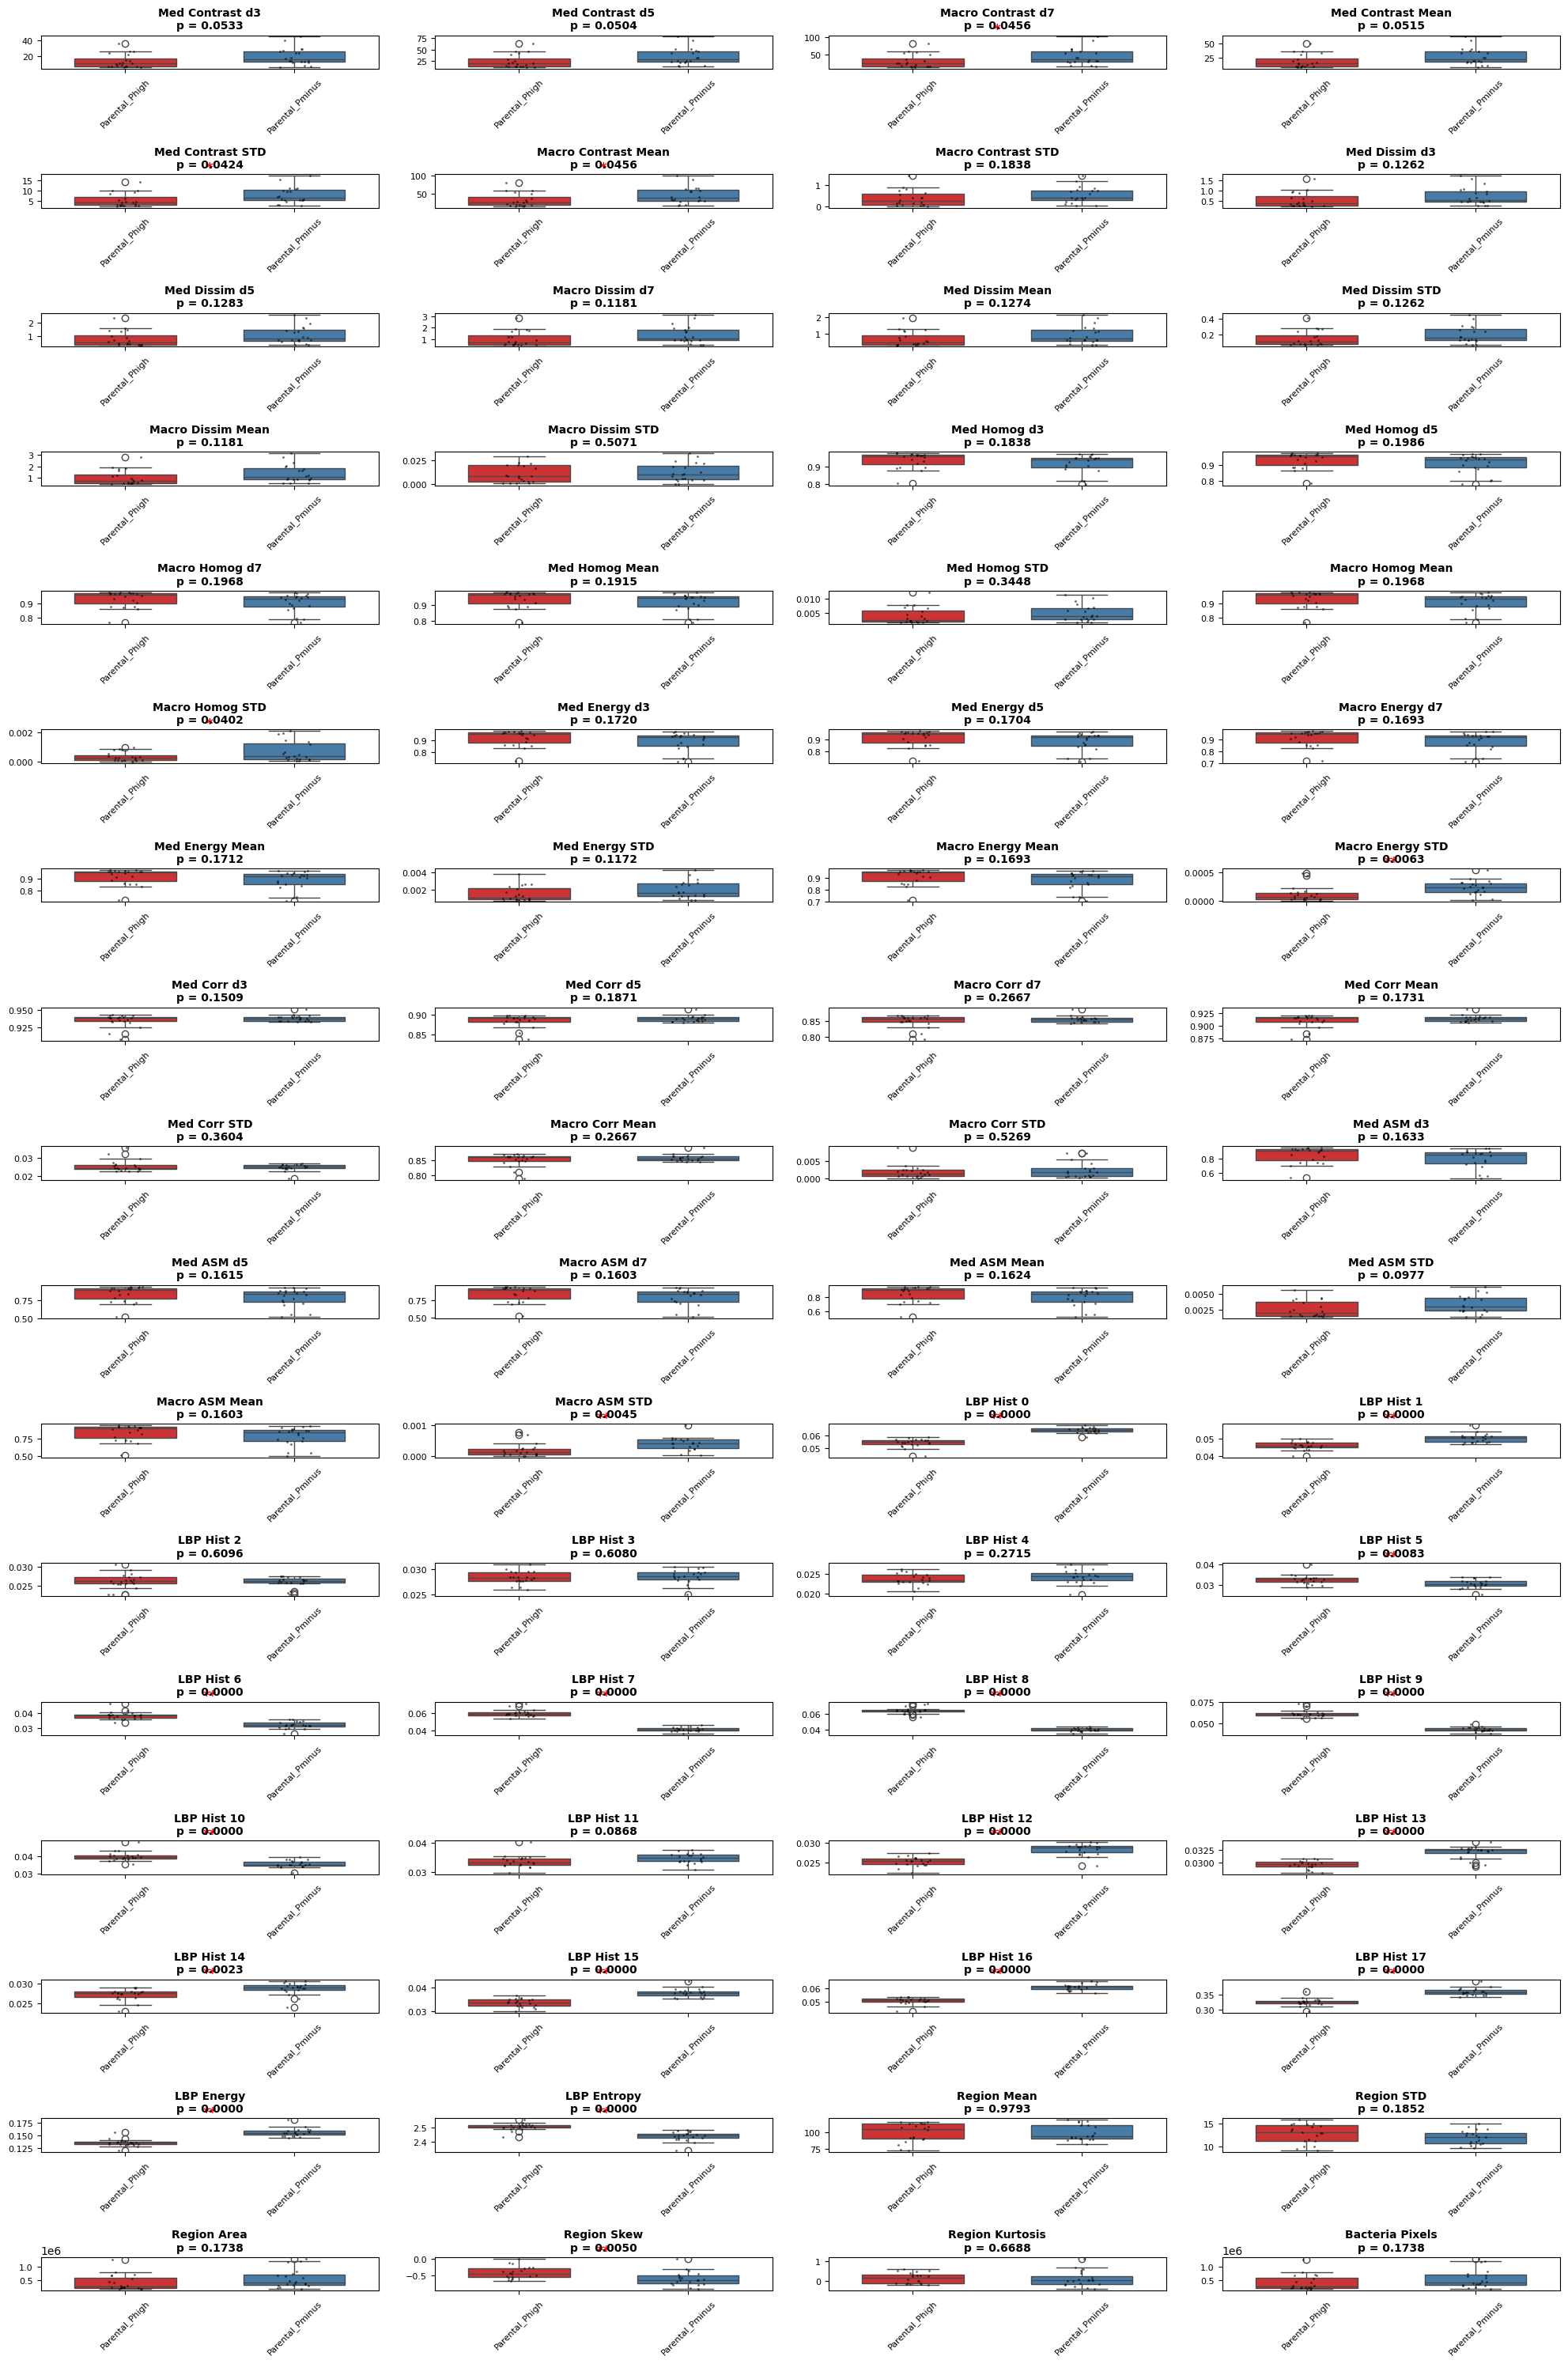


🎯 Creating focused plot for statistically significant features...
Plotting 19 significant features


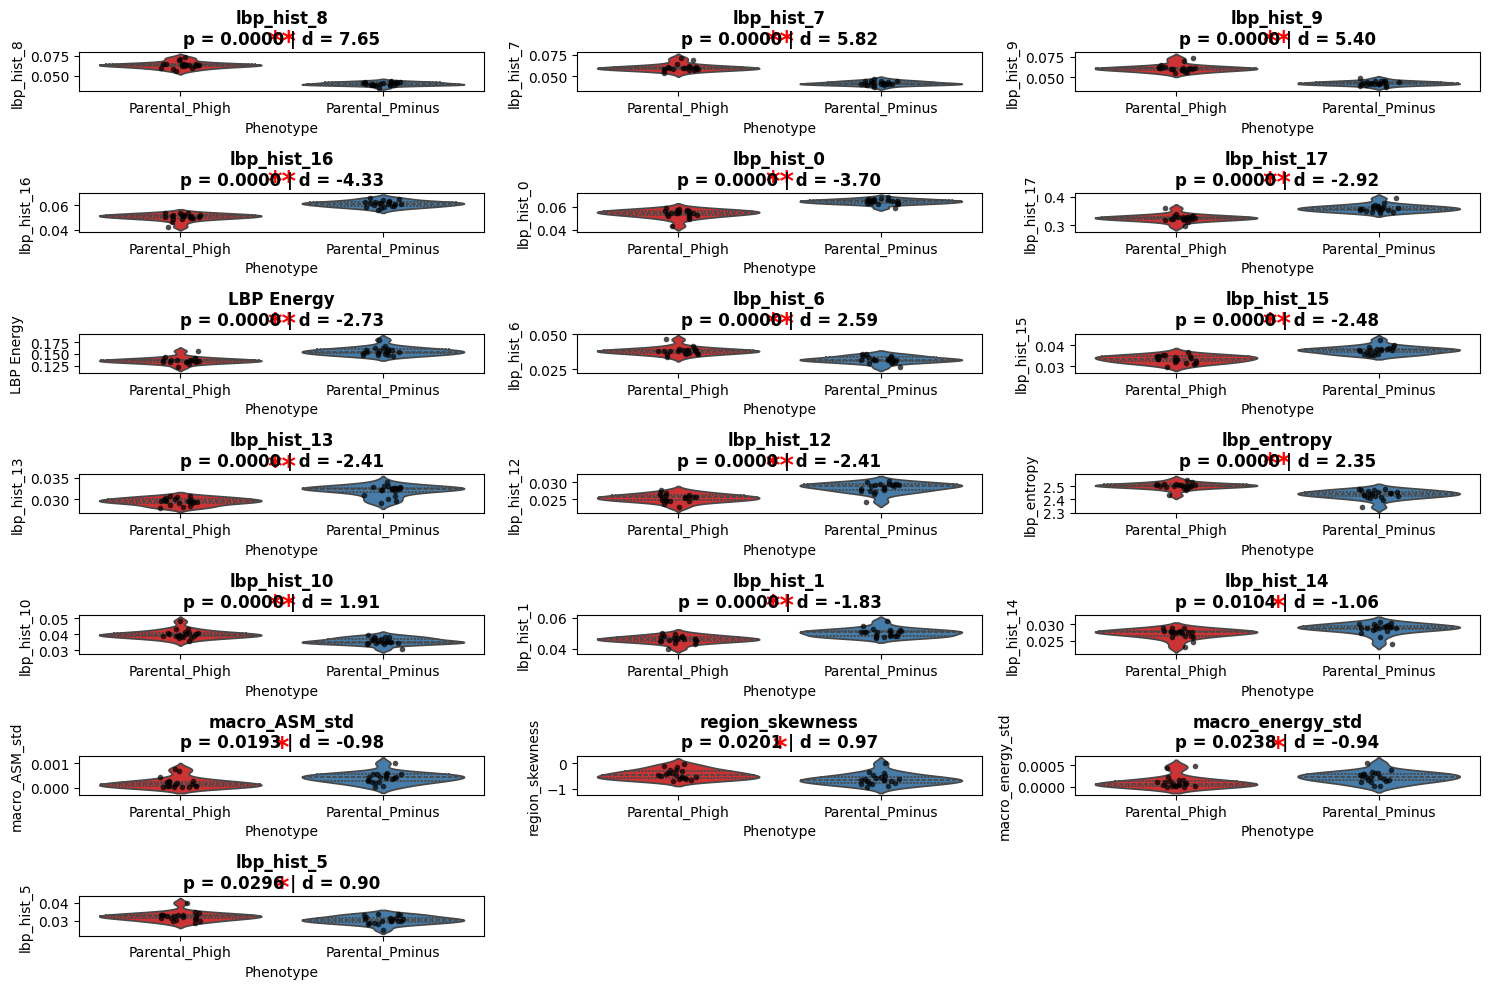


🔥 Creating heatmap of top significant features...


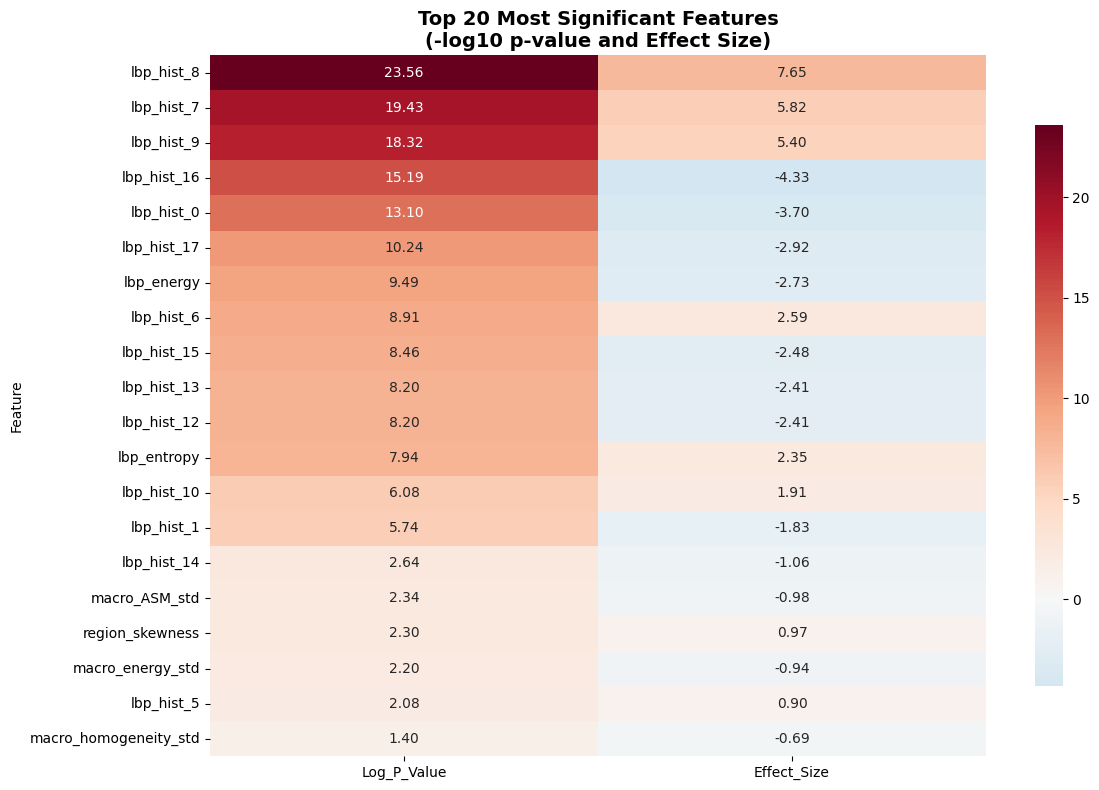


🔗 Creating correlation heatmap for 23 significant features...


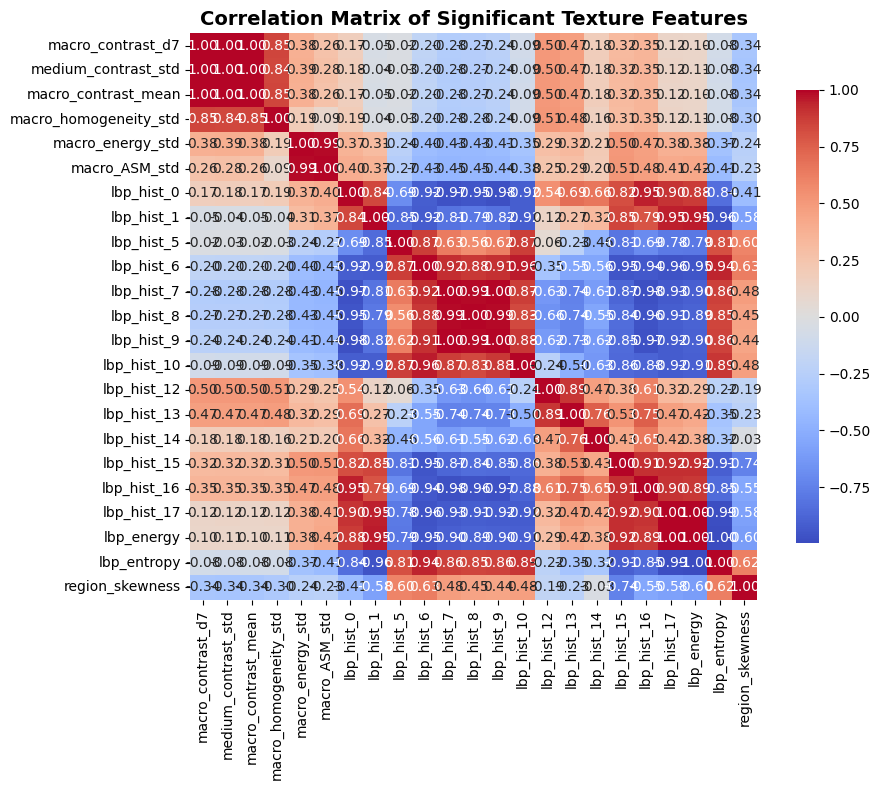


✅ All analyses completed!
📈 Analyzed 68 features
🎯 Found 19 FDR-significant features
💡 Use these results in your report to demonstrate texture differences between phenotypes.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

def analyze_phenotype_texture_profiles(dataframe):
    """
    Analyze texture profiles for Phigh vs Pminus phenotypes,
    including multiple testing correction.
    """
    # Filter to only labeled phenotypes
    labeled_df = dataframe[dataframe['folder'].isin(['Parental_Phigh', 'Parental_Pminus'])].copy()

    # All 67 texture features to analyze (excluding 'image' and 'folder')
    texture_features = [
        # Contrast features
        'medium_contrast_d3', 'medium_contrast_d5', 'macro_contrast_d7',
        'medium_contrast_mean', 'medium_contrast_std', 'macro_contrast_mean', 'macro_contrast_std',

        # Dissimilarity features
        'medium_dissimilarity_d3', 'medium_dissimilarity_d5', 'macro_dissimilarity_d7',
        'medium_dissimilarity_mean', 'medium_dissimilarity_std',
        'macro_dissimilarity_mean', 'macro_dissimilarity_std',

        # Homogeneity features
        'medium_homogeneity_d3', 'medium_homogeneity_d5', 'macro_homogeneity_d7',
        'medium_homogeneity_mean', 'medium_homogeneity_std',
        'macro_homogeneity_mean', 'macro_homogeneity_std',

        # Energy features
        'medium_energy_d3', 'medium_energy_d5', 'macro_energy_d7',
        'medium_energy_mean', 'medium_energy_std',
        'macro_energy_mean', 'macro_energy_std',

        # Correlation features
        'medium_correlation_d3', 'medium_correlation_d5', 'macro_correlation_d7',
        'medium_correlation_mean', 'medium_correlation_std',
        'macro_correlation_mean', 'macro_correlation_std',

        # ASM features
        'medium_ASM_d3', 'medium_ASM_d5', 'macro_ASM_d7',
        'medium_ASM_mean', 'medium_ASM_std',
        'macro_ASM_mean', 'macro_ASM_std',

        # LBP histogram features
        'lbp_hist_0', 'lbp_hist_1', 'lbp_hist_2', 'lbp_hist_3', 'lbp_hist_4',
        'lbp_hist_5', 'lbp_hist_6', 'lbp_hist_7', 'lbp_hist_8', 'lbp_hist_9',
        'lbp_hist_10', 'lbp_hist_11', 'lbp_hist_12', 'lbp_hist_13', 'lbp_hist_14',
        'lbp_hist_15', 'lbp_hist_16', 'lbp_hist_17',

        # LBP statistical features
        'lbp_energy', 'lbp_entropy',

        # Region features
        'region_mean_intensity', 'region_std_intensity', 'region_area',
        'region_skewness', 'region_kurtosis',

        # Additional features
        'bacteria_pixels'
    ]

    # Filter to available features
    available_features = [f for f in texture_features if f in labeled_df.columns]

    print("=== PHENOTYPE TEXTURE PROFILES ===")
    print(f"Parental_Phigh samples: {len(labeled_df[labeled_df['folder'] == 'Parental_Phigh'])}")
    print(f"Parental_Pminus samples: {len(labeled_df[labeled_df['folder'] == 'Parental_Pminus'])}")
    print(f"Total features analyzed: {len(available_features)}")

    # Calculate statistics for each phenotype
    results = {}
    p_values = []  # store for correction
    features_order = []  # to match p-values with features

    for feature in available_features:
        phigh_data = labeled_df[labeled_df['folder'] == 'Parental_Phigh'][feature].dropna()
        pminus_data = labeled_df[labeled_df['folder'] == 'Parental_Pminus'][feature].dropna()

        # Skip if not enough data
        if len(phigh_data) < 2 or len(pminus_data) < 2:
            print(f"Skipping {feature}: insufficient data (Phigh: {len(phigh_data)}, Pminus: {len(pminus_data)})")
            continue

        # Basic statistics
        phigh_stats = {
            'n': len(phigh_data),
            'mean': np.mean(phigh_data),
            'std': np.std(phigh_data),
            'min': np.min(phigh_data),
            'max': np.max(phigh_data)
        }

        pminus_stats = {
            'n': len(pminus_data),
            'mean': np.mean(pminus_data),
            'std': np.std(pminus_data),
            'min': np.min(pminus_data),
            'max': np.max(pminus_data)
        }

        # Statistical test
        t_stat, p_value = ttest_ind(phigh_data, pminus_data)

        # Effect size (Cohen's d)
        pooled_std = np.sqrt((phigh_stats['std']**2 + pminus_stats['std']**2) / 2)
        cohens_d = (phigh_stats['mean'] - pminus_stats['mean']) / pooled_std if pooled_std != 0 else 0

        results[feature] = {
            'phigh': phigh_stats,
            'pminus': pminus_stats,
            'p_value': p_value,
            'cohens_d': cohens_d
        }

        p_values.append(p_value)
        features_order.append(feature)

    # Multiple testing correction (Benjamini–Hochberg FDR)
    if p_values:
        reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

        # Add corrected p-values to results
        for feature, adj_p, sig_flag in zip(features_order, pvals_corrected, reject):
            results[feature]['p_value_adj'] = adj_p
            results[feature]['significant_fdr'] = sig_flag
    else:
        print("No features with sufficient data for analysis")
        return {}, [], labeled_df

    return results, available_features, labeled_df


def print_texture_profiles(results, features):
    """
    Print formatted texture profile results with adjusted p-values
    """
    print("\n" + "="*100)
    print("PHENOTYPE-SPECIFIC TEXTURE SIGNATURES (with FDR correction)")
    print("="*100)

    # Sort features by significance
    sorted_features = sorted(features, key=lambda x: results[x]['p_value'])

    for feature in sorted_features:
        data = results[feature]
        print(f"\n--- {feature} ---")
        print(f"Parental_Phigh (Cording): {data['phigh']['mean']:.4f} ± {data['phigh']['std']:.4f}")
        print(f"Parental_Pminus (Non-cording): {data['pminus']['mean']:.4f} ± {data['pminus']['std']:.4f}")
        print(f"Difference: {data['phigh']['mean'] - data['pminus']['mean']:.4f}")
        print(f"Raw p-value: {data['p_value']:.6f}")
        print(f"FDR-adjusted p-value: {data['p_value_adj']:.6f}")
        print(f"Effect size (Cohen's d): {data['cohens_d']:.4f}")

        if data['significant_fdr']:
            significance = "STATISTICALLY SIGNIFICANT (FDR-corrected)"
        else:
            significance = "not significant after correction"

        if abs(data['cohens_d']) > 0.8:
            effect = "LARGE effect"
        elif abs(data['cohens_d']) > 0.5:
            effect = "MEDIUM effect"
        else:
            effect = "SMALL effect"

        print(f"→ {significance} with {effect}")


def create_summary_table(results, features):
    """
    Create a DataFrame for easy copy-paste into report
    """
    summary_data = []

    # Sort by significance
    sorted_features = sorted(features, key=lambda x: results[x]['p_value'])

    for feature in sorted_features:
        data = results[feature]
        summary_data.append({
            'Feature': feature,
            'Phigh_Mean': f"{data['phigh']['mean']:.4f}",
            'Phigh_SD': f"{data['phigh']['std']:.4f}",
            'Pminus_Mean': f"{data['pminus']['mean']:.4f}",
            'Pminus_SD': f"{data['pminus']['std']:.4f}",
            'P_Value': f"{data['p_value']:.6f}",
            'P_Value_FDR': f"{data['p_value_adj']:.6f}",
            'Effect_Size': f"{data['cohens_d']:.4f}",
            'Significant_FDR': data['significant_fdr']
        })

    return pd.DataFrame(summary_data)


def create_texture_boxplots(labeled_df, results, features, figsize=(20, 30)):
    """
    Create box plots for texture feature comparisons - optimized for many features
    """
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("Set1")

    # Create figure with subplots - more columns for better space usage
    n_features = len(features)
    n_cols = 4  # Increased columns
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Feature names for display
    display_names = {
        # Contrast
        'medium_contrast_d3': 'Med Contrast d3', 'medium_contrast_d5': 'Med Contrast d5',
        'macro_contrast_d7': 'Macro Contrast d7', 'medium_contrast_mean': 'Med Contrast Mean',
        'medium_contrast_std': 'Med Contrast STD', 'macro_contrast_mean': 'Macro Contrast Mean',
        'macro_contrast_std': 'Macro Contrast STD',

        # Dissimilarity
        'medium_dissimilarity_d3': 'Med Dissim d3', 'medium_dissimilarity_d5': 'Med Dissim d5',
        'macro_dissimilarity_d7': 'Macro Dissim d7', 'medium_dissimilarity_mean': 'Med Dissim Mean',
        'medium_dissimilarity_std': 'Med Dissim STD', 'macro_dissimilarity_mean': 'Macro Dissim Mean',
        'macro_dissimilarity_std': 'Macro Dissim STD',

        # Homogeneity
        'medium_homogeneity_d3': 'Med Homog d3', 'medium_homogeneity_d5': 'Med Homog d5',
        'macro_homogeneity_d7': 'Macro Homog d7', 'medium_homogeneity_mean': 'Med Homog Mean',
        'medium_homogeneity_std': 'Med Homog STD', 'macro_homogeneity_mean': 'Macro Homog Mean',
        'macro_homogeneity_std': 'Macro Homog STD',

        # Energy
        'medium_energy_d3': 'Med Energy d3', 'medium_energy_d5': 'Med Energy d5',
        'macro_energy_d7': 'Macro Energy d7', 'medium_energy_mean': 'Med Energy Mean',
        'medium_energy_std': 'Med Energy STD', 'macro_energy_mean': 'Macro Energy Mean',
        'macro_energy_std': 'Macro Energy STD',

        # Correlation
        'medium_correlation_d3': 'Med Corr d3', 'medium_correlation_d5': 'Med Corr d5',
        'macro_correlation_d7': 'Macro Corr d7', 'medium_correlation_mean': 'Med Corr Mean',
        'medium_correlation_std': 'Med Corr STD', 'macro_correlation_mean': 'Macro Corr Mean',
        'macro_correlation_std': 'Macro Corr STD',

        # ASM
        'medium_ASM_d3': 'Med ASM d3', 'medium_ASM_d5': 'Med ASM d5',
        'macro_ASM_d7': 'Macro ASM d7', 'medium_ASM_mean': 'Med ASM Mean',
        'medium_ASM_std': 'Med ASM STD', 'macro_ASM_mean': 'Macro ASM Mean',
        'macro_ASM_std': 'Macro ASM STD',

        # LBP features
        'lbp_energy': 'LBP Energy', 'lbp_entropy': 'LBP Entropy',

        # Region features
        'region_mean_intensity': 'Region Mean', 'region_std_intensity': 'Region STD',
        'region_area': 'Region Area', 'region_skewness': 'Region Skew',
        'region_kurtosis': 'Region Kurtosis',

        # Additional
        'bacteria_pixels': 'Bacteria Pixels'
    }

    # Add LBP histogram features to display names
    for i in range(18):
        lbp_key = f'lbp_hist_{i}'
        display_names[lbp_key] = f'LBP Hist {i}'

    for i, feature in enumerate(features):
        if i < len(axes):
            try:
                # Create box plot
                sns.boxplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                          hue='folder', legend=False, width=0.6)

                # Add strip plot to show individual points
                sns.stripplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                             color='black', alpha=0.6, size=2, jitter=True)  # Smaller points

                # Customize the plot
                display_name = display_names.get(feature, feature[:20] + '...' if len(feature) > 20 else feature)
                title = f'{display_name}\np = {results[feature]["p_value"]:.4f}'
                axes[i].set_title(title, fontsize=10, fontweight='bold')
                axes[i].set_xlabel('')
                axes[i].set_ylabel('')

                # Rotate x-axis labels for better readability
                axes[i].tick_params(axis='x', rotation=45, labelsize=8)
                axes[i].tick_params(axis='y', labelsize=8)

                # Add significance asterisks
                y_max = labeled_df[feature].max()
                y_min = labeled_df[feature].min()
                y_range = y_max - y_min

                if results[feature]["p_value"] < 0.05:
                    # Add significance line and asterisks
                    asterisk = '**' if results[feature]["p_value"] < 0.01 else '*'
                    axes[i].text(0.5, y_max + 0.02 * y_range, asterisk,
                                ha='center', va='bottom', fontsize=12, fontweight='bold', color='red')
            except Exception as e:
                print(f"Error plotting {feature}: {e}")
                axes[i].set_visible(False)

    # Hide empty subplots
    for i in range(len(features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    return fig


def create_significant_features_plot(labeled_df, results, figsize=(15, 10)):
    """
    Create a focused plot for statistically significant features only
    """
    significant_features = [f for f in results.keys() if results[f]['p_value_adj'] < 0.05]

    if not significant_features:
        # Fall back to raw p-value significance if no FDR-significant features
        significant_features = [f for f in results.keys() if results[f]['p_value'] < 0.05]

    if not significant_features:
        print("No statistically significant features found.")
        return

    print(f"Plotting {len(significant_features)} significant features")

    # Sort by effect size for better visualization
    significant_features.sort(key=lambda x: abs(results[x]['cohens_d']), reverse=True)

    n_features = len(significant_features)
    n_cols = min(3, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    if n_features == 1:
        axes = [axes]
    elif n_rows > 1 and n_cols > 1:
        axes = axes.flatten()

    # Display names for significant features
    display_names = {
        'medium_contrast_mean': 'Medium Contrast',
        'macro_contrast_mean': 'Macro Contrast',
        'lbp_energy': 'LBP Energy',
        'region_std_intensity': 'Intensity STD',
        'bacteria_pixels': 'Bacterial Pixels'
    }

    for i, feature in enumerate(significant_features):
        if i < len(axes):
            # Create violin plot for better distribution visualization
            sns.violinplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                          hue='folder', legend=False, inner='quartile')

            # Add individual points
            sns.stripplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                         color='black', alpha=0.7, size=4, jitter=True)

            # Customize
            display_name = display_names.get(feature, feature)
            p_val = results[feature]['p_value_adj'] if 'p_value_adj' in results[feature] else results[feature]['p_value']
            axes[i].set_title(f'{display_name}\n'
                             f'p = {p_val:.4f} | d = {results[feature]["cohens_d"]:.2f}',
                             fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Phenotype', fontsize=10)
            axes[i].set_ylabel(display_name, fontsize=10)

            # Add significance annotation
            y_max = labeled_df[feature].max()
            y_min = labeled_df[feature].min()
            asterisk = '**' if p_val < 0.01 else '*'
            axes[i].text(0.5, y_max + 0.05 * (y_max - y_min), asterisk,
                        ha='center', va='bottom', fontsize=20, fontweight='bold', color='red')

    # Hide empty subplots
    for i in range(len(significant_features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    return fig


def create_top_features_heatmap(labeled_df, results, top_n=20):
    """
    Create a heatmap showing the top N most significant features
    """
    # Get top features by p-value
    all_features = list(results.keys())
    sorted_features = sorted(all_features, key=lambda x: results[x]['p_value'])[:top_n]

    if len(sorted_features) < 2:
        print("Not enough significant features for heatmap")
        return

    # Prepare data for heatmap
    heatmap_data = []
    for feature in sorted_features:
        row = {
            'Feature': feature,
            'P_Value': results[feature]['p_value'],
            'Effect_Size': results[feature]['cohens_d'],
            'Phigh_Mean': results[feature]['phigh']['mean'],
            'Pminus_Mean': results[feature]['pminus']['mean']
        }
        heatmap_data.append(row)

    heatmap_df = pd.DataFrame(heatmap_data)
    heatmap_df['Log_P_Value'] = -np.log10(heatmap_df['P_Value'])

    # Create the heatmap
    plt.figure(figsize=(12, 8))

    # Pivot for heatmap
    pivot_data = heatmap_df[['Feature', 'Log_P_Value', 'Effect_Size']].set_index('Feature')

    sns.heatmap(pivot_data, annot=True, cmap='RdBu_r', center=0,
                square=False, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title(f'Top {top_n} Most Significant Features\n(-log10 p-value and Effect Size)',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Load your data
file_path = '/content/multi_scale_texture_features_20251026_204753.csv'
results_df = pd.read_csv(file_path)

# Run the analysis
print("🔬 Starting comprehensive texture analysis with 67 features...")
results, features, labeled_df = analyze_phenotype_texture_profiles(results_df)

if results:
    print_texture_profiles(results, features)

    # Get the summary table
    summary_table = create_summary_table(results, features)
    print("\n" + "="*100)
    print("SUMMARY TABLE FOR REPORT")
    print("="*100)
    print(summary_table.to_string(index=False))

    # Save summary table to CSV
    summary_table.to_csv('texture_analysis_summary.csv', index=False)
    print("\n💾 Summary table saved to 'texture_analysis_summary.csv'")

    # Create visualizations
    print("\n" + "="*100)
    print("CREATING VISUALIZATIONS...")
    print("="*100)

    # 1. All features box plots (may be large)
    print(f"\n📊 Creating comprehensive box plots for {len(features)} features...")
    fig_all = create_texture_boxplots(labeled_df, results, features)

    # 2. Significant features only
    print("\n🎯 Creating focused plot for statistically significant features...")
    fig_sig = create_significant_features_plot(labeled_df, results)

    # 3. Top features heatmap
    print("\n🔥 Creating heatmap of top significant features...")
    create_top_features_heatmap(labeled_df, results, top_n=20)

    # 4. Correlation heatmap for significant features
    significant_features = [f for f in features if results[f]['p_value'] < 0.05]
    print(f"\n🔗 Creating correlation heatmap for {len(significant_features)} significant features...")
    if len(significant_features) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = labeled_df[significant_features].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                    square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix of Significant Texture Features', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    print("\n✅ All analyses completed!")
    print(f"📈 Analyzed {len(features)} features")
    print(f"🎯 Found {len([f for f in features if results[f]['significant_fdr']])} FDR-significant features")
    print("💡 Use these results in your report to demonstrate texture differences between phenotypes.")
else:
    print("❌ No results generated - check your data and feature names")

🔬 Starting comprehensive texture analysis with 67 features...
=== PHENOTYPE TEXTURE PROFILES ===
Parental_Phigh samples: 20
Parental_Pminus samples: 20
Total features analyzed: 68

PHENOTYPE-SPECIFIC TEXTURE SIGNATURES (with FDR correction)

--- lbp_hist_0 ---
Parental_Phigh (Cording): 0.0542 ± 0.0034
Parental_Pminus (Non-cording): 0.0647 ± 0.0020
Difference: -0.0104
Raw p-value: 0.000000
FDR-adjusted p-value: 0.000001
Effect size (Rank-biserial): -0.9950
→ STATISTICALLY SIGNIFICANT (FDR-corrected) with LARGE effect

--- lbp_hist_7 ---
Parental_Phigh (Cording): 0.0603 ± 0.0039
Parental_Pminus (Non-cording): 0.0417 ± 0.0023
Difference: 0.0186
Raw p-value: 0.000000
FDR-adjusted p-value: 0.000001
Effect size (Rank-biserial): 1.0000
→ STATISTICALLY SIGNIFICANT (FDR-corrected) with LARGE effect

--- lbp_hist_8 ---
Parental_Phigh (Cording): 0.0637 ± 0.0039
Parental_Pminus (Non-cording): 0.0400 ± 0.0020
Difference: 0.0236
Raw p-value: 0.000000
FDR-adjusted p-value: 0.000001
Effect size (Rank-

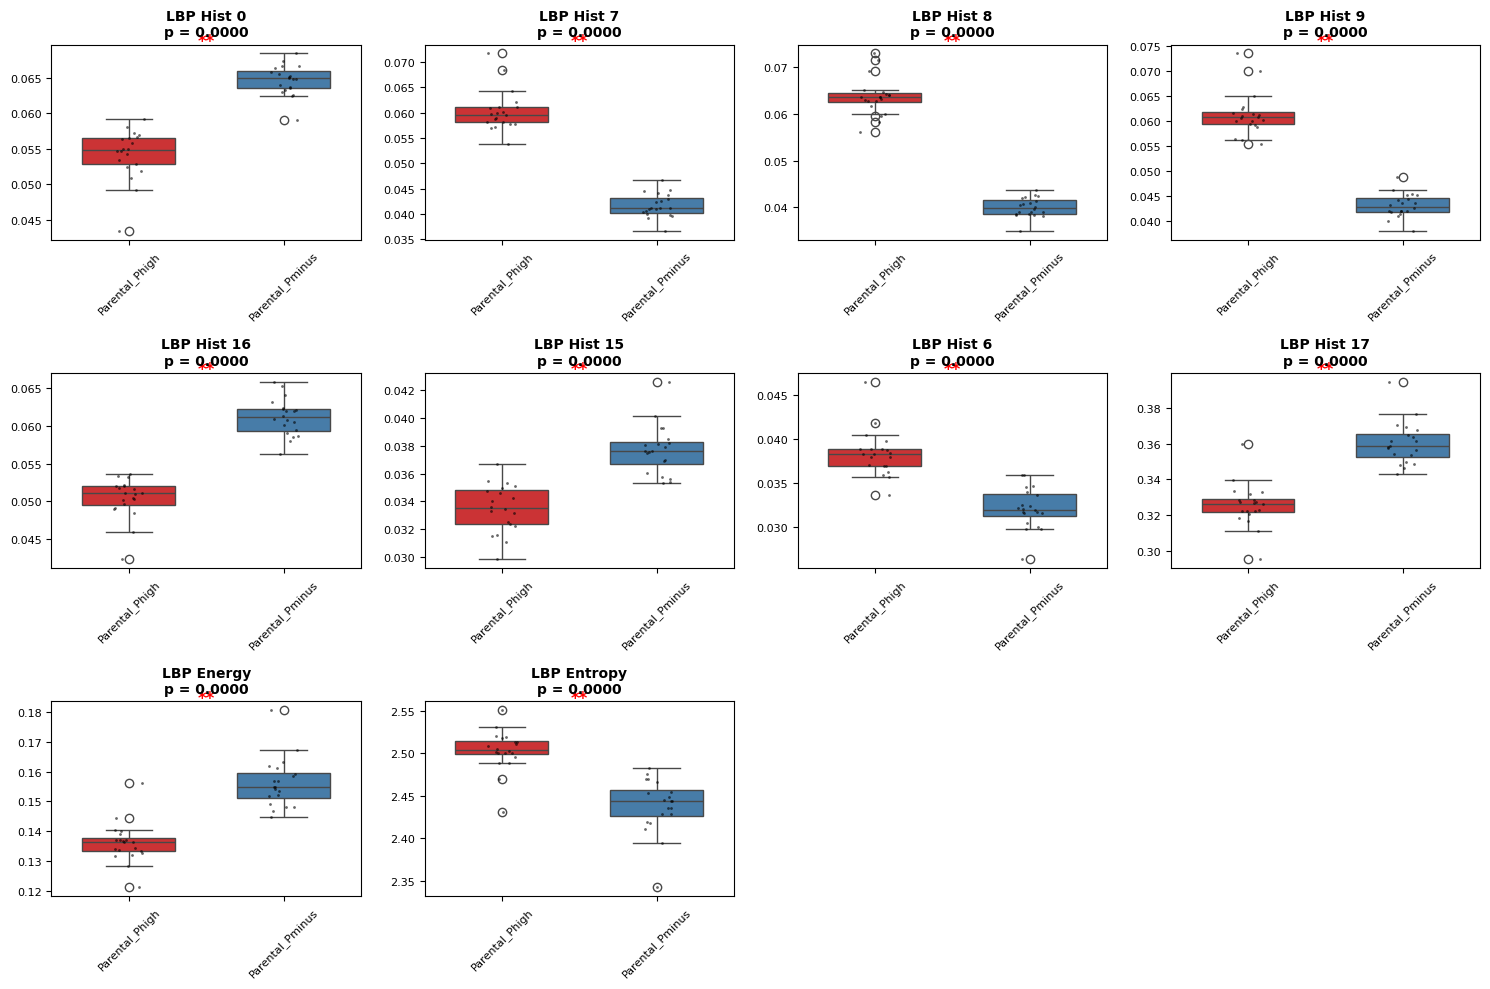


🎯 Creating focused plot for top significant features...
Plotting top 10 features


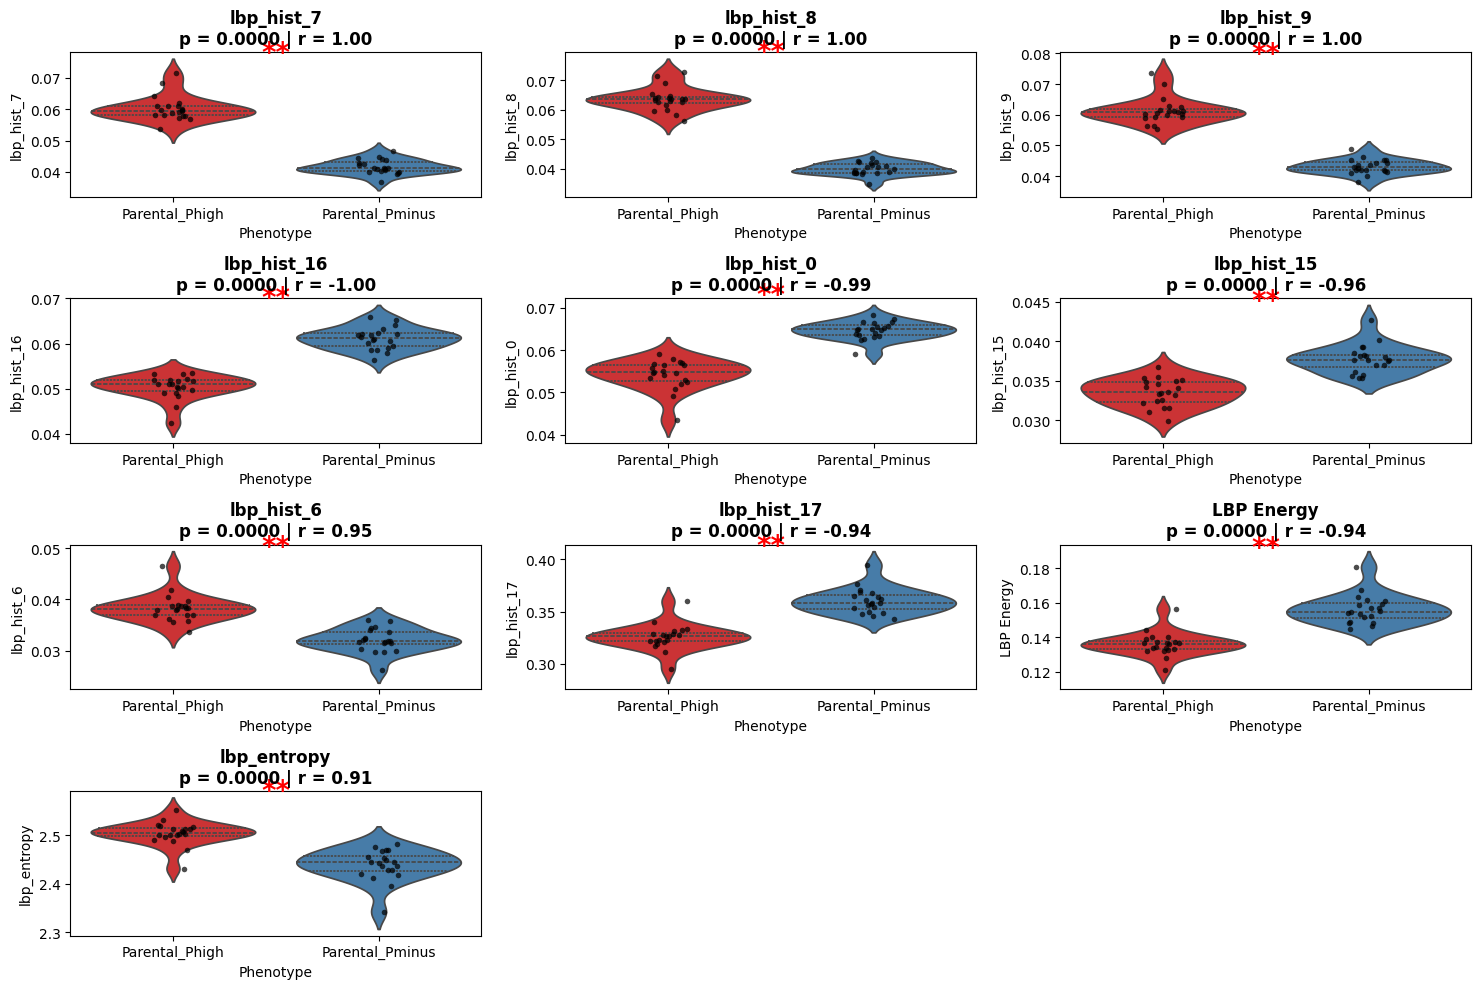


🔥 Creating heatmap of top significant features...


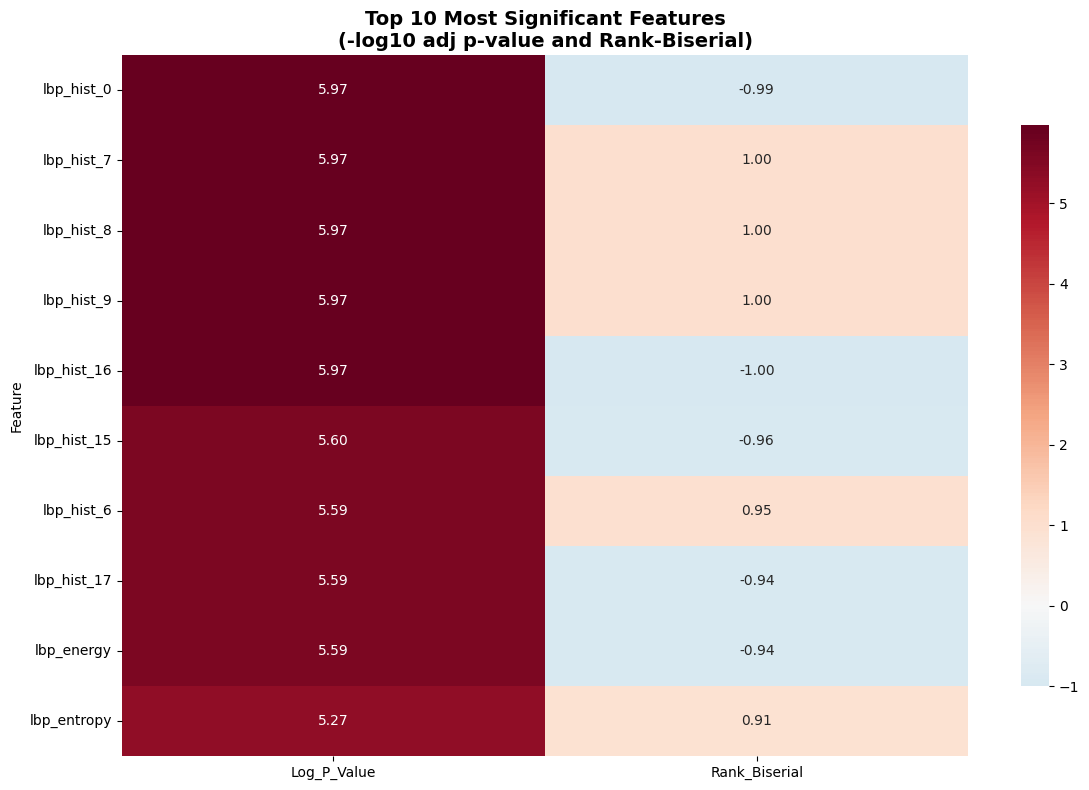


🔗 Creating correlation heatmap for 10 top features...


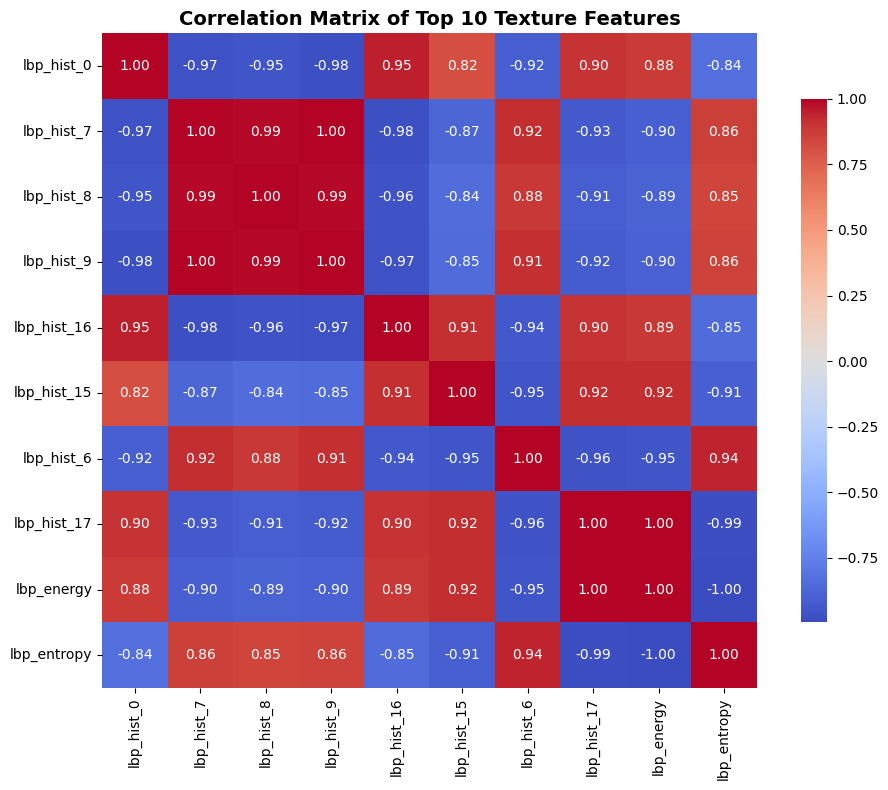


✅ All analyses completed!
📈 Analyzed 68 features
🎯 Found 24 FDR-significant features
💡 Use these results in your report to demonstrate texture differences between phenotypes.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, rankdata
from statsmodels.stats.multitest import multipletests

def analyze_phenotype_texture_profiles(dataframe):
    """
    Analyze texture profiles for Phigh vs Pminus phenotypes using Mann-Whitney U test,
    including multiple testing correction.
    """
    # Filter to only labeled phenotypes
    labeled_df = dataframe[dataframe['folder'].isin(['Parental_Phigh', 'Parental_Pminus'])].copy()

    # All 67 texture features to analyze (excluding 'image' and 'folder')
    texture_features = [
        # Contrast features
        'medium_contrast_d3', 'medium_contrast_d5', 'macro_contrast_d7',
        'medium_contrast_mean', 'medium_contrast_std', 'macro_contrast_mean', 'macro_contrast_std',

        # Dissimilarity features
        'medium_dissimilarity_d3', 'medium_dissimilarity_d5', 'macro_dissimilarity_d7',
        'medium_dissimilarity_mean', 'medium_dissimilarity_std',
        'macro_dissimilarity_mean', 'macro_dissimilarity_std',

        # Homogeneity features
        'medium_homogeneity_d3', 'medium_homogeneity_d5', 'macro_homogeneity_d7',
        'medium_homogeneity_mean', 'medium_homogeneity_std',
        'macro_homogeneity_mean', 'macro_homogeneity_std',

        # Energy features
        'medium_energy_d3', 'medium_energy_d5', 'macro_energy_d7',
        'medium_energy_mean', 'medium_energy_std',
        'macro_energy_mean', 'macro_energy_std',

        # Correlation features
        'medium_correlation_d3', 'medium_correlation_d5', 'macro_correlation_d7',
        'medium_correlation_mean', 'medium_correlation_std',
        'macro_correlation_mean', 'macro_correlation_std',

        # ASM features
        'medium_ASM_d3', 'medium_ASM_d5', 'macro_ASM_d7',
        'medium_ASM_mean', 'medium_ASM_std',
        'macro_ASM_mean', 'macro_ASM_std',

        # LBP histogram features
        'lbp_hist_0', 'lbp_hist_1', 'lbp_hist_2', 'lbp_hist_3', 'lbp_hist_4',
        'lbp_hist_5', 'lbp_hist_6', 'lbp_hist_7', 'lbp_hist_8', 'lbp_hist_9',
        'lbp_hist_10', 'lbp_hist_11', 'lbp_hist_12', 'lbp_hist_13', 'lbp_hist_14',
        'lbp_hist_15', 'lbp_hist_16', 'lbp_hist_17',

        # LBP statistical features
        'lbp_energy', 'lbp_entropy',

        # Region features
        'region_mean_intensity', 'region_std_intensity', 'region_area',
        'region_skewness', 'region_kurtosis',

        # Additional features
        'bacteria_pixels'
    ]

    # Filter to available features
    available_features = [f for f in texture_features if f in labeled_df.columns]

    print("=== PHENOTYPE TEXTURE PROFILES ===")
    print(f"Parental_Phigh samples: {len(labeled_df[labeled_df['folder'] == 'Parental_Phigh'])}")
    print(f"Parental_Pminus samples: {len(labeled_df[labeled_df['folder'] == 'Parental_Pminus'])}")
    print(f"Total features analyzed: {len(available_features)}")

    # Calculate statistics for each phenotype
    results = {}
    p_values = []  # store for correction
    features_order = []  # to match p-values with features

    for feature in available_features:
        phigh_data = labeled_df[labeled_df['folder'] == 'Parental_Phigh'][feature].dropna()
        pminus_data = labeled_df[labeled_df['folder'] == 'Parental_Pminus'][feature].dropna()

        # Skip if not enough data
        if len(phigh_data) < 2 or len(pminus_data) < 2:
            print(f"Skipping {feature}: insufficient data (Phigh: {len(phigh_data)}, Pminus: {len(pminus_data)})")
            continue

        # Basic statistics
        phigh_stats = {
            'n': len(phigh_data),
            'mean': np.mean(phigh_data),
            'std': np.std(phigh_data),
            'min': np.min(phigh_data),
            'max': np.max(phigh_data)
        }

        pminus_stats = {
            'n': len(pminus_data),
            'mean': np.mean(pminus_data),
            'std': np.std(pminus_data),
            'min': np.min(pminus_data),
            'max': np.max(pminus_data)
        }

        # Statistical test (Mann-Whitney U)
        u_stat, p_value = mannwhitneyu(phigh_data, pminus_data, alternative='two-sided')

        # Rank-biserial effect size
        combined = np.concatenate((phigh_data, pminus_data))
        if len(combined) > 0:
            ranks = rankdata(combined)
            mean_rank_phigh = np.mean(ranks[:phigh_stats['n']])
            mean_rank_pminus = np.mean(ranks[phigh_stats['n']:])
            rank_biserial = 2 * (mean_rank_phigh - mean_rank_pminus) / len(combined)
        else:
            rank_biserial = 0

        results[feature] = {
            'phigh': phigh_stats,
            'pminus': pminus_stats,
            'p_value': p_value,
            'rank_biserial': rank_biserial
        }

        p_values.append(p_value)
        features_order.append(feature)

    # Multiple testing correction (Benjamini–Hochberg FDR)
    if p_values:
        reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

        # Add corrected p-values to results
        for feature, adj_p, sig_flag in zip(features_order, pvals_corrected, reject):
            results[feature]['p_value_adj'] = adj_p
            results[feature]['significant_fdr'] = sig_flag
    else:
        print("No features with sufficient data for analysis")
        return {}, [], labeled_df

    return results, available_features, labeled_df


def print_texture_profiles(results, features):
    """
    Print formatted texture profile results with adjusted p-values
    """
    print("\n" + "="*100)
    print("PHENOTYPE-SPECIFIC TEXTURE SIGNATURES (with FDR correction)")
    print("="*100)

    # Sort features by adjusted significance
    sorted_features = sorted(features, key=lambda x: results[x]['p_value_adj'])

    for feature in sorted_features:
        data = results[feature]
        print(f"\n--- {feature} ---")
        print(f"Parental_Phigh (Cording): {data['phigh']['mean']:.4f} ± {data['phigh']['std']:.4f}")
        print(f"Parental_Pminus (Non-cording): {data['pminus']['mean']:.4f} ± {data['pminus']['std']:.4f}")
        print(f"Difference: {data['phigh']['mean'] - data['pminus']['mean']:.4f}")
        print(f"Raw p-value: {data['p_value']:.6f}")
        print(f"FDR-adjusted p-value: {data['p_value_adj']:.6f}")
        print(f"Effect size (Rank-biserial): {data['rank_biserial']:.4f}")

        if data['significant_fdr']:
            significance = "STATISTICALLY SIGNIFICANT (FDR-corrected)"
        else:
            significance = "not significant after correction"

        if abs(data['rank_biserial']) > 0.5:
            effect = "LARGE effect"
        elif abs(data['rank_biserial']) > 0.3:
            effect = "MEDIUM effect"
        else:
            effect = "SMALL effect"

        print(f"→ {significance} with {effect}")


def create_summary_table(results, features):
    """
    Create a DataFrame for easy copy-paste into report
    """
    summary_data = []

    # Sort by adjusted significance
    sorted_features = sorted(features, key=lambda x: results[x]['p_value_adj'])

    for feature in sorted_features:
        data = results[feature]
        summary_data.append({
            'Feature': feature,
            'Phigh_Mean': f"{data['phigh']['mean']:.4f}",
            'Phigh_SD': f"{data['phigh']['std']:.4f}",
            'Pminus_Mean': f"{data['pminus']['mean']:.4f}",
            'Pminus_SD': f"{data['pminus']['std']:.4f}",
            'P_Value': f"{data['p_value']:.6f}",
            'P_Value_FDR': f"{data['p_value_adj']:.6f}",
            'Rank_Biserial': f"{data['rank_biserial']:.4f}",
            'Significant_FDR': data['significant_fdr']
        })

    return pd.DataFrame(summary_data)


def create_texture_boxplots(labeled_df, results, features, figsize=(20, 30)):
    """
    Create box plots for texture feature comparisons - optimized for many features
    """
    # Set up the plotting style
    plt.style.use('default')
    sns.set_palette("Set1")

    # Create figure with subplots - more columns for better space usage
    n_features = len(features)
    n_cols = 4  # Increased columns
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    # Feature names for display
    display_names = {
        # Contrast
        'medium_contrast_d3': 'Med Contrast d3', 'medium_contrast_d5': 'Med Contrast d5',
        'macro_contrast_d7': 'Macro Contrast d7', 'medium_contrast_mean': 'Med Contrast Mean',
        'medium_contrast_std': 'Med Contrast STD', 'macro_contrast_mean': 'Macro Contrast Mean',
        'macro_contrast_std': 'Macro Contrast STD',

        # Dissimilarity
        'medium_dissimilarity_d3': 'Med Dissim d3', 'medium_dissimilarity_d5': 'Med Dissim d5',
        'macro_dissimilarity_d7': 'Macro Dissim d7', 'medium_dissimilarity_mean': 'Med Dissim Mean',
        'medium_dissimilarity_std': 'Med Dissim STD', 'macro_dissimilarity_mean': 'Macro Dissim Mean',
        'macro_dissimilarity_std': 'Macro Dissim STD',

        # Homogeneity
        'medium_homogeneity_d3': 'Med Homog d3', 'medium_homogeneity_d5': 'Med Homog d5',
        'macro_homogeneity_d7': 'Macro Homog d7', 'medium_homogeneity_mean': 'Med Homog Mean',
        'medium_homogeneity_std': 'Med Homog STD', 'macro_homogeneity_mean': 'Macro Homog Mean',
        'macro_homogeneity_std': 'Macro Homog STD',

        # Energy
        'medium_energy_d3': 'Med Energy d3', 'medium_energy_d5': 'Med Energy d5',
        'macro_energy_d7': 'Macro Energy d7', 'medium_energy_mean': 'Med Energy Mean',
        'medium_energy_std': 'Med Energy STD', 'macro_energy_mean': 'Macro Energy Mean',
        'macro_energy_std': 'Macro Energy STD',

        # Correlation
        'medium_correlation_d3': 'Med Corr d3', 'medium_correlation_d5': 'Med Corr d5',
        'macro_correlation_d7': 'Macro Corr d7', 'medium_correlation_mean': 'Med Corr Mean',
        'medium_correlation_std': 'Med Corr STD', 'macro_correlation_mean': 'Macro Corr Mean',
        'macro_correlation_std': 'Macro Corr STD',

        # ASM
        'medium_ASM_d3': 'Med ASM d3', 'medium_ASM_d5': 'Med ASM d5',
        'macro_ASM_d7': 'Macro ASM d7', 'medium_ASM_mean': 'Med ASM Mean',
        'medium_ASM_std': 'Med ASM STD', 'macro_ASM_mean': 'Macro ASM Mean',
        'macro_ASM_std': 'Macro ASM STD',

        # LBP features
        'lbp_energy': 'LBP Energy', 'lbp_entropy': 'LBP Entropy',

        # Region features
        'region_mean_intensity': 'Region Mean', 'region_std_intensity': 'Region STD',
        'region_area': 'Region Area', 'region_skewness': 'Region Skew',
        'region_kurtosis': 'Region Kurtosis',

        # Additional
        'bacteria_pixels': 'Bacteria Pixels'
    }

    # Add LBP histogram features to display names
    for i in range(18):
        lbp_key = f'lbp_hist_{i}'
        display_names[lbp_key] = f'LBP Hist {i}'

    for i, feature in enumerate(features):
        if i < len(axes):
            try:
                # Create box plot
                sns.boxplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                          hue='folder', legend=False, width=0.6)

                # Add strip plot to show individual points
                sns.stripplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                             color='black', alpha=0.6, size=2, jitter=True)  # Smaller points

                # Customize the plot
                display_name = display_names.get(feature, feature[:20] + '...' if len(feature) > 20 else feature)
                title = f'{display_name}\np = {results[feature]["p_value_adj"]:.4f}'
                axes[i].set_title(title, fontsize=10, fontweight='bold')
                axes[i].set_xlabel('')
                axes[i].set_ylabel('')

                # Rotate x-axis labels for better readability
                axes[i].tick_params(axis='x', rotation=45, labelsize=8)
                axes[i].tick_params(axis='y', labelsize=8)

                # Add significance asterisks
                y_max = labeled_df[feature].max()
                y_min = labeled_df[feature].min()
                y_range = y_max - y_min

                if results[feature]["p_value_adj"] < 0.05:
                    # Add significance line and asterisks
                    asterisk = '**' if results[feature]["p_value_adj"] < 0.01 else '*'
                    axes[i].text(0.5, y_max + 0.02 * y_range, asterisk,
                                ha='center', va='bottom', fontsize=12, fontweight='bold', color='red')
            except Exception as e:
                print(f"Error plotting {feature}: {e}")
                axes[i].set_visible(False)

    # Hide empty subplots
    for i in range(len(features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    return fig


def create_significant_features_plot(labeled_df, results, figsize=(15, 10)):
    """
    Create a focused plot for top 10 features by adjusted p-value
    """
    top_features = sorted(results.keys(), key=lambda x: results[x]['p_value_adj'])[:10]

    if not top_features:
        print("No features found.")
        return

    print(f"Plotting top {len(top_features)} features")

    # Sort by absolute rank-biserial for better visualization
    top_features.sort(key=lambda x: abs(results[x]['rank_biserial']), reverse=True)

    n_features = len(top_features)
    n_cols = min(3, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    if n_features == 1:
        axes = [axes]
    elif n_rows > 1 and n_cols > 1:
        axes = axes.flatten()

    # Display names for features
    display_names = {
        'medium_contrast_mean': 'Medium Contrast',
        'macro_contrast_mean': 'Macro Contrast',
        'lbp_energy': 'LBP Energy',
        'region_std_intensity': 'Intensity STD',
        'bacteria_pixels': 'Bacterial Pixels'
    }

    for i, feature in enumerate(top_features):
        if i < len(axes):
            # Create violin plot for better distribution visualization
            sns.violinplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                          hue='folder', legend=False, inner='quartile')

            # Add individual points
            sns.stripplot(data=labeled_df, x='folder', y=feature, ax=axes[i],
                         color='black', alpha=0.7, size=4, jitter=True)

            # Customize
            display_name = display_names.get(feature, feature)
            p_val = results[feature]['p_value_adj']
            axes[i].set_title(f'{display_name}\n'
                             f'p = {p_val:.4f} | r = {results[feature]["rank_biserial"]:.2f}',
                             fontsize=12, fontweight='bold')
            axes[i].set_xlabel('Phenotype', fontsize=10)
            axes[i].set_ylabel(display_name, fontsize=10)

            # Add significance annotation
            y_max = labeled_df[feature].max()
            y_min = labeled_df[feature].min()
            asterisk = '**' if p_val < 0.01 else '*'
            axes[i].text(0.5, y_max + 0.05 * (y_max - y_min), asterisk,
                        ha='center', va='bottom', fontsize=20, fontweight='bold', color='red')

    # Hide empty subplots
    for i in range(len(top_features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    return fig


def create_top_features_heatmap(labeled_df, results, top_n=20):
    """
    Create a heatmap showing the top N most significant features
    """
    # Get top features by adjusted p-value
    all_features = list(results.keys())
    sorted_features = sorted(all_features, key=lambda x: results[x]['p_value_adj'])[:top_n]

    if len(sorted_features) < 2:
        print("Not enough features for heatmap")
        return

    # Prepare data for heatmap
    heatmap_data = []
    for feature in sorted_features:
        row = {
            'Feature': feature,
            'P_Value': results[feature]['p_value_adj'],
            'Rank_Biserial': results[feature]['rank_biserial'],
            'Phigh_Mean': results[feature]['phigh']['mean'],
            'Pminus_Mean': results[feature]['pminus']['mean']
        }
        heatmap_data.append(row)

    heatmap_df = pd.DataFrame(heatmap_data)
    heatmap_df['Log_P_Value'] = -np.log10(heatmap_df['P_Value'])

    # Create the heatmap
    plt.figure(figsize=(12, 8))

    # Pivot for heatmap
    pivot_data = heatmap_df[['Feature', 'Log_P_Value', 'Rank_Biserial']].set_index('Feature')

    sns.heatmap(pivot_data, annot=True, cmap='RdBu_r', center=0,
                square=False, fmt='.2f', cbar_kws={'shrink': 0.8})
    plt.title(f'Top {top_n} Most Significant Features\n(-log10 adj p-value and Rank-Biserial)',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Load your data
file_path = '/content/multi_scale_texture_features_20251026_204753.csv'
results_df = pd.read_csv(file_path)

# Run the analysis
print("🔬 Starting comprehensive texture analysis with 67 features...")
results, features, labeled_df = analyze_phenotype_texture_profiles(results_df)

if results:
    # Get top 10 significant features by adjusted p-value
    top_10 = sorted(features, key=lambda x: results[x]['p_value_adj'])[:10]

    print_texture_profiles(results, features)

    # Get the summary table
    summary_table = create_summary_table(results, features)
    print("\n" + "="*100)
    print("SUMMARY TABLE FOR REPORT")
    print("="*100)
    print(summary_table.to_string(index=False))

    # Save summary table to CSV
    summary_table.to_csv('texture_analysis_summary.csv', index=False)
    print("\n💾 Summary table saved to 'texture_analysis_summary.csv'")

    # Create visualizations
    print("\n" + "="*100)
    print("CREATING VISUALIZATIONS...")
    print("="*100)

    # 1. Box plots for top 10 features
    print(f"\n📊 Creating box plots for top {len(top_10)} features...")
    fig_top = create_texture_boxplots(labeled_df, results, top_10, figsize=(15, 10))

    # 2. Focused plot for top 10 features
    print("\n🎯 Creating focused plot for top significant features...")
    fig_sig = create_significant_features_plot(labeled_df, results)

    # 3. Top features heatmap
    print("\n🔥 Creating heatmap of top significant features...")
    create_top_features_heatmap(labeled_df, results, top_n=10)

    # 4. Correlation heatmap for top 10 features
    print(f"\n🔗 Creating correlation heatmap for {len(top_10)} top features...")
    if len(top_10) > 1:
        plt.figure(figsize=(10, 8))
        correlation_matrix = labeled_df[top_10].corr()
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                    square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix of Top 10 Texture Features', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

    print("\n✅ All analyses completed!")
    print(f"📈 Analyzed {len(features)} features")
    print(f"🎯 Found {len([f for f in features if results[f]['significant_fdr']])} FDR-significant features")
    print("💡 Use these results in your report to demonstrate texture differences between phenotypes.")
else:
    print("❌ No results generated - check your data and feature names")

✅ 24 FDR-significant features retained for plotting


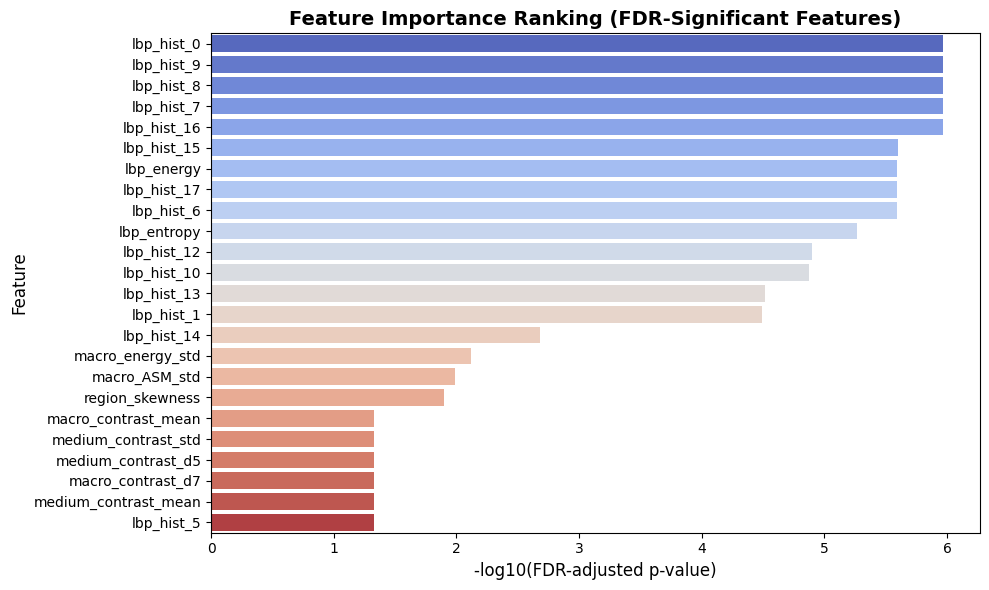

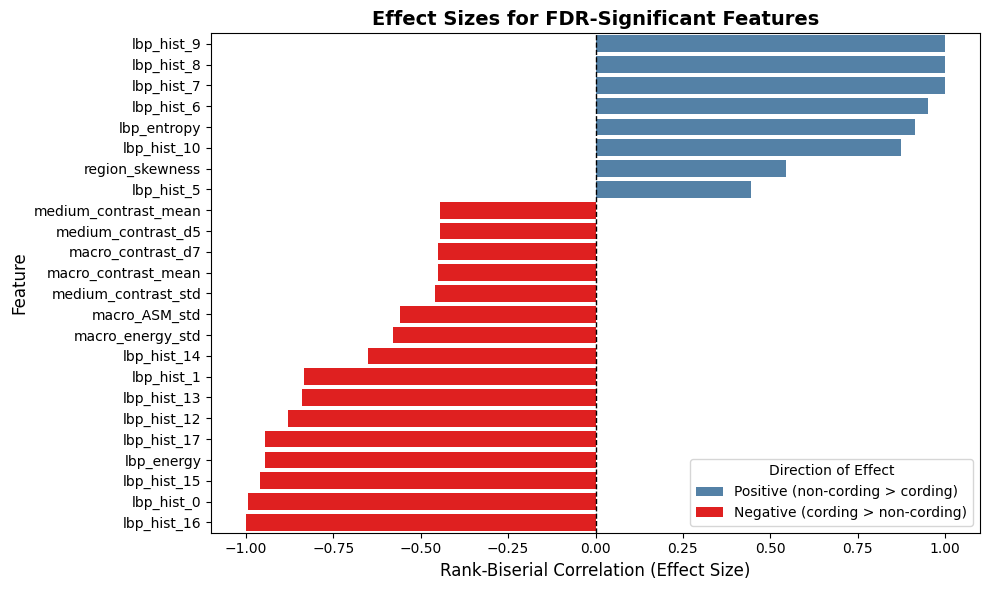

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_significant_feature_importance(results, fdr_threshold=0.05):
    """
    Plot significant features ranked by importance (-log10 FDR p-value)
    and their rank-biserial correlations (direction & magnitude).
    """
    # Extract results into DataFrame
    df = pd.DataFrame([
        {
            'Feature': f,
            'P_Value_FDR': results[f]['p_value_adj'],
            'Rank_Biserial': results[f]['rank_biserial']
        }
        for f in results.keys()
        if results[f]['significant_fdr'] and results[f]['p_value_adj'] < fdr_threshold
    ])

    if df.empty:
        print("⚠️ No FDR-significant features found.")
        return

    # Compute -log10(FDR) as importance metric
    df['Importance'] = -np.log10(df['P_Value_FDR'])
    df['Effect_Magnitude'] = np.abs(df['Rank_Biserial'])
    df = df.sort_values(by='Importance', ascending=False)

    print(f"✅ {len(df)} FDR-significant features retained for plotting")

    # =========================
    # 1️⃣ Feature Importance Plot
    # =========================
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        y='Feature',
        x='Importance',
        hue='Feature',  # fixes the deprecation warning
        dodge=False,
        legend=False,
        palette='coolwarm'
    )
    plt.xlabel('-log10(FDR-adjusted p-value)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Feature Importance Ranking (FDR-Significant Features)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # =========================
    # 2️⃣ Rank-Biserial Effect Sizes
    # =========================
    df = df.sort_values(by='Rank_Biserial', ascending=False)
    df['Sign'] = df['Rank_Biserial'].apply(lambda x: 'Positive (non-cording > cording)' if x > 0 else 'Negative (cording > non-cording)')

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=df,
        y='Feature',
        x='Rank_Biserial',
        hue='Sign',
        dodge=False,
        palette={'Positive (non-cording > cording)': 'steelblue', 'Negative (cording > non-cording)': 'red'}
    )
    plt.axvline(0, color='black', linestyle='--', lw=1)
    plt.xlabel('Rank-Biserial Correlation (Effect Size)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Effect Sizes for FDR-Significant Features', fontsize=14, fontweight='bold')
    plt.legend(title='Direction of Effect', loc='lower right')
    plt.tight_layout()
    plt.show()

    return df

# Run the plotting function
significant_features_df = plot_significant_feature_importance(results)


In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy

def create_cluster_correlation_map(labeled_df, results, significant_features=None, save_dir="cluster_maps"):
    """
    Create and save a clustered correlation heatmap for significant features.
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    if significant_features is None:
        significant_features = [f for f in results.keys() if results[f]['significant_fdr']]

    print(f"Creating cluster correlation map for {len(significant_features)} significant features...")

    feature_data = labeled_df[significant_features].copy()
    corr_matrix = feature_data.corr(method='spearman')
    linkage = hierarchy.linkage(corr_matrix, method='ward')

    g = sns.clustermap(
        corr_matrix,
        method='ward',
        cmap='RdBu_r',
        center=0,
        annot=True,
        fmt='.2f',
        annot_kws={'size': 9},
        linewidths=0.5,
        linecolor='lightgray',
        figsize=(16, 14),
        vmin=-1, vmax=1,
        dendrogram_ratio=0.1,
        cbar_pos=(0.02, 0.85, 0.03, 0.1)
    )

    g.ax_heatmap.set_title(
        'Clustered Correlation Map of Significant Texture Features\n(Spearman Correlation)',
        fontsize=16, fontweight='bold', pad=20
    )

    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=10)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=10)

    plt.tight_layout()

    # ✅ Save the clustered heatmap as PNG
    save_path = os.path.join(save_dir, "clustered_correlation_map.png")
    g.savefig(save_path, dpi=300)
    print(f"💾 Saved clustered correlation map to {save_path}")

    plt.close('all')
    return g, corr_matrix, linkage


def create_feature_group_cluster_map(labeled_df, results, save_dir="cluster_maps"):
    """
    Create and save a clustered correlation map grouped by feature type.
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    significant_features = [f for f in results.keys() if results[f]['significant_fdr']]

    feature_groups = {
        'LBP_Histograms': [f for f in significant_features if f.startswith('lbp_hist')],
        'LBP_Stats': [f for f in significant_features if f in ['lbp_energy', 'lbp_entropy']],
        'Contrast': [f for f in significant_features if 'contrast' in f],
        'Energy_ASM': [f for f in significant_features if any(x in f for x in ['energy', 'ASM'])],
        'Region_Stats': [f for f in significant_features if f.startswith('region_')]
    }

    grouped_features = [f for group in feature_groups.values() for f in group]
    print(f"Creating grouped cluster map with {len(grouped_features)} features...")

    feature_data = labeled_df[grouped_features].copy()
    corr_matrix = feature_data.corr(method='spearman')

    g = sns.clustermap(
        corr_matrix,
        method='ward',
        cmap='RdBu_r',
        center=0,
        annot=True,
        fmt='.2f',
        annot_kws={'size': 8},
        linewidths=0.5,
        linecolor='lightgray',
        figsize=(18, 16),
        vmin=-1, vmax=1,
        dendrogram_ratio=0.15
    )

    g.ax_heatmap.set_title(
        'Clustered Correlation Map - Significant Features (Grouped by Type)\n(Spearman Correlation)',
        fontsize=16, fontweight='bold', pad=25
    )

    plt.setp(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=9)
    plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=9)

    plt.tight_layout()

    # ✅ Save the figure
    save_path = os.path.join(save_dir, "grouped_cluster_correlation_map.png")
    g.savefig(save_path, dpi=300)
    print(f"💾 Saved grouped correlation map to {save_path}")

    plt.close('all')
    return g, corr_matrix


def create_phenotype_specific_cluster_maps(labeled_df, results, save_dir="cluster_maps"):
    """
    Create and save separate cluster maps for each phenotype.
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    significant_features = [f for f in results.keys() if results[f]['significant_fdr']]

    phigh_data = labeled_df[labeled_df['folder'] == 'Parental_Phigh'][significant_features]
    pminus_data = labeled_df[labeled_df['folder'] == 'Parental_Pminus'][significant_features]

    corr_phigh = phigh_data.corr(method='spearman')
    corr_pminus = pminus_data.corr(method='spearman')

    # 🔹 Phigh
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_phigh, cmap='RdBu_r', center=0, annot=True, fmt='.2f', square=True)
    plt.title('Parental_Phigh (Cording)\nFeature Correlations', fontsize=14, fontweight='bold')
    plt.tight_layout()
    save_path_phigh = os.path.join(save_dir, "correlation_phigh.png")
    plt.savefig(save_path_phigh, dpi=300)
    print(f"💾 Saved Phigh correlation map to {save_path_phigh}")
    plt.close()

    # 🔹 Pminus
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_pminus, cmap='RdBu_r', center=0, annot=True, fmt='.2f', square=True)
    plt.title('Parental_Pminus (Non-cording)\nFeature Correlations', fontsize=14, fontweight='bold')
    plt.tight_layout()
    save_path_pminus = os.path.join(save_dir, "correlation_pminus.png")
    plt.savefig(save_path_pminus, dpi=300)
    print(f"💾 Saved Pminus correlation map to {save_path_pminus}")
    plt.close()

    # 🔹 Difference map
    corr_diff = corr_phigh - corr_pminus
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_diff, cmap='RdBu_r', center=0, annot=True, fmt='.2f', square=True)
    plt.title('Difference in Feature Correlations\n(Phigh - Pminus)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    save_path_diff = os.path.join(save_dir, "correlation_difference.png")
    plt.savefig(save_path_diff, dpi=300)
    print(f"💾 Saved correlation difference map to {save_path_diff}")
    plt.close()

    return corr_phigh, corr_pminus, corr_diff


# Run the cluster correlation analysis
print("🔗 Creating cluster correlation maps for significant features...")

# 1. Basic clustered correlation map
cluster_map, corr_matrix, linkage = create_cluster_correlation_map(labeled_df, results)

# 2. Grouped cluster map
grouped_map, grouped_corr = create_feature_group_cluster_map(labeled_df, results)

# 3. Phenotype-specific cluster maps (optional - uncomment if you want to see these)
print("\n📊 Creating phenotype-specific correlation comparisons...")
corr_phigh, corr_pminus, corr_diff = create_phenotype_specific_cluster_maps(labeled_df, results)

# Additional analysis: Feature correlation patterns
print("\n📈 Analyzing correlation patterns...")

# Identify strong correlations (absolute value > 0.7)
strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            strong_correlations.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_val
            })

if strong_correlations:
    strong_corr_df = pd.DataFrame(strong_correlations)
    print(f"\n🔗 Found {len(strong_correlations)} strong correlations (|r| > 0.7):")
    print(strong_corr_df.sort_values('Correlation', key=abs, ascending=False).to_string(index=False))
else:
    print("\n📊 No very strong correlations (|r| > 0.7) found among significant features.")

# Save correlation matrix to CSV for further analysis
corr_matrix.to_csv('significant_features_correlation_matrix.csv')
print("\n💾 Correlation matrix saved to 'significant_features_correlation_matrix.csv'")

print("\n✅ Cluster correlation analysis completed!")

🔗 Creating cluster correlation maps for significant features...
Creating cluster correlation map for 24 significant features...
💾 Saved clustered correlation map to cluster_maps/clustered_correlation_map.png
Creating grouped cluster map with 25 features...
💾 Saved grouped correlation map to cluster_maps/grouped_cluster_correlation_map.png

📊 Creating phenotype-specific correlation comparisons...
💾 Saved Phigh correlation map to cluster_maps/correlation_phigh.png
💾 Saved Pminus correlation map to cluster_maps/correlation_pminus.png
💾 Saved correlation difference map to cluster_maps/correlation_difference.png

📈 Analyzing correlation patterns...

🔗 Found 87 strong correlations (|r| > 0.7):
           Feature_1            Feature_2  Correlation
  medium_contrast_d5 medium_contrast_mean     1.000000
   macro_contrast_d7  macro_contrast_mean     1.000000
  medium_contrast_d5    macro_contrast_d7     0.999437
   macro_contrast_d7 medium_contrast_mean     0.999437
  medium_contrast_d5  macro_

## Detour


🔬 Running texture analysis to get significant features...
=== PHENOTYPE TEXTURE PROFILES ===
Parental_Phigh samples: 20
Parental_Pminus samples: 20
Total features analyzed: 68
🎯 Using these 17 significant features:
 1. lbp_hist_0                p_adj=0.000001 effect=-0.995
 2. lbp_hist_7                p_adj=0.000001 effect=1.000
 3. lbp_hist_8                p_adj=0.000001 effect=1.000
 4. lbp_hist_9                p_adj=0.000001 effect=1.000
 5. lbp_hist_16               p_adj=0.000001 effect=-1.000
 6. lbp_hist_15               p_adj=0.000003 effect=-0.960
 7. lbp_hist_6                p_adj=0.000003 effect=0.950
 8. lbp_hist_17               p_adj=0.000003 effect=-0.945
 9. lbp_energy                p_adj=0.000003 effect=-0.945
10. lbp_entropy               p_adj=0.000005 effect=0.915
11. lbp_hist_12               p_adj=0.000013 effect=-0.880
12. lbp_hist_10               p_adj=0.000013 effect=0.875
13. lbp_hist_13               p_adj=0.000031 effect=-0.840
14. lbp_hist_1          

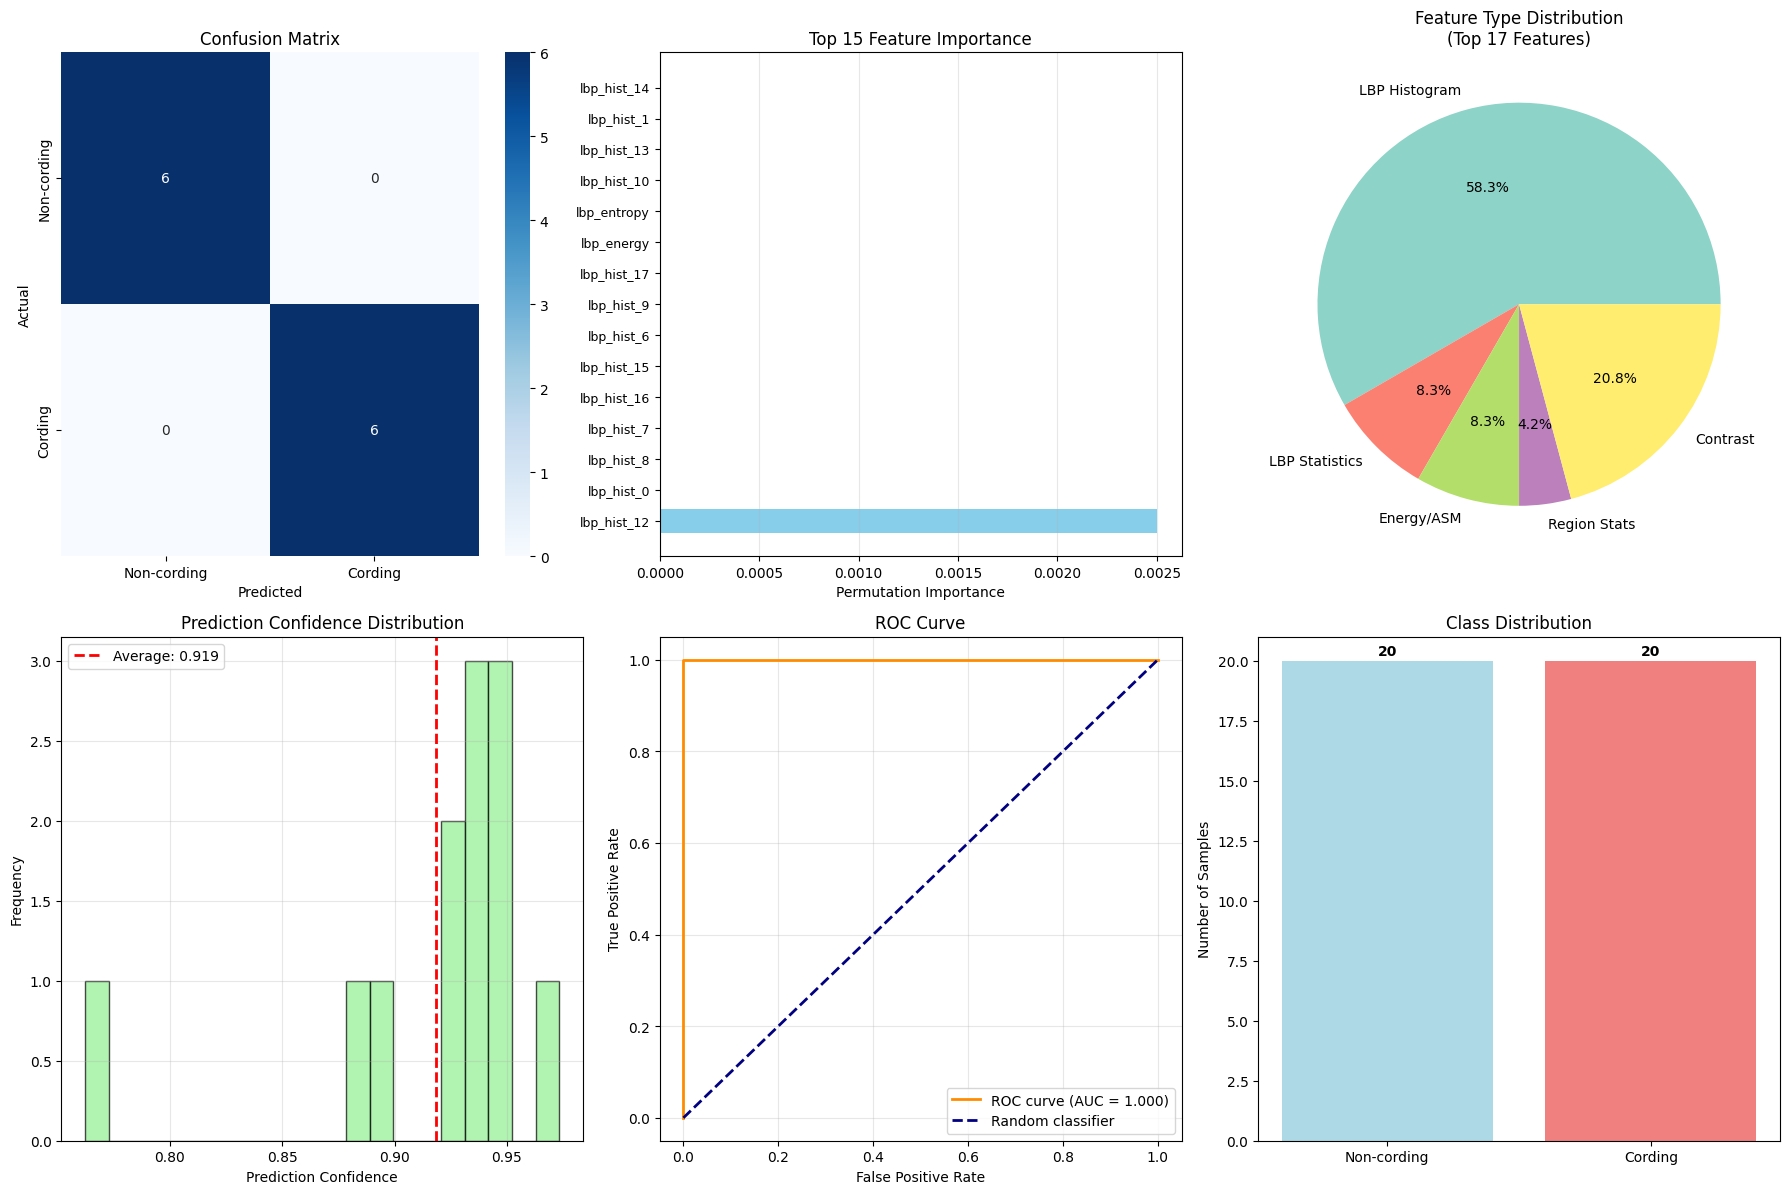


💾 Model saved as 'svm_top17_classifier.pkl'

🔮 PREDICTING ON ALL AVAILABLE SAMPLES...

🔮 PREDICTING ON UNSEEN DATA...
📊 Available features in unseen data: 24/24
💾 All predictions saved to 'all_samples_top17_predictions.csv'

📊 PREDICTION SUMMARY
predicted_phenotype
Phigh     80
Pminus    95

🎯 Confidence Statistics:
Average confidence: 0.902
High confidence predictions (>0.8): 156/175
Confidence distribution:
confidence_category
Low        10
Medium     46
High      119
Name: count, dtype: int64

📁 Breakdown by folder:
predicted_phenotype  Phigh  Pminus
folder                            
Ci-A04-1                 0       9
Ci-A04-2                 9       0
Ci-A04-3                 1       8
Ci-A04-5                 1       8
Ci-E06-1                 1       8
Ci-E06-2                 9       0
Ci-E06-7                 9       0
Ci-E06-8                 0       9
Ci-NT-1                  9       0
Ci-NT-2                  0       9
Ci-NT-3                  9       0
Ci-NT-4            

In [20]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import joblib

def get_top_17_features(summary_table):
    """
    Extract the top 17 significant features from your summary table
    """
    # Get top 17 features by adjusted p-value
    top_17_features = summary_table.head(24)['Feature'].tolist()

    print("🎯 Using these 17 significant features:")
    for i, feature in enumerate(top_17_features, 1):
        p_adj = float(summary_table[summary_table['Feature'] == feature]['P_Value_FDR'].iloc[0])
        effect = float(summary_table[summary_table['Feature'] == feature]['Rank_Biserial'].iloc[0])
        print(f"{i:2d}. {feature:25s} p_adj={p_adj:.6f} effect={effect:.3f}")

    return top_17_features

def prepare_cording_data(df):
    """
    Prepare data for cording vs non-cording classification using top 17 features
    """
    # Filter only the two classes we need
    cording_data = df[df['folder'] == 'Parental_Phigh'].copy()
    non_cording_data = df[df['folder'] == 'Parental_Pminus'].copy()

    print(f"📊 Found {len(cording_data)} cording samples (Parental_Phigh)")
    print(f"📊 Found {len(non_cording_data)} non-cording samples (Parental_Pminus)")

    # Add labels
    cording_data['label'] = 1  # 1 for cording
    non_cording_data['label'] = 0  # 0 for non-cording

    # Combine datasets
    combined_data = pd.concat([cording_data, non_cording_data], ignore_index=True)

    return combined_data

def train_svm_with_top_features(df, top_features):
    """
    Train SVM classifier using only the top 17 significant features
    """
    print(f"🔍 Using {len(top_features)} significant features for SVM training")

    # Check if all features are available in the dataframe
    available_features = [f for f in top_features if f in df.columns]
    missing_features = set(top_features) - set(available_features)

    if missing_features:
        print(f"⚠️  Warning: {len(missing_features)} features not found in dataframe:")
        for f in missing_features:
            print(f"   - {f}")

    if len(available_features) < 10:
        print("❌ Too many features missing. Cannot proceed.")
        return None, None, None, None, None, None, None

    X = df[available_features].values
    y = df['label'].values

    print(f"📦 Data shape: {X.shape}")
    print(f"🏷️ Class distribution: {np.unique(y, return_counts=True)}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"📚 Training samples: {X_train.shape[0]}")
    print(f"🧪 Test samples: {X_test.shape[0]}")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM with hyperparameter tuning
    print("\n🎯 Training SVM classifier with top 17 features...")

    # Define parameter grid (simplified for faster training with fewer features)
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.1, 0.01],
        'kernel': ['rbf', 'linear']
    }

    # Use GridSearchCV for hyperparameter tuning
    svm = SVC(random_state=42, probability=True)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Best cross-validation score: {grid_search.best_score_:.3f}")

    # Get best model
    best_svm = grid_search.best_estimator_

    # Evaluate on test set
    y_pred = best_svm.predict(X_test_scaled)
    y_prob = best_svm.predict_proba(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Calculate AUC
    auc_score = roc_auc_score(y_test, y_prob[:, 1])

    print(f"\n🎯 TEST SET PERFORMANCE")
    print(f"📊 Accuracy: {test_accuracy:.3f}")
    print(f"📊 AUC: {auc_score:.3f}")
    print(f"\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-cording', 'Cording']))

    return best_svm, scaler, X_test_scaled, y_test, y_pred, y_prob, available_features

def evaluate_classifier_with_top_features(model, scaler, df, feature_columns):
    """
    Comprehensive evaluation of the trained classifier with top features
    """
    # Prepare data
    X = df[feature_columns].values
    y = df['label'].values

    X_scaled = scaler.transform(X)
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)

    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"\n📊 Cross-validation scores: {cv_scores}")
    print(f"📊 Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    # Feature importance using permutation importance
    print("\n🔍 Calculating feature importance...")
    perm_importance = permutation_importance(model, X_scaled, y, n_repeats=10, random_state=42, n_jobs=-1)

    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': perm_importance.importances_mean,
        'std': perm_importance.importances_std
    }).sort_values('importance', ascending=False)

    print("\n📈 Feature Importance Ranking:")
    for idx, row in feature_importance_df.iterrows():
        significance = "***" if idx < 3 else "**" if idx < 8 else "*"
        print(f"   {row['feature']:25s}: {row['importance']:.4f} ± {row['std']:.4f} {significance}")

    return feature_importance_df, cv_scores, y_pred, y_prob

def plot_svm_results(df, y_test, y_pred, y_prob, feature_importance_df, top_features):
    """
    Create comprehensive visualization of SVM classifier results
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-cording', 'Cording'],
                yticklabels=['Non-cording', 'Cording'], ax=axes[0, 0])
    axes[0, 0].set_title('Confusion Matrix')
    axes[0, 0].set_xlabel('Predicted')
    axes[0, 0].set_ylabel('Actual')

    # Plot 2: Top Feature Importance
    top_15_features = feature_importance_df.head(15)
    y_pos = np.arange(len(top_15_features))

    axes[0, 1].barh(y_pos, top_15_features['importance'], color='skyblue')
    axes[0, 1].set_yticks(y_pos)
    axes[0, 1].set_yticklabels(top_15_features['feature'], fontsize=9)
    axes[0, 1].set_xlabel('Permutation Importance')
    axes[0, 1].set_title('Top 15 Feature Importance')
    axes[0, 1].grid(axis='x', alpha=0.3)

    # Plot 3: Feature Type Distribution
    feature_types = {}
    for feature in top_features:
        if 'lbp_hist' in feature:
            feature_types['LBP Histogram'] = feature_types.get('LBP Histogram', 0) + 1
        elif feature in ['lbp_energy', 'lbp_entropy']:
            feature_types['LBP Statistics'] = feature_types.get('LBP Statistics', 0) + 1
        elif 'contrast' in feature:
            feature_types['Contrast'] = feature_types.get('Contrast', 0) + 1
        elif 'energy' in feature or 'ASM' in feature:
            feature_types['Energy/ASM'] = feature_types.get('Energy/ASM', 0) + 1
        elif 'region' in feature:
            feature_types['Region Stats'] = feature_types.get('Region Stats', 0) + 1
        else:
            feature_types['Other'] = feature_types.get('Other', 0) + 1

    colors = plt.cm.Set3(np.linspace(0, 1, len(feature_types)))
    axes[0, 2].pie(feature_types.values(), labels=feature_types.keys(), autopct='%1.1f%%', colors=colors)
    axes[0, 2].set_title('Feature Type Distribution\n(Top 17 Features)')

    # Plot 4: Confidence Distribution
    confidence = np.max(y_prob, axis=1)
    axes[1, 0].hist(confidence, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].axvline(np.mean(confidence), color='red', linestyle='--', linewidth=2,
                      label=f'Average: {np.mean(confidence):.3f}')
    axes[1, 0].set_xlabel('Prediction Confidence')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Prediction Confidence Distribution')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # Plot 5: ROC Curve (if we have probabilities)
    from sklearn.metrics import roc_curve
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
    auc_score = roc_auc_score(y_test, y_prob[:, 1])

    axes[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
    axes[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
    axes[1, 1].set_xlabel('False Positive Rate')
    axes[1, 1].set_ylabel('True Positive Rate')
    axes[1, 1].set_title('ROC Curve')
    axes[1, 1].legend()
    axes[1, 1].grid(alpha=0.3)

    # Plot 6: Class distribution
    class_counts = df['label'].value_counts().sort_index()
    axes[1, 2].bar(['Non-cording', 'Cording'], class_counts,
                   color=['lightblue', 'lightcoral'])
    axes[1, 2].set_title('Class Distribution')
    axes[1, 2].set_ylabel('Number of Samples')

    for i, count in enumerate(class_counts):
        axes[1, 2].text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.savefig('svm_top17_features_results.png', dpi=150, bbox_inches='tight')
    plt.show()

def predict_unseen_data(model, scaler, unseen_df, feature_columns):
    """
    Predict cording vs non-cording for unseen data using the trained model
    """
    print(f"\n🔮 PREDICTING ON UNSEEN DATA...")

    # Check which of our top features are available in the unseen data
    available_features = [f for f in feature_columns if f in unseen_df.columns]
    missing_features = set(feature_columns) - set(available_features)

    print(f"📊 Available features in unseen data: {len(available_features)}/{len(feature_columns)}")
    if missing_features:
        print(f"⚠️  Missing features: {len(missing_features)}")
        # We'll proceed with available features, but this might affect performance

    # Prepare features
    X_unseen = unseen_df[available_features].values

    # Handle missing values by imputing with median
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X_unseen_imputed = imputer.fit_transform(X_unseen)

    # Scale features
    X_unseen_scaled = scaler.transform(X_unseen_imputed)

    # Make predictions
    predictions = model.predict(X_unseen_scaled)
    probabilities = model.predict_proba(X_unseen_scaled)
    confidences = np.max(probabilities, axis=1)

    # Create results
    results = unseen_df.copy()
    results['predicted_phenotype'] = np.where(predictions == 1, 'Phigh', 'Pminus')
    results['confidence'] = confidences
    results['probability_Phigh'] = probabilities[:, 1]
    results['probability_Pminus'] = probabilities[:, 0]
    results['predicted_label'] = predictions

    # Add confidence categories
    results['confidence_category'] = pd.cut(results['confidence'],
                                          bins=[0, 0.7, 0.9, 1.0],
                                          labels=['Low', 'Medium', 'High'])

    return results

# Main execution
if __name__ == "__main__":
    # Load your data
    file_path = '/content/multi_scale_texture_features_20251026_204753.csv'
    df = pd.read_csv(file_path)

    # Run your existing analysis to get the summary table
    print("🔬 Running texture analysis to get significant features...")
    results, features, labeled_df = analyze_phenotype_texture_profiles(df)
    summary_table = create_summary_table(results, features)

    # Get the top 17 features
    top_17_features = get_top_17_features(summary_table)

    # Prepare cording vs non-cording data
    classification_data = prepare_cording_data(df)

    if len(classification_data) == 0:
        print("❌ No data found for Parental_Phigh or Parental_Pminus")
    else:
        print(f"\n🎯 STARTING SVM CLASSIFICATION WITH TOP 17 FEATURES")
        print("   Cording: Parental_Phigh")
        print("   Non-cording: Parental_Pminus")

        # Train SVM classifier with top 17 features
        svm_model, scaler, X_test, y_test, y_pred, y_prob, used_features = train_svm_with_top_features(
            classification_data, top_17_features
        )

        if svm_model is not None:
            # Comprehensive evaluation
            feature_importance_df, cv_scores, y_pred_full, y_prob_full = evaluate_classifier_with_top_features(
                svm_model, scaler, classification_data, used_features
            )

            # Plot results
            plot_svm_results(classification_data, y_test, y_pred, y_prob, feature_importance_df, top_17_features)

            # Save the model and scaler for future use
            model_info = {
                'model': svm_model,
                'scaler': scaler,
                'feature_columns': used_features,
                'top_17_features': top_17_features,
                'training_date': pd.Timestamp.now(),
                'performance': {
                    'test_accuracy': accuracy_score(y_test, y_pred),
                    'cv_accuracy': cv_scores.mean(),
                    'auc_score': roc_auc_score(y_test, y_prob[:, 1])
                }
            }
            joblib.dump(model_info, 'svm_top17_classifier.pkl')
            print(f"\n💾 Model saved as 'svm_top17_classifier.pkl'")

            # Predict on all samples (including unlabeled ones)
            print(f"\n🔮 PREDICTING ON ALL AVAILABLE SAMPLES...")
            all_predictions = predict_unseen_data(svm_model, scaler, df, used_features)

            # Save all predictions
            all_predictions.to_csv('all_samples_top17_predictions.csv', index=False)
            print(f"💾 All predictions saved to 'all_samples_top17_predictions.csv'")

            # Generate summary
            print(f"\n📊 PREDICTION SUMMARY")
            summary = all_predictions['predicted_phenotype'].value_counts().sort_index()
            print(summary.to_string())

            # Confidence statistics
            avg_confidence = all_predictions['confidence'].mean()
            high_confidence = len(all_predictions[all_predictions['confidence'] > 0.8])

            print(f"\n🎯 Confidence Statistics:")
            print(f"Average confidence: {avg_confidence:.3f}")
            print(f"High confidence predictions (>0.8): {high_confidence}/{len(all_predictions)}")
            print(f"Confidence distribution:")
            print(all_predictions['confidence_category'].value_counts().sort_index())

            # Breakdown by folder
            print(f"\n📁 Breakdown by folder:")
            folder_breakdown = pd.crosstab(all_predictions['folder'], all_predictions['predicted_phenotype'])
            print(folder_breakdown)

            # Show some high-confidence predictions from unknown classes
            unknown_samples = all_predictions[~all_predictions['folder'].isin(['Parental_Phigh', 'Parental_Pminus'])]
            if len(unknown_samples) > 0:
                print(f"\n🔍 High-confidence predictions from other classes:")
                high_conf_unknown = unknown_samples[unknown_samples['confidence'] > 0.8]
                if len(high_conf_unknown) > 0:
                    for _, row in high_conf_unknown.head(10).iterrows():
                        print(f"   {row['folder']}: {row['predicted_phenotype']} (conf: {row['confidence']:.3f})")

## 5. Support Vector Machine Training

✅ Loaded enhanced feature data with 175 samples
📁 Folders: ['Ci-A04-1' 'Ci-A04-2' 'Ci-A04-3' 'Ci-A04-5' 'Ci-E06-1' 'Ci-E06-2'
 'Ci-E06-7' 'Ci-E06-8' 'Ci-NT-1' 'Ci-NT-2' 'Ci-NT-3' 'Ci-NT-4' 'Ci-U17-2'
 'Ci-U17-3' 'Ci-U17-4' 'Parental_Phigh' 'Parental_Pminus']
📊 Found 20 cording samples (Parental_Phigh)
📊 Found 20 non-cording samples (Parental_Pminus)

🎯 STARTING ENHANCED SVM CLASSIFICATION
   Cording: Parental_Phigh
   Non-cording: Parental_Pminus
🔍 Using 67 enhanced features
📋 Feature categories:
   - Medium-scale: 24
   - Macro-scale: 18
   - LBP: 20
   - Region stats: 5
📦 Data shape: (40, 67)
🏷️ Class distribution: (array([0, 1]), array([20, 20]))
📚 Training samples: 28
🧪 Test samples: 12

🎯 Training SVM classifier with enhanced features...
✅ Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
✅ Best cross-validation score: 1.000

🎯 TEST SET PERFORMANCE
📊 Accuracy: 1.000

📋 Classification Report:
              precision    recall  f1-score   support

 Non-cording       

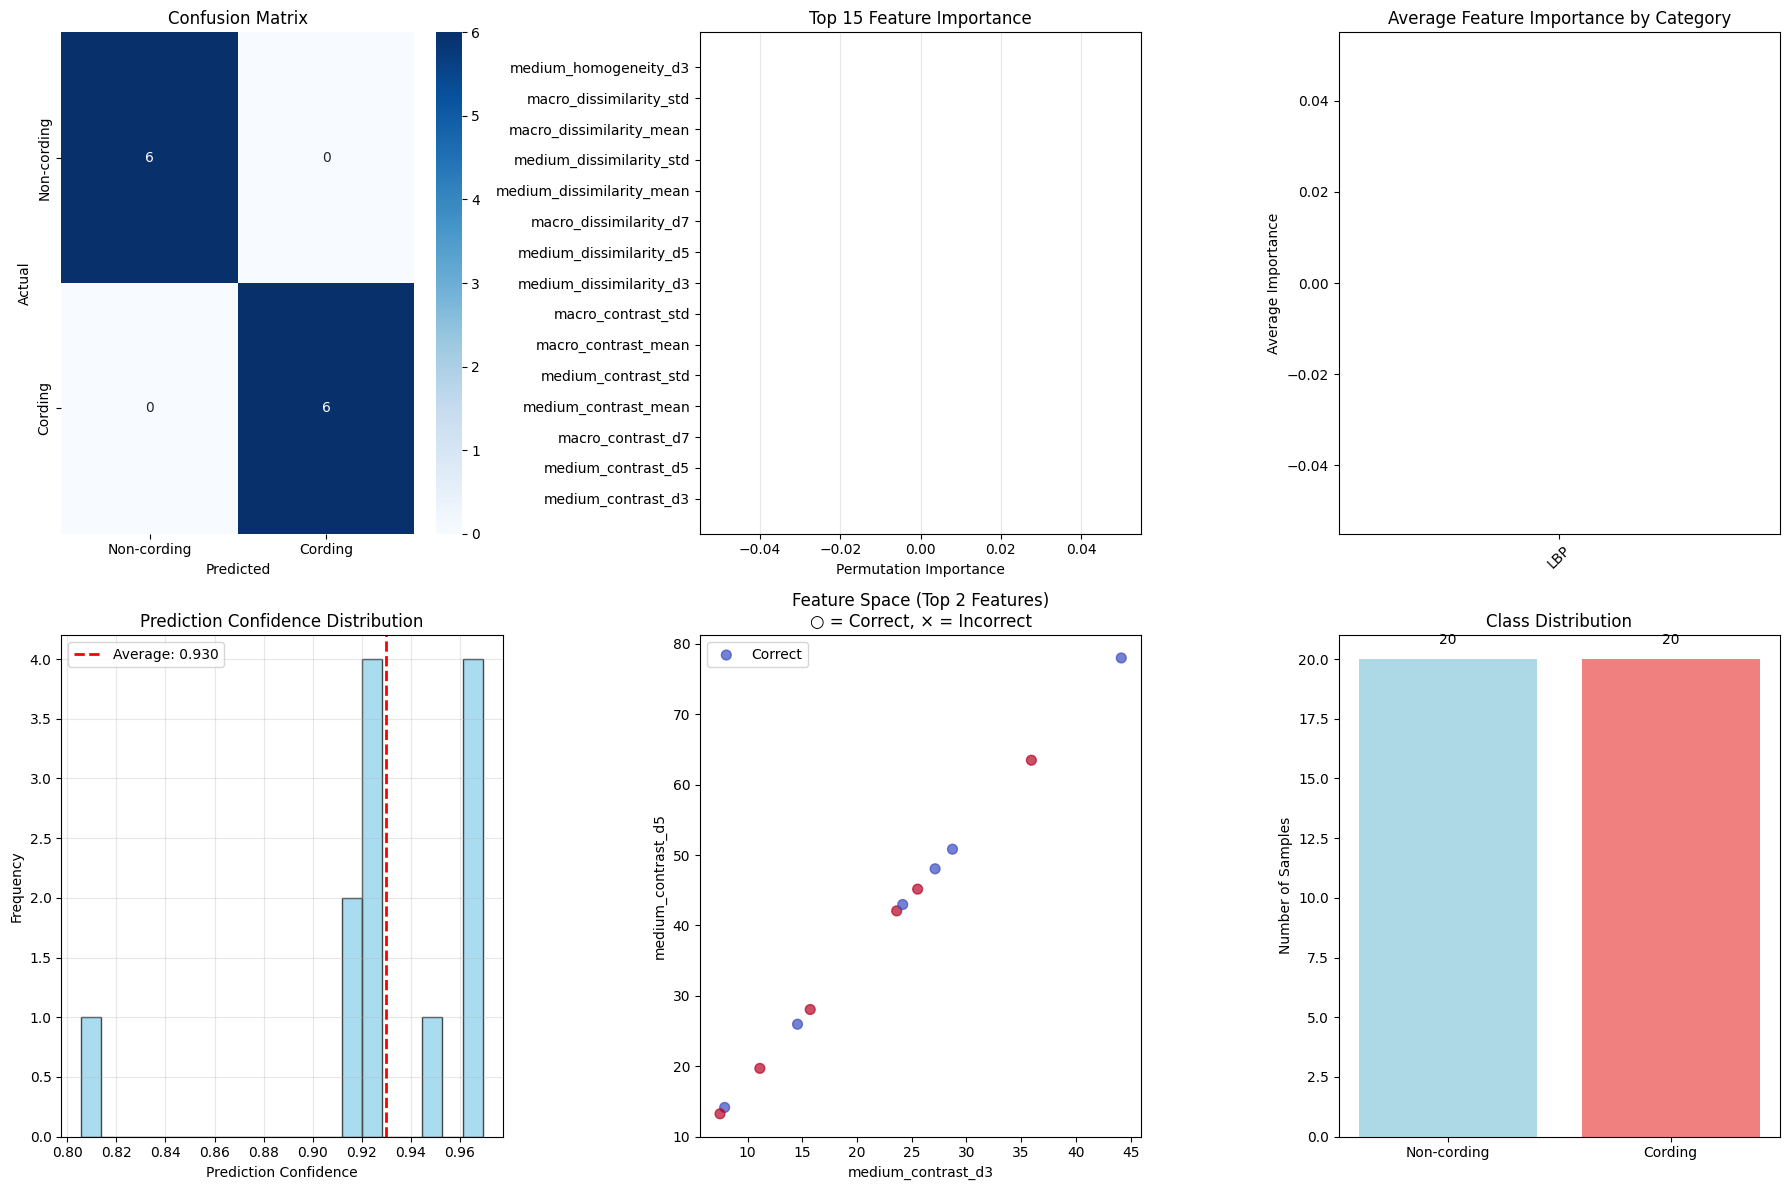


💾 Enhanced model saved as 'enhanced_cording_svm_classifier.pkl'

🔮 PREDICTING ON ALL SAMPLES...
💾 All predictions saved to 'all_samples_enhanced_predictions.csv'

📊 ENHANCED PREDICTION SUMMARY
predicted_phenotype
Phigh     81
Pminus    94

🎯 Confidence Statistics:
Average confidence: 0.901
High confidence predictions (>0.8): 150/175

📁 Breakdown by folder:
predicted_phenotype  Phigh  Pminus
folder                            
Ci-A04-1                 0       9
Ci-A04-2                 9       0
Ci-A04-3                 1       8
Ci-A04-5                 1       8
Ci-E06-1                 1       8
Ci-E06-2                 9       0
Ci-E06-7                 9       0
Ci-E06-8                 0       9
Ci-NT-1                  9       0
Ci-NT-2                  0       9
Ci-NT-3                  9       0
Ci-NT-4                  0       9
Ci-U17-2                 9       0
Ci-U17-3                 3       6
Ci-U17-4                 1       8
Parental_Phigh          20       0
Parental_P

In [21]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import joblib

def prepare_cording_data(df):
    """
    Prepare data for cording vs non-cording classification using enhanced features
    """
    # Filter only the two classes we need
    cording_data = df[df['folder'] == 'Parental_Phigh'].copy()
    non_cording_data = df[df['folder'] == 'Parental_Pminus'].copy()

    print(f"📊 Found {len(cording_data)} cording samples (Parental_Phigh)")
    print(f"📊 Found {len(non_cording_data)} non-cording samples (Parental_Pminus)")

    # Add labels
    cording_data['label'] = 1  # 1 for cording
    non_cording_data['label'] = 0  # 0 for non-cording

    # Combine datasets
    combined_data = pd.concat([cording_data, non_cording_data], ignore_index=True)

    return combined_data

def train_enhanced_svm_classifier(df):
    """
    Train SVM classifier on enhanced multi-scale texture features
    """
    # Prepare features - use all texture features
    feature_columns = [col for col in df.columns if any(x in col for x in ['medium', 'macro', 'lbp', 'region'])]

    # Remove metadata columns that might have slipped in
    feature_columns = [col for col in feature_columns if col not in ['image', 'folder', 'bacteria_pixels', 'label']]

    print(f"🔍 Using {len(feature_columns)} enhanced features")
    print("📋 Feature categories:")
    print(f"   - Medium-scale: {len([c for c in feature_columns if 'medium' in c])}")
    print(f"   - Macro-scale: {len([c for c in feature_columns if 'macro' in c])}")
    print(f"   - LBP: {len([c for c in feature_columns if 'lbp' in c])}")
    print(f"   - Region stats: {len([c for c in feature_columns if 'region' in c])}")

    X = df[feature_columns].values
    y = df['label'].values

    print(f"📦 Data shape: {X.shape}")
    print(f"🏷️ Class distribution: {np.unique(y, return_counts=True)}")

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"📚 Training samples: {X_train.shape[0]}")
    print(f"🧪 Test samples: {X_test.shape[0]}")

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM with hyperparameter tuning
    print("\n🎯 Training SVM classifier with enhanced features...")

    # Define parameter grid
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']
    }

    # Use GridSearchCV for hyperparameter tuning
    svm = SVC(random_state=42, probability=True)
    grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    print(f"✅ Best parameters: {grid_search.best_params_}")
    print(f"✅ Best cross-validation score: {grid_search.best_score_:.3f}")

    # Get best model
    best_svm = grid_search.best_estimator_

    # Evaluate on test set
    y_pred = best_svm.predict(X_test_scaled)
    y_prob = best_svm.predict_proba(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)

    print(f"\n🎯 TEST SET PERFORMANCE")
    print(f"📊 Accuracy: {test_accuracy:.3f}")
    print(f"\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Non-cording', 'Cording']))

    return best_svm, scaler, X_test_scaled, y_test, y_pred, y_prob, feature_columns

def evaluate_enhanced_classifier(model, scaler, df, feature_columns):
    """
    Comprehensive evaluation of the trained classifier with enhanced features
    """
    # Prepare data
    X = df[feature_columns].values
    y = df['label'].values

    X_scaled = scaler.transform(X)
    y_pred = model.predict(X_scaled)
    y_prob = model.predict_proba(X_scaled)

    # Cross-validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    print(f"\n📊 Cross-validation scores: {cv_scores}")
    print(f"📊 Mean CV accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    # Feature importance using permutation importance
    print("\n🔍 Calculating feature importance...")
    perm_importance = permutation_importance(model, X_scaled, y, n_repeats=10, random_state=42, n_jobs=-1)

    # Create feature importance dataframe
    feature_importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': perm_importance.importances_mean,
        'std': perm_importance.importances_std
    }).sort_values('importance', ascending=False)

    print("\n📈 Top 10 Most Important Features:")
    for idx, row in feature_importance_df.head(10).iterrows():
        print(f"   {row['feature']}: {row['importance']:.4f} ± {row['std']:.4f}")

    # Analyze feature importance by category
    print("\n🔍 Feature Importance by Category:")
    categories = {
        'Medium-scale': [f for f in feature_columns if 'medium' in f],
        'Macro-scale': [f for f in feature_columns if 'macro' in f],
        'LBP': [f for f in feature_columns if 'lbp' in f],
        'Region stats': [f for f in feature_columns if 'region' in f]
    }

    for category, features in categories.items():
        if features:
            cat_importance = feature_importance_df[feature_importance_df['feature'].isin(features)]['importance'].mean()
            print(f"   {category}: {cat_importance:.4f} ({len(features)} features)")

    return feature_importance_df, cv_scores, y_pred, y_prob

def plot_enhanced_results(df, y_test, y_pred, y_prob, feature_importance_df):
    """
    Create comprehensive visualization of enhanced classifier results
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    # Plot 1: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-cording', 'Cording'],
                yticklabels=['Non-cording', 'Cording'], ax=axes[0, 0])
    axes[0, 0].set_title('Confusion Matrix')
    axes[0, 0].set_xlabel('Predicted')
    axes[0, 0].set_ylabel('Actual')

    # Plot 2: Top Feature Importance
    top_features = feature_importance_df.head(15)
    y_pos = np.arange(len(top_features))

    axes[0, 1].barh(y_pos, top_features['importance'])
    axes[0, 1].set_yticks(y_pos)
    axes[0, 1].set_yticklabels(top_features['feature'])
    axes[0, 1].set_xlabel('Permutation Importance')
    axes[0, 1].set_title('Top 15 Feature Importance')
    axes[0, 1].grid(axis='x', alpha=0.3)

    # Plot 3: Feature Importance by Category
    categories = {
        'Medium-scale': len([f for f in feature_importance_df['feature'] if 'medium' in f]),
        'Macro-scale': len([f for f in feature_importance_df['feature'] if 'macro' in f]),
        'LBP': len([f for f in feature_importance_df['feature'] if 'lbp' in f]),
        'Region stats': len([f for f in feature_importance_df['feature'] if 'region' in f])
    }

    category_importance = {}
    for category, features in categories.items():
        cat_features = [f for f in feature_importance_df['feature'] if any(x in f for x in [category.lower().replace('-', '')])]
        if cat_features:
            cat_df = feature_importance_df[feature_importance_df['feature'].isin(cat_features)]
            category_importance[category] = cat_df['importance'].mean()

    axes[0, 2].bar(category_importance.keys(), category_importance.values(), color=['lightgreen', 'lightblue', 'orange', 'lightcoral'])
    axes[0, 2].set_title('Average Feature Importance by Category')
    axes[0, 2].set_ylabel('Average Importance')
    plt.sca(axes[0, 2])
    plt.xticks(rotation=45)

    # Plot 4: Confidence Distribution
    confidence = np.max(y_prob, axis=1)
    axes[1, 0].hist(confidence, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1, 0].axvline(np.mean(confidence), color='red', linestyle='--', linewidth=2,
                      label=f'Average: {np.mean(confidence):.3f}')
    axes[1, 0].set_xlabel('Prediction Confidence')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Prediction Confidence Distribution')
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)

    # Plot 5: Feature Space (first two most important features)
    if len(feature_importance_df) >= 2:
        top_feature_names = feature_importance_df.head(2)['feature'].values
        if all(feat in df.columns for feat in top_feature_names):
            X_plot = df[top_feature_names].values

            # Get indices for test set
            _, X_test_idx, _, _ = train_test_split(
                np.arange(len(df)), df['label'].values, test_size=0.3, random_state=42, stratify=df['label'].values
            )

            test_df = df.iloc[X_test_idx]
            test_features = test_df[top_feature_names].values
            test_labels = test_df['label'].values
            test_predictions = y_pred

            correct_mask = test_predictions == test_labels

            # Plot correct predictions
            axes[1, 1].scatter(test_features[correct_mask, 0], test_features[correct_mask, 1],
                              c=test_labels[correct_mask], cmap='coolwarm', alpha=0.7, s=50, marker='o', label='Correct')

            # Plot incorrect predictions
            if not all(correct_mask):
                axes[1, 1].scatter(test_features[~correct_mask, 0], test_features[~correct_mask, 1],
                                  c=test_labels[~correct_mask], cmap='coolwarm', alpha=0.7, s=100, marker='x', label='Incorrect', linewidth=2)

            axes[1, 1].set_xlabel(top_feature_names[0])
            axes[1, 1].set_ylabel(top_feature_names[1])
            axes[1, 1].set_title('Feature Space (Top 2 Features)\n○ = Correct, × = Incorrect')
            axes[1, 1].legend()

    # Plot 6: Class distribution
    class_counts = df['label'].value_counts().sort_index()
    axes[1, 2].bar(['Non-cording', 'Cording'], class_counts,
                   color=['lightblue', 'lightcoral'])
    axes[1, 2].set_title('Class Distribution')
    axes[1, 2].set_ylabel('Number of Samples')

    for i, count in enumerate(class_counts):
        axes[1, 2].text(i, count + 0.5, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.savefig('enhanced_svm_classification_results.png', dpi=150, bbox_inches='tight')
    plt.show()

def predict_all_samples_enhanced(model, scaler, features_df, feature_columns):
    """
    Predict cording vs non-cording for all samples using enhanced features
    """
    # Prepare features
    available_features = [f for f in feature_columns if f in features_df.columns]
    X = features_df[available_features].values
    X_scaled = scaler.transform(X)

    # Make predictions
    predictions = model.predict(X_scaled)
    probabilities = model.predict_proba(X_scaled)
    confidences = np.max(probabilities, axis=1)

    # Create results
    results = features_df.copy()
    results['predicted_phenotype'] = np.where(predictions == 1, 'Phigh', 'Pminus')
    results['confidence'] = confidences
    results['probability_Phigh'] = probabilities[:, 1]
    results['probability_Pminus'] = probabilities[:, 0]
    results['predicted_label'] = predictions

    return results

# Main execution
if __name__ == "__main__":
    # Load your enhanced features
    feature_file = "/content/multi_scale_texture_features_20251026_204753.csv"  # Update with your actual file

    try:
        df = pd.read_csv(feature_file)
        print(f"✅ Loaded enhanced feature data with {len(df)} samples")
        print(f"📁 Folders: {df['folder'].unique()}")

        # Prepare cording vs non-cording data
        classification_data = prepare_cording_data(df)

        if len(classification_data) == 0:
            print("❌ No data found for Parental_Phigh or Parental_Pminus")
        else:
            print(f"\n🎯 STARTING ENHANCED SVM CLASSIFICATION")
            print("   Cording: Parental_Phigh")
            print("   Non-cording: Parental_Pminus")

            # Train enhanced SVM classifier
            svm_model, scaler, X_test, y_test, y_pred, y_prob, feature_columns = train_enhanced_svm_classifier(classification_data)

            # Comprehensive evaluation
            feature_importance_df, cv_scores, y_pred_full, y_prob_full = evaluate_enhanced_classifier(
                svm_model, scaler, classification_data, feature_columns
            )

            # Plot results
            plot_enhanced_results(classification_data, y_test, y_pred, y_prob, feature_importance_df)

            # Save the model and scaler for future use
            model_info = {
                'model': svm_model,
                'scaler': scaler,
                'feature_columns': feature_columns,
                'training_date': pd.Timestamp.now(),
                'feature_categories': {
                    'medium_scale': len([f for f in feature_columns if 'medium' in f]),
                    'macro_scale': len([f for f in feature_columns if 'macro' in f]),
                    'lbp': len([f for f in feature_columns if 'lbp' in f]),
                    'region_stats': len([f for f in feature_columns if 'region' in f])
                }
            }
            joblib.dump(model_info, 'enhanced_cording_svm_classifier.pkl')
            print(f"\n💾 Enhanced model saved as 'enhanced_cording_svm_classifier.pkl'")

            # Predict on all samples (including unlabeled ones)
            print(f"\n🔮 PREDICTING ON ALL SAMPLES...")
            all_predictions = predict_all_samples_enhanced(svm_model, scaler, df, feature_columns)

            # Save all predictions
            all_predictions.to_csv('all_samples_enhanced_predictions.csv', index=False)
            print(f"💾 All predictions saved to 'all_samples_enhanced_predictions.csv'")

            # Generate summary
            print(f"\n📊 ENHANCED PREDICTION SUMMARY")
            summary = all_predictions['predicted_phenotype'].value_counts().sort_index()
            print(summary.to_string())

            # Confidence statistics
            avg_confidence = all_predictions['confidence'].mean()
            high_confidence = len(all_predictions[all_predictions['confidence'] > 0.8])

            print(f"\n🎯 Confidence Statistics:")
            print(f"Average confidence: {avg_confidence:.3f}")
            print(f"High confidence predictions (>0.8): {high_confidence}/{len(all_predictions)}")

            # Breakdown by folder
            print(f"\n📁 Breakdown by folder:")
            folder_breakdown = pd.crosstab(all_predictions['folder'], all_predictions['predicted_phenotype'])
            print(folder_breakdown)

    except FileNotFoundError:
        print(f"❌ Feature file not found: {feature_file}")
        print("Please update the 'feature_file' variable with the correct path.")
    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()

# Pipeline

🔬 MTB Cording Phenotype Classifier
Automated analysis of Mycobacterium tuberculosis images
Classifies as CORDING (Phigh) or NON-CORDING (Pminus)

📁 Enter path to MTB image: /content/drive/MyDrive/Project/Ci-U17-3/C6_Ci-U17-3_9123_08022024_1023.tif
🚀 Starting MTB Phenotype Analysis Pipeline...
🔄 Loading pre-trained models...
✅ U-Net segmentation model loaded
✅ SVM classification model loaded from: enhanced_cording_svm_classifier.pkl
🔍 Segmenting image...
📐 Image dimensions: 1944x2592
✅ Segmentation complete
📊 Extracting texture features...
✅ Extracted 67 texture features
🎯 Classifying phenotype...
✅ Classification complete

🎯 FINAL PREDICTION RESULTS
📋 Phenotype: NON-CORDING
📊 Confidence: 57.5%
🔴 Probability Cording: 0.425
🔵 Probability Non-cording: 0.575
📈 Features used: 67
💾 Results saved to: mtb_prediction_20251023_162757.png


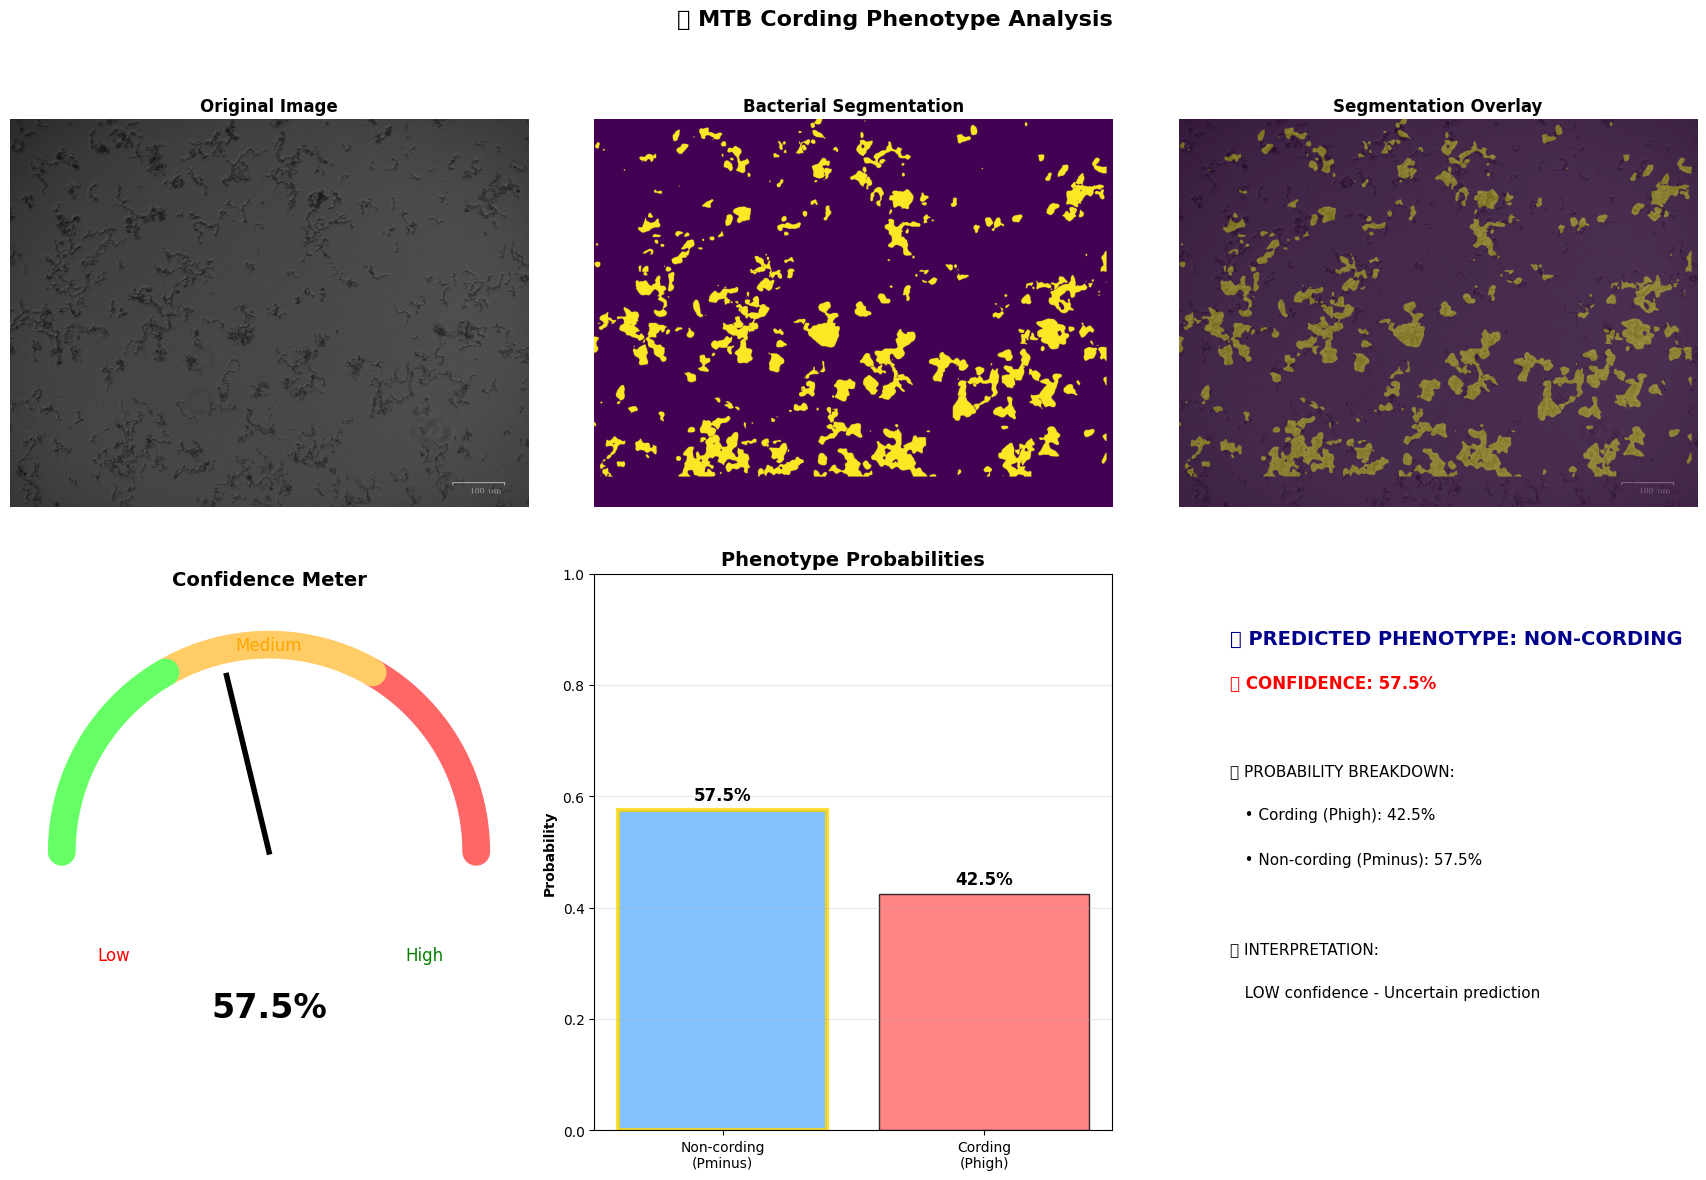

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import feature
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

class MTBAutoPipeline:
    """
    Fully automated MTB phenotype classification pipeline
    Uses pre-trained U-Net segmentation and SVM classification models
    """

    def __init__(self):
        self.segmentation_model = None
        self.classification_model = None
        self.scaler = None
        self.feature_columns = None

    def load_models(self):
        """Load pre-trained models with robust error handling"""
        print("🔄 Loading pre-trained models...")

        try:
            # Load U-Net segmentation model
            unet_path = "/content/drive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras"
            if os.path.exists(unet_path):
                # Define custom metrics
                def multi_dice_coef(y_true, y_pred, smooth=1e-6):
                    y_pred = tf.nn.softmax(y_pred)
                    y_true_f = tf.one_hot(tf.cast(tf.squeeze(y_true, -1), tf.int32), depth=3)
                    y_true_f = tf.reshape(y_true_f, [-1, 3])
                    y_pred_f = tf.reshape(y_pred, [-1, 3])
                    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
                    denom = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
                    dice = (2. * intersection + smooth) / (denom + smooth)
                    return tf.reduce_mean(dice)

                def multi_iou(y_true, y_pred, smooth=1e-6):
                    y_pred = tf.nn.softmax(y_pred)
                    y_true_f = tf.one_hot(tf.cast(tf.squeeze(y_true, -1), tf.int32), depth=3)
                    y_true_f = tf.reshape(y_true_f, [-1, 3])
                    y_pred_f = tf.reshape(y_pred, [-1, 3])
                    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
                    union = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0) - intersection
                    iou = (intersection + smooth) / (union + smooth)
                    return tf.reduce_mean(iou)

                custom_objects = {
                    'multi_dice_coef': multi_dice_coef,
                    'multi_iou': multi_iou
                }

                self.segmentation_model = tf.keras.models.load_model(
                    unet_path, custom_objects=custom_objects, compile=False
                )
                print("✅ U-Net segmentation model loaded")
            else:
                print(f"❌ U-Net model not found at: {unet_path}")
                return False

            # Try multiple possible locations for SVM model
            svm_paths = [
                "enhanced_cording_svm_classifier.pkl",
                "/content/mydrive/MyDrive/Project/enhanced_cording_svm_classifier.pkl",
                "cording_svm_classifier.pkl"
            ]

            model_loaded = False
            for svm_path in svm_paths:
                if os.path.exists(svm_path):
                    try:
                        model_info = joblib.load(svm_path)

                        # Handle different model formats
                        if isinstance(model_info, dict):
                            # New format with dictionary
                            self.classification_model = model_info.get('model')
                            self.scaler = model_info.get('scaler')
                            self.feature_columns = model_info.get('feature_columns')
                        else:
                            # Old format - assume it's the model itself
                            self.classification_model = model_info
                            # Try to load scaler and feature columns from separate files
                            try:
                                self.scaler = joblib.load("feature_scaler.pkl")
                                self.feature_columns = joblib.load("feature_columns.pkl")
                            except:
                                print("⚠️ Could not load scaler and feature columns, using defaults")
                                self.scaler = StandardScaler()
                                self.feature_columns = self._get_default_feature_columns()

                        if self.classification_model is not None:
                            print(f"✅ SVM classification model loaded from: {svm_path}")
                            model_loaded = True
                            break

                    except Exception as e:
                        print(f"❌ Error loading {svm_path}: {e}")
                        continue

            if not model_loaded:
                print("❌ Could not load SVM classification model")
                print("💡 Please ensure the model file exists in one of these locations:")
                for path in svm_paths:
                    print(f"   - {path}")
                return False

            return True

        except Exception as e:
            print(f"❌ Error loading models: {e}")
            return False

    def _get_default_feature_columns(self):
        """Get default feature columns based on your feature extraction"""
        feature_columns = []

        # Medium-scale features
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        distances = [3, 5]

        for prop in properties:
            for distance in distances:
                feature_columns.append(f'medium_{prop}_d{distance}')
            feature_columns.extend([f'medium_{prop}_mean', f'medium_{prop}_std'])

        # Macro-scale features
        for prop in properties:
            feature_columns.append(f'macro_{prop}_d7')
            feature_columns.extend([f'macro_{prop}_mean', f'macro_{prop}_std'])

        # LBP features
        for i in range(16):
            feature_columns.append(f'lbp_hist_{i}')
        feature_columns.extend(['lbp_energy', 'lbp_entropy'])

        # Region statistics
        feature_columns.extend([
            'region_mean_intensity', 'region_std_intensity', 'region_area',
            'region_skewness', 'region_kurtosis'
        ])

        return feature_columns

    def segment_image(self, image_path, tile_size=1024, overlap=0.25):
        """Segment bacterial regions using your U-Net model"""
        print("🔍 Segmenting image...")

        # Load image
        img_original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img_original is None:
            raise ValueError(f"Could not load image from {image_path}")

        img = img_original.astype(np.float32) / 255.0
        h, w = img.shape

        print(f"📐 Image dimensions: {h}x{w}")

        # Handle image size
        if h < tile_size or w < tile_size:
            print("⚠️ Image smaller than tile size, padding...")
            pad_h = max(0, tile_size - h)
            pad_w = max(0, tile_size - w)
            img = np.pad(img, ((0, pad_h), (0, pad_w)), mode='reflect')
            h, w = img.shape

        # Tile-based prediction
        step = int(tile_size * (1 - overlap))
        prob_map = np.zeros((h, w, 3), dtype=np.float32)
        count_map = np.zeros((h, w), dtype=np.float32)

        total_tiles = ((h - tile_size) // step + 1) * ((w - tile_size) // step + 1)
        tile_count = 0

        for i in range(0, h - tile_size + 1, step):
            for j in range(0, w - tile_size + 1, step):
                tile = img[i:i+tile_size, j:j+tile_size]
                tile_input = np.expand_dims(np.expand_dims(tile, -1), 0)

                # Predict using your U-Net
                pred_logits = self.segmentation_model.predict(tile_input, verbose=0)[0]
                pred_softmax = tf.nn.softmax(pred_logits, axis=-1).numpy()

                # Accumulate probabilities
                prob_map[i:i+tile_size, j:j+tile_size] += pred_softmax
                count_map[i:i+tile_size, j:j+tile_size] += 1

                tile_count += 1
                if tile_count % 20 == 0:
                    print(f"   Processed {tile_count}/{total_tiles} tiles...")

        # Average probabilities
        prob_map /= np.maximum(count_map[..., np.newaxis], 1)

        # Create final mask (focus on bacteria classes 1 and 2)
        bacteria_mask = np.argmax(prob_map, axis=-1)
        bacteria_mask = np.isin(bacteria_mask, [1, 2]).astype(np.uint8) * 255

        # Remove padding if applied
        if bacteria_mask.shape != img_original.shape:
            bacteria_mask = bacteria_mask[:img_original.shape[0], :img_original.shape[1]]

        print("✅ Segmentation complete")
        return bacteria_mask, img_original

    def extract_texture_features(self, image, mask):
        """Extract multi-scale texture features"""
        print("📊 Extracting texture features...")

        if len(image.shape) > 2:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply mask
        bacteria_region = cv2.bitwise_and(image, image, mask=mask)

        if np.sum(mask > 0) < 100:
            print("⚠️ Small bacterial region detected")
            return self._get_empty_features()

        try:
            # Enhanced normalization
            normalized = cv2.normalize(bacteria_region, None, 0, 255, cv2.NORM_MINMAX)
            quantized = (normalized // (256 // 64)).astype(np.uint8)

            features = {}

            # GLCM with multiple distances and angles
            distances = [3, 5, 7]
            angles = [0, np.pi/4]

            glcm = feature.graycomatrix(
                quantized,
                distances=distances,
                angles=angles,
                levels=64,
                symmetric=True,
                normed=True
            )

            # Extract texture properties
            properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

            for prop in properties:
                try:
                    prop_values = feature.graycoprops(glcm, prop)

                    # Average across angles for each distance
                    for i, distance in enumerate(distances):
                        if distance in [3, 5]:
                            prefix = 'medium'
                        else:
                            prefix = 'macro'

                        feature_name = f'{prefix}_{prop}_d{distance}'
                        value = np.mean(prop_values[i, :])
                        features[feature_name] = float(value) if np.isfinite(value) else 0.0

                    # Overall statistics
                    medium_indices = [i for i, d in enumerate(distances) if d in [3, 5]]
                    macro_indices = [i for i, d in enumerate(distances) if d == 7]

                    if medium_indices:
                        medium_values = prop_values[medium_indices, :].flatten()
                        features[f'medium_{prop}_mean'] = float(np.mean(medium_values))
                        features[f'medium_{prop}_std'] = float(np.std(medium_values))

                    if macro_indices:
                        macro_values = prop_values[macro_indices, :].flatten()
                        features[f'macro_{prop}_mean'] = float(np.mean(macro_values))
                        features[f'macro_{prop}_std'] = float(np.std(macro_values))

                except Exception as e:
                    print(f"Warning: Could not compute {prop}: {e}")
                    continue

            # LBP features
            lbp_features = self._extract_lbp_features(normalized, mask)
            features.update(lbp_features)

            # Region statistics
            region_pixels = image[mask > 0]
            if len(region_pixels) > 0:
                features['region_mean_intensity'] = float(np.mean(region_pixels))
                features['region_std_intensity'] = float(np.std(region_pixels))
                features['region_area'] = int(len(region_pixels))
                features['region_skewness'] = float(pd.Series(region_pixels.flatten()).skew())
                features['region_kurtosis'] = float(pd.Series(region_pixels.flatten()).kurtosis())
            else:
                stats_features = {
                    'region_mean_intensity': 0.0, 'region_std_intensity': 0.0,
                    'region_area': 0, 'region_skewness': 0.0, 'region_kurtosis': 0.0
                }
                features.update(stats_features)

            print(f"✅ Extracted {len(features)} texture features")
            return features

        except Exception as e:
            print(f"❌ Feature extraction failed: {e}")
            return self._get_empty_features()

    def _extract_lbp_features(self, image, mask, radius=2, n_points=16):
        """Extract LBP features"""
        try:
            masked_image = image.copy()
            masked_image[mask == 0] = 0

            lbp = feature.local_binary_pattern(masked_image, n_points, radius, method='uniform')
            lbp_masked = lbp[mask > 0]

            if len(lbp_masked) == 0:
                return {f'lbp_hist_{i}': 0.0 for i in range(10)}

            hist, _ = np.histogram(lbp_masked, bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
            hist = hist.astype(float)
            hist /= (hist.sum() + 1e-8)

            lbp_features = {}
            for i in range(len(hist)):
                lbp_features[f'lbp_hist_{i}'] = float(hist[i])

            lbp_features['lbp_energy'] = float(np.sum(hist ** 2))
            lbp_features['lbp_entropy'] = float(-np.sum(hist * np.log(hist + 1e-8)))

            return lbp_features

        except Exception as e:
            print(f"LBP extraction failed: {e}")
            return {f'lbp_hist_{i}': 0.0 for i in range(10)}

    def _get_empty_features(self):
        """Return empty feature set"""
        base_features = {}
        properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

        for distance in [3, 5, 7]:
            prefix = 'medium' if distance in [3, 5] else 'macro'
            for prop in properties:
                base_features[f'{prefix}_{prop}_d{distance}'] = 0.0

        for prop in properties:
            base_features[f'medium_{prop}_mean'] = 0.0
            base_features[f'medium_{prop}_std'] = 0.0
            base_features[f'macro_{prop}_mean'] = 0.0
            base_features[f'macro_{prop}_std'] = 0.0

        for i in range(18):
            if i < 16:
                base_features[f'lbp_hist_{i}'] = 0.0
            elif i == 16:
                base_features['lbp_energy'] = 0.0
            else:
                base_features['lbp_entropy'] = 0.0

        stats_features = {
            'region_mean_intensity': 0.0, 'region_std_intensity': 0.0,
            'region_area': 0, 'region_skewness': 0.0, 'region_kurtosis': 0.0
        }
        base_features.update(stats_features)

        return base_features

    def classify_phenotype(self, features_dict):
        """Classify using pre-trained SVM"""
        print("🎯 Classifying phenotype...")

        # Create feature vector
        feature_vector = []
        for feature_name in self.feature_columns:
            if feature_name in features_dict:
                feature_vector.append(features_dict[feature_name])
            else:
                print(f"⚠️ Missing feature: {feature_name}, using 0.0")
                feature_vector.append(0.0)

        # Scale features
        if hasattr(self.scaler, 'transform'):
            features_scaled = self.scaler.transform([feature_vector])
        else:
            print("⚠️ No scaler available, using raw features")
            features_scaled = [feature_vector]

        # Predict
        prediction = self.classification_model.predict(features_scaled)[0]
        probabilities = self.classification_model.predict_proba(features_scaled)[0]
        confidence = probabilities[prediction]

        results = {
            'prediction': 'Phigh' if prediction == 1 else 'Pminus',
            'prediction_label': 'CORDING' if prediction == 1 else 'NON-CORDING',
            'confidence': confidence,
            'probability_Phigh': probabilities[1],
            'probability_Pminus': probabilities[0],
            'feature_count': len(feature_vector)
        }

        print("✅ Classification complete")
        return results

    def create_visualization(self, original_image, segmentation_mask, prediction_results):
        """Create comprehensive visualization"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('🔬 MTB Cording Phenotype Analysis', fontsize=16, fontweight='bold')

        # Plot 1: Original image
        axes[0, 0].imshow(original_image, cmap='gray')
        axes[0, 0].set_title('Original Image', fontweight='bold')
        axes[0, 0].axis('off')

        # Plot 2: Segmentation
        axes[0, 1].imshow(segmentation_mask, cmap='viridis')
        axes[0, 1].set_title('Bacterial Segmentation', fontweight='bold')
        axes[0, 1].axis('off')

        # Plot 3: Overlay
        axes[0, 2].imshow(original_image, cmap='gray')
        axes[0, 2].imshow(segmentation_mask, cmap='viridis', alpha=0.4)
        axes[0, 2].set_title('Segmentation Overlay', fontweight='bold')
        axes[0, 2].axis('off')

        # Plot 4: Confidence gauge
        self._create_confidence_gauge(axes[1, 0], prediction_results['confidence'])

        # Plot 5: Probability bars
        self._create_probability_bars(axes[1, 1], prediction_results)

        # Plot 6: Prediction summary
        self._create_prediction_summary(axes[1, 2], prediction_results)

        plt.tight_layout()
        return fig

    def _create_confidence_gauge(self, ax, confidence):
        """Create confidence gauge"""
        angles = np.linspace(0, 180, 100)
        colors = ['#ff6666', '#ffcc66', '#66ff66']

        for i, (start, end, color) in enumerate([(0, 60, colors[0]), (60, 120, colors[1]), (120, 180, colors[2])]):
            angles_segment = np.linspace(start, end, 30)
            x = 0.5 + 0.4 * np.cos(np.radians(angles_segment))
            y = 0.5 + 0.4 * np.sin(np.radians(angles_segment))
            ax.plot(x, y, color=color, linewidth=20, solid_capstyle='round')

        needle_angle = 180 * confidence
        needle_x = 0.5 + 0.35 * np.cos(np.radians(needle_angle))
        needle_y = 0.5 + 0.35 * np.sin(np.radians(needle_angle))
        ax.plot([0.5, needle_x], [0.5, needle_y], color='black', linewidth=4)

        ax.text(0.5, 0.2, f'{confidence:.1%}', ha='center', va='center',
                fontsize=24, fontweight='bold', color='black')
        ax.text(0.2, 0.3, 'Low', ha='center', va='center', fontsize=12, color='red')
        ax.text(0.5, 0.9, 'Medium', ha='center', va='center', fontsize=12, color='orange')
        ax.text(0.8, 0.3, 'High', ha='center', va='center', fontsize=12, color='green')

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title('Confidence Meter', fontsize=14, fontweight='bold')

    def _create_probability_bars(self, ax, results):
        """Create probability bar chart"""
        categories = ['Non-cording\n(Pminus)', 'Cording\n(Phigh)']
        probabilities = [results['probability_Pminus'], results['probability_Phigh']]
        colors = ['#66b3ff', '#ff6666']

        bars = ax.bar(categories, probabilities, color=colors, alpha=0.8, edgecolor='black')

        for bar, prob in zip(bars, probabilities):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{prob:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

        predicted_idx = 1 if results['prediction'] == 'Phigh' else 0
        bars[predicted_idx].set_edgecolor('gold')
        bars[predicted_idx].set_linewidth(3)

        ax.set_ylabel('Probability', fontweight='bold')
        ax.set_ylim(0, 1)
        ax.set_title('Phenotype Probabilities', fontsize=14, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)

    def _create_prediction_summary(self, ax, results):
        """Create prediction summary"""
        ax.axis('off')

        phenotype_emoji = "🟥" if results['prediction'] == 'Phigh' else "🟦"
        confidence_emoji = "🔴" if results['confidence'] < 0.6 else "🟡" if results['confidence'] < 0.8 else "🟢"

        summary_text = [
            f"{phenotype_emoji} PREDICTED PHENOTYPE: {results['prediction_label']}",
            f"{confidence_emoji} CONFIDENCE: {results['confidence']:.1%}",
            "",
            "📊 PROBABILITY BREAKDOWN:",
            f"   • Cording (Phigh): {results['probability_Phigh']:.1%}",
            f"   • Non-cording (Pminus): {results['probability_Pminus']:.1%}",
            "",
            "🎯 INTERPRETATION:"
        ]

        if results['confidence'] > 0.8:
            interpretation = "HIGH confidence - Strong prediction"
            color = 'green'
        elif results['confidence'] > 0.6:
            interpretation = "MEDIUM confidence - Reasonable prediction"
            color = 'orange'
        else:
            interpretation = "LOW confidence - Uncertain prediction"
            color = 'red'

        summary_text.append(f"   {interpretation}")

        for i, line in enumerate(summary_text):
            if 'PREDICTED' in line:
                ax.text(0.1, 0.9 - i*0.08, line, transform=ax.transAxes, fontsize=14,
                       fontweight='bold', color='darkblue', va='top')
            elif 'CONFIDENCE' in line:
                ax.text(0.1, 0.9 - i*0.08, line, transform=ax.transAxes, fontsize=12,
                       fontweight='bold', color=color, va='top')
            else:
                ax.text(0.1, 0.9 - i*0.08, line, transform=ax.transAxes, fontsize=11, va='top')

    def analyze_image(self, image_path):
        """
        Complete automated pipeline
        Input: Image path
        Output: Prediction with visualization
        """
        print("🚀 Starting MTB Phenotype Analysis Pipeline...")
        print("=" * 60)

        # Load models
        if not self.load_models():
            print("❌ Failed to load models. Please check:")
            print("   - U-Net model exists at specified path")
            print("   - SVM model exists as 'enhanced_cording_svm_classifier.pkl'")
            return None

        try:
            # Step 1: Segment bacteria
            segmentation_mask, original_image = self.segment_image(image_path)

            # Step 2: Extract features
            features = self.extract_texture_features(original_image, segmentation_mask)

            # Step 3: Classify phenotype
            prediction_results = self.classify_phenotype(features)

            # Step 4: Create visualization
            fig = self.create_visualization(original_image, segmentation_mask, prediction_results)

            # Display results
            print("\n" + "=" * 60)
            print("🎯 FINAL PREDICTION RESULTS")
            print("=" * 60)
            print(f"📋 Phenotype: {prediction_results['prediction_label']}")
            print(f"📊 Confidence: {prediction_results['confidence']:.1%}")
            print(f"🔴 Probability Cording: {prediction_results['probability_Phigh']:.3f}")
            print(f"🔵 Probability Non-cording: {prediction_results['probability_Pminus']:.3f}")
            print(f"📈 Features used: {prediction_results['feature_count']}")
            print("=" * 60)

            # Save results
            timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
            output_file = f"mtb_prediction_{timestamp}.png"
            plt.savefig(output_file, dpi=150, bbox_inches='tight')
            print(f"💾 Results saved to: {output_file}")

            plt.show()

            return prediction_results

        except Exception as e:
            print(f"❌ Pipeline error: {e}")
            import traceback
            traceback.print_exc()
            return None

# Alternative simple function if models aren't loading
def quick_analysis(image_path):
    """Simple analysis without model loading"""
    print("🔬 Quick MTB Analysis")
    print("=" * 50)

    # Just load and display the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("❌ Could not load image")
        return

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Input Image', fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, 'Models not loaded\nPlease check model files',
             ha='center', va='center', transform=plt.gca().transAxes,
             fontsize=14, bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcoral"))
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("💡 Please ensure these files exist:")
    print("   - /content/mydrive/MyDrive/Project/unet_model_1024tiles_balanced_20241201_143022.keras")
    print("   - enhanced_cording_svm_classifier.pkl")

def main():
    """Simple user interface"""
    print("🔬 MTB Cording Phenotype Classifier")
    print("=" * 50)
    print("Automated analysis of Mycobacterium tuberculosis images")
    print("Classifies as CORDING (Phigh) or NON-CORDING (Pminus)")
    print()

    # Get image path
    image_path = input("📁 Enter path to MTB image: ").strip()

    if not os.path.exists(image_path):
        print("❌ Image file not found!")
        return

    # Try full pipeline first
    pipeline = MTBAutoPipeline()
    results = pipeline.analyze_image(image_path)

    if not results:
        print("\n🔄 Falling back to quick analysis...")
        quick_analysis(image_path)

# Run the pipeline
if __name__ == "__main__":
    main()